SoftwareX paper example

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
'''
    
'''
from WecGrid import WecGrid
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid.initialize_psse("fnsl")
wec_grid.initialize_pypsa("fnsl")


    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.3.2

             INITIATED ON SUN, APR 27 2025  10:45
[Snapshot] t=1745775958.93, note={}
PSSE initi

case data: 0     100.00  33  0  0  60.00       
record 1: 
record 2: 
parsed 24 buses
parsed 16 loads
parsed 0 fixed shunts
parsed 11 generators
parsed 32 branches
parsed 6 transformers
parsed 1 areas
parsed 0 two terminal dc lines
parsed 0 vsc dc lines
parsed 0 transformer corrections
parsed 0 multi-terminal dc lines
parsed 0 multi-section lines
parsed 1 zones
parsed 0 inter-area transfers
parsed 1 owners
parsed 0 facts devices
parsed 2 switched shunts
parsed 0 induction machines
un-parsed lines:
  Q

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.132958 seconds


pyPSA initialized
PyPSA initialized with case file: IEEE_24_bus.RAW.


In [3]:
'''
    
'''
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=1, from_bus=7, to_bus=25, mbase= 1.0, config=config) 


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 0 iterations with error of nan in 0.001999 seconds


Adding WECs to PSS/E network
Bus 25 added successfully.
Plant data added successfully to bus 25.
Generator G1 added successfully to bus 25.
Branch from 7 to 25 added successfully.
[Snapshot] t=1745742555.38, note={}


In [4]:
wec_grid.generate_load_curve()

In [5]:
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-27 01:34:13.782132', '2025-04-27 01:39:13.782132',
               '2025-04-27 01:44:13.782132', '2025-04-27 01:49:13.782132',
               '2025-04-27 01:54:13.782132', '2025-04-27 01:59:13.782132',
               '2025-04-27 02:04:13.782132', '2025-04-27 02:09:13.782132',
               '2025-04-27 02:14:13.782132', '2025-04-27 02:19:13.782132',
               ...
               '2025-04-27 12:44:13.782132', '2025-04-27 12:49:13.782132',
               '2025-04-27 12:54:13.782132', '2025-04-27 12:59:13.782132',
               '2025-04-27 13:04:13.782132', '2025-04-27 13:09:13.782132',
               '2025-04-27 13:14:13.782132', '2025-04-27 13:19:13.782132',
               '2025-04-27 13:24:13.782132', '2025-04-27 13:29:13.782132'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 0 iterations with erro

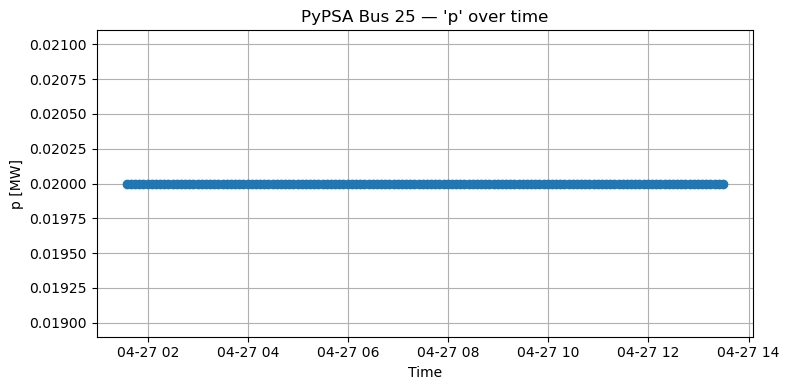

In [7]:
# Ensure bus_id is a string if needed
bus_id = str(25)

# Extract the time-series
series = getattr(wec_grid.pypsaObj.pypsa_object.buses_t, 'p').loc[:, bus_id]
#series =  wec_grid.pypsaObj.pypsa_object.loads_t.p['L0']


# Plot
plt.figure(figsize=(8, 4))
plt.plot(series.index, series.values, marker='o')
plt.title(f"PyPSA Bus {bus_id} — 'p' over time")
plt.xlabel("Time")
plt.ylabel(f"p [MW]")
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
series

snapshot
2025-04-27 01:19:47.192098    0.000000
2025-04-27 01:24:47.192098    0.000017
2025-04-27 01:29:47.192098    0.000016
2025-04-27 01:34:47.192098    0.000017
2025-04-27 01:39:47.192098    0.000018
                                ...   
2025-04-27 12:54:47.192098    0.000016
2025-04-27 12:59:47.192098    0.000023
2025-04-27 13:04:47.192098    0.000016
2025-04-27 13:09:47.192098    0.000015
2025-04-27 13:14:47.192098    0.000019
Freq: 5T, Name: 25, Length: 144, dtype: float64

In [19]:
wec_grid.pypsaObj.load_profiles

L0         L1         L2         L3  \
2025-04-27 01:19:47.192098  97.000000  90.000000  74.000000  71.000000   
2025-04-27 01:24:47.192098  96.768870  90.253642  74.101384  70.935124   
2025-04-27 01:29:47.192098  97.222304  90.041424  74.199298  70.947350   
2025-04-27 01:34:47.192098  97.127498  89.858217  73.814520  71.185198   
2025-04-27 01:39:47.192098  97.086380  90.060898  74.108024  71.156313   
...                               ...        ...        ...        ...   
2025-04-27 12:54:47.192098  97.096626  90.306538  73.973778  71.167024   
2025-04-27 12:59:47.192098  97.015284  90.004641  74.138022  71.103768   
2025-04-27 13:04:47.192098  97.583223  90.438484  74.150983  71.092137   
2025-04-27 13:09:47.192098  97.210103  89.973798  73.905438  70.874433   
2025-04-27 13:14:47.192098  97.067150  89.777358  74.153787  70.965824   

                                   L4         L5         L6          L7  \
2025-04-27 01:19:47.192098  68.000000  62.000000  85.000000  175.000000   
2025-04-27 01:24:47.192098  68.157846  62.153528  84.878421  175.434864   
2025-04-27 01:29:47.192098  67.952132  61.960019  85.301947  175.444123   
2025-04-27 01:34:47.192098  68.052341  62.017676  84.907839  175.714999   
2025-04-27 01:39:47.192098  68.273358  61.895719  85.157334  174.996050   
...                               ...        ...        ...         ...   
2025-04-27 12:54:47.192098  68.164580  62.173432  85.293602  175.264382   
2025-04-27 12:59:47.192098  68.040455  62.288492  84.907197  175.648158   
2025-04-27 13:04:47.192098  68.122356  62.087229  85.269391  175.087852   
2025-04-27 13:09:47.192098  68.157362  61.931348  85.228762  175.318120   
2025-04-27 13:14:47.192098  68.064772  61.914148  85.209764  175.314984   

                                    L8          L9        L10         L11  \
2025-04-27 01:19:47.192098  100.000000  130.000000  92.000000  158.000000   
2025-04-27 01:24:47.192098  100.574317  130.042527  92.023413  158.189092   
2025-04-27 01:29:47.192098  100.334183  130.476075  92.077811  158.006207   
2025-04-27 01:34:47.192098   99.961521  129.783904  92.259737  158.209251   
2025-04-27 01:39:47.192098  100.002853  130.115308  92.421046  158.363459   
...                                ...         ...        ...         ...   
2025-04-27 12:54:47.192098  100.378266  130.121519  92.113513  158.191446   
2025-04-27 12:59:47.192098  100.243772  130.264134  91.878519  159.117822   
2025-04-27 13:04:47.192098   99.877468  130.280773  91.655086  158.775028   
2025-04-27 13:09:47.192098  100.266485  130.282202  92.171020  157.581923   
2025-04-27 13:14:47.192098  100.187133  129.638211  92.108067  158.508405   

                                   L12         L13        L14        L15  
2025-04-27 01:19:47.192098  100.000000  162.000000  90.000000  65.000000  
2025-04-27 01:24:47.192098  100.143095  162.365127  89.938803  64.836185  
2025-04-27 01:29:47.192098  100.057481  161.994976  90.211483  65.242919  
2025-04-27 01:34:47.192098  100.009398  162.772216  90.090851  65.228002  
2025-04-27 01:39:47.192098  100.086173  161.909892  90.031969  65.141744  
...                                ...         ...        ...        ...  
2025-04-27 12:54:47.192098  100.212253  162.273127  90.018094  65.126133  
2025-04-27 12:59:47.192098  100.142215  162.739927  90.170433  64.980525  
2025-04-27 13:04:47.192098   99.944882  162.148005  90.086486  65.052354  
2025-04-27 13:09:47.192098   99.846562  162.476724  89.854073  65.117391  
2025-04-27 13:14:47.192098  100.097579  162.092436  89.954218  65.036557  

[144 rows x 16 columns]

In [28]:
wec_grid.pypsaObj.pypsa_object.loads_t.p['L0']

snapshot
2025-04-27 01:19:47.192098    97.000000
2025-04-27 01:24:47.192098    96.768870
2025-04-27 01:29:47.192098    97.222304
2025-04-27 01:34:47.192098    97.127498
2025-04-27 01:39:47.192098    97.086380
                                ...    
2025-04-27 12:54:47.192098    97.096626
2025-04-27 12:59:47.192098    97.015284
2025-04-27 13:04:47.192098    97.583223
2025-04-27 13:09:47.192098    97.210103
2025-04-27 13:14:47.192098    97.067150
Freq: 5T, Name: L0, Length: 144, dtype: float64

In [4]:
wec_grid.pypsaObj.pypsa_object.generators

attribute bus control type    p_nom  p_nom_extendable  p_nom_min  p_nom_max  \
Generator                                                                     
G0          1   Slack       1000.00             False        0.0        inf   
G1          2      PV       1000.00             False        0.0        inf   
G2          7      PV       1000.00             False        0.0        inf   
G3         13      PV       1000.00             False        0.0        inf   
G4         14      PV       1000.00             False        0.0        inf   
G5         15      PV       1000.00             False        0.0        inf   
G6         16      PV       1000.00             False        0.0        inf   
G7         18      PV       1000.00             False        0.0        inf   
G8         21      PV       1000.00             False        0.0        inf   
G9         22      PV       1000.00             False        0.0        inf   
G10        23      PV       1000.00             False        0.0        inf   
G_RM3_60   25      PV          0.05             False        0.0        inf   

attribute  p_min_pu  p_max_pu    p_set  ...  shut_down_cost  min_up_time  \
Generator                               ...                                
G0              0.0       1.0   35.849  ...             0.0            0   
G1              0.0       1.0   67.000  ...             0.0            0   
G2              0.0       1.0   64.000  ...             0.0            0   
G3              0.0       1.0  200.000  ...             0.0            0   
G4              0.0       1.0    0.000  ...             0.0            0   
G5              0.0       1.0  274.000  ...             0.0            0   
G6              0.0       1.0  245.000  ...             0.0            0   
G7              0.0       1.0  144.000  ...             0.0            0   
G8              0.0       1.0  294.000  ...             0.0            0   
G9              0.0       1.0  150.000  ...             0.0            0   
G10             0.0       1.0  200.000  ...             0.0            0   
G_RM3_60        0.0       1.0    0.020  ...             0.0            0   

attribute min_down_time  up_time_before  down_time_before  ramp_limit_up  \
Generator                                                                  
G0                    0               1                 0            NaN   
G1                    0               1                 0            NaN   
G2                    0               1                 0            NaN   
G3                    0               1                 0            NaN   
G4                    0               1                 0            NaN   
G5                    0               1                 0            NaN   
G6                    0               1                 0            NaN   
G7                    0               1                 0            NaN   
G8                    0               1                 0            NaN   
G9                    0               1                 0            NaN   
G10                   0               1                 0            NaN   
G_RM3_60              0               1                 0            NaN   

attribute  ramp_limit_down  ramp_limit_start_up  ramp_limit_shut_down  \
Generator                                                               
G0                     NaN                  1.0                   1.0   
G1                     NaN                  1.0                   1.0   
G2                     NaN                  1.0                   1.0   
G3                     NaN                  1.0                   1.0   
G4                     NaN                  1.0                   1.0   
G5                     NaN                  1.0                   1.0   
G6                     NaN                  1.0                   1.0   
G7                     NaN                  1.0                   1.0   
G8                     NaN       

In [ ]:
wec_grid.pypsaObj.pypsa_object.generators_t.p

Generator                          G0   G1   G2   G3   G4   G5   G6   G7   G8  \
snapshot                                                                        
2025-04-27 01:19:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 01:24:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 01:29:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 01:34:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 01:39:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                               ...  ...  ...  ...  ...  ...  ...  ...  ...   
2025-04-27 12:54:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 12:59:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 13:04:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 13:09:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2025-04-27 13:14:47.192098  75.840032  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

Generator                    G9  G10  G_RM3_60  
snapshot                                        
2025-04-27 01:19:47.192098  0.0  0.0  0.000000  
2025-04-27 01:24:47.192098  0.0  0.0  0.000017  
2025-04-27 01:29:47.192098  0.0  0.0  0.000016  
2025-04-27 01:34:47.192098  0.0  0.0  0.000017  
2025-04-27 01:39:47.192098  0.0  0.0  0.000018  
...                         ...  ...       ...  
2025-04-27 12:54:47.192098  0.0  0.0  0.000016  
2025-04-27 12:59:47.192098  0.0  0.0  0.000023  
2025-04-27 13:04:47.192098  0.0  0.0  0.000016  
2025-04-27 13:09:47.192098  0.0  0.0  0.000015  
2025-04-27 13:14:47.192098  0.0  0.0  0.000019  

[144 rows x 12 columns]

In [4]:
wec_grid.pypsaObj.pypsa_object.pf()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.047984 seconds


{'n_iter': SubNetwork  0
 snapshot     
 now         4,
 'error': SubNetwork             0
 snapshot                
 now         1.455340e-07,
 'converged': SubNetwork     0
 snapshot        
 now         True}

In [4]:
wec_grid1.pypsaObj.pypsa_object.generators # my parser

attribute bus control type   p_nom  p_nom_extendable  p_nom_min  p_nom_max  \
Generator                                                                    
G0          1   Slack       1000.0             False        0.0        inf   
G1          2      PV       1000.0             False        0.0        inf   
G2          7      PV       1000.0             False        0.0        inf   
G3         13      PV       1000.0             False        0.0        inf   
G4         14      PV       1000.0             False        0.0        inf   
G5         15      PV       1000.0             False        0.0        inf   
G6         16      PV       1000.0             False        0.0        inf   
G7         18      PV       1000.0             False        0.0        inf   
G8         21      PV       1000.0             False        0.0        inf   
G9         22      PV       1000.0             False        0.0        inf   
G10        23      PV       1000.0             False        0.0        inf   

attribute  p_min_pu  p_max_pu    p_set  ...  shut_down_cost  min_up_time  \
Generator                               ...                                
G0              0.0       1.0   35.849  ...             0.0            0   
G1              0.0       1.0   67.000  ...             0.0            0   
G2              0.0       1.0   64.000  ...             0.0            0   
G3              0.0       1.0  200.000  ...             0.0            0   
G4              0.0       1.0    0.000  ...             0.0            0   
G5              0.0       1.0  274.000  ...             0.0            0   
G6              0.0       1.0  245.000  ...             0.0            0   
G7              0.0       1.0  144.000  ...             0.0            0   
G8              0.0       1.0  294.000  ...             0.0            0   
G9              0.0       1.0  150.000  ...             0.0            0   
G10             0.0       1.0  200.000  ...             0.0            0   

attribute min_down_time  up_time_before  down_time_before  ramp_limit_up  \
Generator                                                                  
G0                    0               1                 0            NaN   
G1                    0               1                 0            NaN   
G2                    0               1                 0            NaN   
G3                    0               1                 0            NaN   
G4                    0               1                 0            NaN   
G5                    0               1                 0            NaN   
G6                    0               1                 0            NaN   
G7                    0               1                 0            NaN   
G8                    0               1                 0            NaN   
G9                    0               1                 0            NaN   
G10                   0               1                 0            NaN   

attribute  ramp_limit_down  ramp_limit_start_up  ramp_limit_shut_down  \
Generator                                                               
G0                     NaN                  1.0                   1.0   
G1                     NaN                  1.0                   1.0   
G2                     NaN                  1.0                   1.0   
G3                     NaN                  1.0                   1.0   
G4                     NaN                  1.0                   1.0   
G5                     NaN                  1.0                   1.0   
G6                     NaN                  1.0                   1.0   
G7                     NaN                  1.0                   1.0   
G8                     NaN                  1.0                   1.0   
G9                     NaN                  1.0                   1.0   
G10                    NaN                  1.0                   1.0   

attribute  p_nom_opt  
Generator             
G0         

In [5]:
wec_grid2.pypsaObj.pypsa_object.generators# matpower oriiginal

bus    p_set    q_set   q_max   q_min  v_set_pu  mva_base   p_nom  \
Generator                                                                     
G0          1   35.849  180.357  9900.0 -9900.0       1.0     100.0  1000.0   
G1          2   67.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G2          7   64.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G3         13  200.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G4         14    0.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G5         15  274.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G6         16  245.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G7         18  144.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G8         21  294.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G9         22  150.000  198.998  9900.0 -9900.0       1.0     100.0  1000.0   
G10        23  200.000    0.000     0.0     0.0       1.0     100.0  1000.0   

           p_min  Pc1  ...  shut_down_cost  min_up_time  min_down_time  \
Generator              ...                                               
G0           0.0  0.0  ...             0.0            0              0   
G1           0.0  0.0  ...             0.0            0              0   
G2           0.0  0.0  ...             0.0            0              0   
G3           0.0  0.0  ...             0.0            0              0   
G4           0.0  0.0  ...             0.0            0              0   
G5           0.0  0.0  ...             0.0            0              0   
G6           0.0  0.0  ...             0.0            0              0   
G7           0.0  0.0  ...             0.0            0              0   
G8           0.0  0.0  ...             0.0            0              0   
G9           0.0  0.0  ...             0.0            0              0   
G10          0.0  0.0  ...             0.0            0              0   

           up_time_before  down_time_before  ramp_limit_up  ramp_limit_down  \
Generator                                                                     
G0                      1                 0            NaN              NaN   
G1                      1                 0            NaN              NaN   
G2                      1                 0            NaN              NaN   
G3                      1                 0            NaN              NaN   
G4                      1                 0            NaN              NaN   
G5                      1                 0            NaN              NaN   
G6                      1                 0            NaN              NaN   
G7                      1                 0            NaN              NaN   
G8                      1                 0            NaN              NaN   
G9                      1                 0            NaN              NaN   
G10                     1                 0            NaN              NaN   

           ramp_limit_start_up  ramp_limit_shut_down  p_nom_opt  
Generator                                                        
G0                         1.0                   1.0        0.0  
G1                         1.0                   1.0        0.0  
G2                         1.0                   1.0        0.0  
G3                         1.0                   1.0        0.0  
G4                         1.0                   1.0        0.0  
G5                         1.0                   1.0        0.0  
G6                         1.0                   1.0        0.0  
G7                         1.0                   1.0        0.0  
G8                         1.0                   1.0        0.0  
G9                         1.0                   1.0        0.0  
G10                        1.0                   1.0        0.0  

[11 rows x 46 columns]

In [3]:
import pandas as pd

def compare_line_tables(df1, df2, on=['bus0','bus1']):
    """
    Compare two line‐DataFrames (e.g. n1.lines vs. n2.lines).
    
    Returns:
      missing: rows that appear in only one table (with an “_source” column saying which)
      diffs:   all fields that differ for rows present in both
    """
    # tag each side
    a = df1.reset_index().assign(_source='parser')
    b = df2.reset_index().assign(_source='matpower')

    # outer‐merge to find missing rows
    merged = pd.merge(a, b, on=on, how='outer', 
                      suffixes=('_1','_2'),
                      indicator=True)

    # 1) Rows only in one side
    missing = (merged
               .loc[merged['_merge'] != 'both', on + ['_merge']]
               .rename(columns={'_merge':'which_only'}))

    # 2) Rows in both → check per‐column mismatches
    common = merged[merged['_merge']=='both']
    diffs = []
    for col in df1.columns.difference(on):
        c1, c2 = col+'_1', col+'_2'
        if c1 in common.columns and c2 in common.columns:
            mask = common[c1] != common[c2]
            if mask.any():
                tmp = common.loc[mask, on + [c1, c2]].copy()
                tmp['field'] = col
                diffs.append(tmp)
    diffs = pd.concat(diffs, ignore_index=True) if diffs else pd.DataFrame()

    return missing, diffs

# Example usage:
missing, diffs = compare_line_tables(wec_grid1.pypsaObj.pypsa_object.transformers,
                                     wec_grid2.pypsaObj.pypsa_object.transformers)
display(missing)   # see lines only in one of the two nets
display(diffs)     # see exactly which parameters disagree

bus0 bus1  which_only
1    5   10   left_only
6    7    8  right_only
7    8    9  right_only
8    8   10  right_only

bus0 bus1       r_1     r_2      field    r_pu_1    r_pu_2  r_pu_eff_1  \
0    24    3  0.000575  0.0092          r       NaN       NaN         NaN   
1    11    9  0.000575  0.0092          r       NaN       NaN         NaN   
2     9   12  0.000575  0.0092          r       NaN       NaN         NaN   
3    11   10  0.000575  0.0092          r       NaN       NaN         NaN   
4    12   10  0.000575  0.0092          r       NaN       NaN         NaN   
5    24    3       NaN     NaN       r_pu  0.000001  0.000023         NaN   
6    11    9       NaN     NaN       r_pu  0.000001  0.000023         NaN   
7     9   12       NaN     NaN       r_pu  0.000001  0.000023         NaN   
8    11   10       NaN     NaN       r_pu  0.000001  0.000023         NaN   
9    12   10       NaN     NaN       r_pu  0.000001  0.000023         NaN   
10   24    3       NaN     NaN   r_pu_eff       NaN       NaN    0.000001   
11   11    9       NaN     NaN   r_pu_eff       NaN       NaN    0.000001   
12    9   12       NaN     NaN   r_pu_eff       NaN       NaN    0.000001   
13   11   10       NaN     NaN   r_pu_eff       NaN       NaN    0.000001   
14   12   10       NaN     NaN   r_pu_eff       NaN       NaN    0.000001   
15   24    3       NaN     NaN  s_nom_max       NaN       NaN         NaN   
16   11    9       NaN     NaN  s_nom_max       NaN       NaN         NaN   
17    9   12       NaN     NaN  s_nom_max       NaN       NaN         NaN   
18   11   10       NaN     NaN  s_nom_max       NaN       NaN         NaN   
19   12   10       NaN     NaN  s_nom_max       NaN       NaN         NaN   
20   24    3       NaN     NaN  v_ang_max       NaN       NaN         NaN   
21   11    9       NaN     NaN  v_ang_max       NaN       NaN         NaN   
22    9   12       NaN     NaN  v_ang_max       NaN       NaN         NaN   
23   11   10       NaN     NaN  v_ang_max       NaN       NaN         NaN   
24   12   10       NaN     NaN  v_ang_max       NaN       NaN         NaN   
25   24    3       NaN     NaN  v_ang_min       NaN       NaN         NaN   
26   11    9       NaN     NaN  v_ang_min       NaN       NaN         NaN   
27    9   12       NaN     NaN  v_ang_min       NaN       NaN         NaN   
28   11   10       NaN     NaN  v_ang_min       NaN       NaN         NaN   
29   12   10       NaN     NaN  v_ang_min       NaN       NaN         NaN   
30   24    3       NaN     NaN          x       NaN       NaN         NaN   
31   11    9       NaN     NaN          x       NaN       NaN         NaN   
32    9   12       NaN     NaN          x       NaN       NaN         NaN   
33   11   10       NaN     NaN          x       NaN       NaN         NaN   
34   12   10       NaN     NaN          x       NaN       NaN         NaN   
35   24    3       NaN     NaN       x_pu       NaN       NaN         NaN   
36   11    9       NaN     NaN       x_pu       NaN       NaN         NaN   
37    9   12       NaN     NaN       x_pu       NaN       NaN         NaN   
38   11   10       NaN     NaN       x_pu       NaN       NaN         NaN   
39   12   10       NaN     NaN       x_pu       NaN       NaN         NaN   
40   24    3       NaN     NaN   x_pu_eff       NaN       NaN         NaN   
41   11    9       NaN     NaN   x_pu_eff       NaN       NaN         NaN   
42    9   12       NaN     NaN   x_pu_eff       NaN       NaN         NaN   
43   11   10       NaN     NaN   x_pu_eff       NaN       NaN         NaN   
44   12   10       NaN     NaN   x_pu_eff       NaN       NaN         NaN   

    r_pu_eff_2  s_nom_max_1  ...  v_ang_max_1  v_ang_max_2  v_ang_min_1  \
0          NaN          NaN  ...          NaN          NaN          NaN   
1          NaN          NaN  ...          NaN          NaN          NaN   
2          NaN          NaN  ...          NaN          NaN          NaN   
3          NaN          NaN  ...          NaN          NaN          NaN   
4          NaN          NaN  ...          NaN          NaN          NaN   
5         

In [12]:
import pandas as pd

def compare_trafos(df1: pd.DataFrame,
                   df2: pd.DataFrame,
                   key_cols=('bus0','bus1'),
                   compare_cols=('r','x','g','b','tap_ratio','phase_shift')
                  ):
    # rename so we can suffix easily
    A = df1.set_index(list(key_cols))
    B = df2.set_index(list(key_cols))

    # 1) find trafos only in one of the two
    left_only  = A.index.difference(B.index)
    right_only = B.index.difference(A.index)
    missing = (
        pd.DataFrame(index=left_only)
          .reset_index()
          .assign(which_only='left_only')
        .append(
        pd.DataFrame(index=right_only)
          .reset_index()
          .assign(which_only='right_only'),
        ignore_index=True)
    )

    # 2) inner join on the trafos they do share
    Aj = A.loc[A.index.intersection(B.index), compare_cols]
    Bj = B.loc[A.index.intersection(B.index), compare_cols]
    Aj = Aj.add_suffix('_1')
    Bj = Bj.add_suffix('_2')
    C  = pd.concat([Aj, Bj], axis=1)

    # 3) compare _1 vs _2 for each col
    diffs = []
    for col in compare_cols:
        c1, c2 = col+'_1', col+'_2'
        neq = (C[c1] != C[c2]) & ~(C[c1].isna() & C[c2].isna())
        if neq.any():
            diffs.append(
                C.loc[neq, [c1,c2]]
                 .assign(field=col)
            )
    if diffs:
        diffs = pd.concat(diffs).reset_index()
    else:
        diffs = pd.DataFrame(columns=list(key_cols)+[col+'_1',col+'_2,'field'])

    return missing, diffs

# --- example usage ---
trafos1 = wec_grid1.pypsaObj.pypsa_object.transformers
trafos2 = wec_grid2.pypsaObj.pypsa_object.transformers

missing, diffs = compare_trafos(trafos1, trafos2)
display(missing)   # should show any bus0–bus1 pairs only in one net
display(diffs)     # will show you exactly which of r,x,g,b,tap_ratio,phase_shift differ

SyntaxError: invalid syntax (3505003781.py, line 46)

In [3]:
wec_grid.pypsaObj.pypsa_object.generators

attribute bus control type   p_nom  p_nom_extendable  p_nom_min  p_nom_max  \
Generator                                                                    
1-1         1   Slack       1000.0             False        0.0        inf   
2-1         2      PV       1000.0             False        0.0        inf   
7-1         7      PV       1000.0             False        0.0        inf   
13-1       13      PV       1000.0             False        0.0        inf   
14-1       14      PV       1000.0             False        0.0        inf   
15-1       15      PV       1000.0             False        0.0        inf   
16-1       16      PV       1000.0             False        0.0        inf   
18-1       18      PV       1000.0             False        0.0        inf   
21-1       21      PV       1000.0             False        0.0        inf   
22-1       22      PV       1000.0             False        0.0        inf   
23-1       23      PV       1000.0             False        0.0        inf   

attribute  p_min_pu  p_max_pu    p_set  ...  shut_down_cost  min_up_time  \
Generator                               ...                                
1-1             0.0       1.0   35.849  ...             0.0            0   
2-1             0.0       1.0   67.000  ...             0.0            0   
7-1             0.0       1.0   64.000  ...             0.0            0   
13-1            0.0       1.0  200.000  ...             0.0            0   
14-1            0.0       1.0    0.000  ...             0.0            0   
15-1            0.0       1.0  274.000  ...             0.0            0   
16-1            0.0       1.0  245.000  ...             0.0            0   
18-1            0.0       1.0  144.000  ...             0.0            0   
21-1            0.0       1.0  294.000  ...             0.0            0   
22-1            0.0       1.0  150.000  ...             0.0            0   
23-1            0.0       1.0  200.000  ...             0.0            0   

attribute min_down_time  up_time_before  down_time_before  ramp_limit_up  \
Generator                                                                  
1-1                   0               1                 0            NaN   
2-1                   0               1                 0            NaN   
7-1                   0               1                 0            NaN   
13-1                  0               1                 0            NaN   
14-1                  0               1                 0            NaN   
15-1                  0               1                 0            NaN   
16-1                  0               1                 0            NaN   
18-1                  0               1                 0            NaN   
21-1                  0               1                 0            NaN   
22-1                  0               1                 0            NaN   
23-1                  0               1                 0            NaN   

attribute  ramp_limit_down  ramp_limit_start_up  ramp_limit_shut_down  \
Generator                                                               
1-1                    NaN                  1.0                   1.0   
2-1                    NaN                  1.0                   1.0   
7-1                    NaN                  1.0                   1.0   
13-1                   NaN                  1.0                   1.0   
14-1                   NaN                  1.0                   1.0   
15-1                   NaN                  1.0                   1.0   
16-1                   NaN                  1.0                   1.0   
18-1                   NaN                  1.0                   1.0   
21-1                   NaN                  1.0                   1.0   
22-1                   NaN                  1.0                   1.0   
23-1                   NaN                  1.0                   1.0   

attribute  p_nom_opt  
Generator             
1-1        

In [4]:
wec_grid.psseObj.gen_dataframe



BUS_ID GEN_ID          Pg          Qg  MBASE  STATUS      MISMATCH  \
0        1     1    35.930069  180.488586  100.0       1  1.192093e-05   
1        2     1    67.000000    0.000000  100.0       1  0.000000e+00   
2        7     1    64.000000    0.000000  100.0       1  0.000000e+00   
3       13     1   200.000000    0.000000  100.0       1  0.000000e+00   
4       14     1     0.000000    0.000000  100.0       1  1.192093e-05   
5       15     1   274.000000    0.000000  100.0       1  2.980232e-06   
6       16     1   245.000000    0.000000  100.0       1  1.812804e-05   
7       18     1   144.000000    0.000000  100.0       1  0.000000e+00   
8       21     1   294.000000    0.000000  100.0       1  2.402740e-05   
9       22     1   150.000000  199.455856  100.0       1  1.192093e-05   
10      23     1   200.000000    0.000000  100.0       1  7.450581e-07   

       PERCENT  
0   184.030167  
1    67.000000  
2    64.000000  
3   200.000000  
4     0.000000  
5   274.000000  
6   245.000000  
7   144.000000  
8   294.000000  
9   249.564896  
10  200.000000

In [3]:
'''
    
'''
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=1, from_bus=7, to_bus=25, mbase= 1.0, config=config) 



INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots Index(['now'], dtype='object', name='snapshot')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.046984 seconds
INFO:pypsa.pf:Balancing power on single-bus sub-network SubNetwork 1 for snapshots Index(['now'], dtype='object', name='snapshot')


Added WEC farm at bus 25 injecting 0.0 MW total


In [6]:
wec_grid.psseObj.gen_dataframe


BUS_ID GEN_ID          Pg          Qg  MBASE  STATUS      MISMATCH  \
0        1     1    24.689137   65.381325  100.0       1  2.980232e-06   
1        2     1    67.000000    0.000000  100.0       1  8.429370e-06   
2        7     1    64.000000    0.000000  100.0       1  3.201421e-08   
3       13     1   200.000000    0.000000  100.0       1  5.960464e-06   
4       14     1     0.000000    0.000000  100.0       1  1.228781e-05   
5       15     1   274.000000    0.000000  100.0       1  1.490116e-06   
6       16     1   245.000000    0.000000  100.0       1  2.980232e-05   
7       18     1   144.000000    0.000000  100.0       1  9.313226e-07   
8       21     1   294.000000    0.000000  100.0       1  2.980232e-06   
9       22     1   150.000000  127.093842  100.0       1  5.960464e-06   
10      23     1   200.000000    0.000000  100.0       1  2.980232e-06   
11      25     G1    0.020000   88.986412    1.0       1  1.455192e-09   

        PERCENT  
0     69.887558  
1     67.000000  
2     64.000000  
3    200.000000  
4      0.000000  
5    274.000000  
6    245.000000  
7    144.000000  
8    294.000000  
9    196.603271  
10   200.000000  
11  8898.640625

In [5]:
wec_grid.psseObj.psspy.fnsl()
wec_grid.psseObj.take_snapshot()
wec_grid.psseObj.gen_dataframe

[Snapshot] t=1745718699.30, note={}


BUS_ID GEN_ID          Pg          Qg  MBASE  STATUS      MISMATCH  \
0        1     1    35.930069  180.488586  100.0       1  1.192093e-05   
1        2     1    67.000000    0.000000  100.0       1  0.000000e+00   
2        7     1    64.000000    0.000000  100.0       1  0.000000e+00   
3       13     1   200.000000    0.000000  100.0       1  0.000000e+00   
4       14     1     0.000000    0.000000  100.0       1  1.201370e-05   
5       15     1   274.000000    0.000000  100.0       1  2.980232e-06   
6       16     1   245.000000    0.000000  100.0       1  1.812804e-05   
7       18     1   144.000000    0.000000  100.0       1  0.000000e+00   
8       21     1   294.000000    0.000000  100.0       1  2.402740e-05   
9       22     1   150.000000  199.455856  100.0       1  1.192093e-05   
10      23     1   200.000000    0.000000  100.0       1  7.450581e-07   

       PERCENT  
0   184.030167  
1    67.000000  
2    64.000000  
3   200.000000  
4     0.000000  
5   274.000000  
6   245.000000  
7   144.000000  
8   294.000000  
9   249.564896  
10  200.000000

In [4]:
wec_grid.pypsaObj.pypsa_object.generators_t.p

Generator         G0    G1    G2     G3   G4     G5     G6     G7     G8  \
snapshot                                                                   
now        34.653941  67.0  64.0  200.0  0.0  274.0  245.0  144.0  294.0   

Generator     G9    G10  G1-RM3-60  
snapshot                            
now        150.0  200.0        0.0

In [4]:
wec_grid.pypsaObj.pypsa_object.generators_t.p

Generator        1-1   2-1   7-1   13-1  14-1   15-1   16-1   18-1   21-1  \
snapshot                                                                    
now        84.843046  67.0  64.0  200.0   0.0  274.0  245.0  144.0  294.0   

Generator   22-1   23-1  G1-RM3-60  
snapshot                            
now        150.0  200.0       0.02

In [6]:
wec_grid1.pypsaObj.pypsa_object

PyPSA Network
Components:
 - Bus: 24
 - Generator: 11
 - Line: 32
 - Load: 16
 - ShuntImpedance: 2
 - SubNetwork: 1
 - Transformer: 6
Snapshots: 1

In [7]:
wec_grid.pypsaObj.pypsa_object.sub_networks

attribute  carrier slack_bus           obj
SubNetwork                                
0               AC         1  SubNetwork 0

In [7]:
wec_grid.psseObj.gen_dataframe

BUS_ID GEN_ID          Pg          Qg  MBASE  STATUS      MISMATCH  \
0        1     1    24.689137   65.381325  100.0       1  2.980232e-06   
1        2     1    67.000000    0.000000  100.0       1  8.429370e-06   
2        7     1    64.000000    0.000000  100.0       1  3.201421e-08   
3       13     1   200.000000    0.000000  100.0       1  5.960464e-06   
4       14     1     0.000000    0.000000  100.0       1  1.228781e-05   
5       15     1   274.000000    0.000000  100.0       1  1.490116e-06   
6       16     1   245.000000    0.000000  100.0       1  2.980232e-05   
7       18     1   144.000000    0.000000  100.0       1  9.313226e-07   
8       21     1   294.000000    0.000000  100.0       1  2.980232e-06   
9       22     1   150.000000  127.093842  100.0       1  5.960464e-06   
10      23     1   200.000000    0.000000  100.0       1  2.980232e-06   
11      25     G1    0.020000   88.986412    1.0       1  1.455192e-09   

        PERCENT  
0     69.887558  
1     67.000000  
2     64.000000  
3    200.000000  
4      0.000000  
5    274.000000  
6    245.000000  
7    144.000000  
8    294.000000  
9    196.603271  
10   200.000000  
11  8898.640625

In [6]:
wec_grid.pypsaObj.pypsa_object.generators

attribute bus control type    p_nom  p_nom_extendable  p_nom_min  p_nom_max  \
Generator                                                                     
1-1         1   Slack       1000.00             False        0.0        inf   
2-1         2      PV       1000.00             False        0.0        inf   
7-1         7      PV       1000.00             False        0.0        inf   
13-1       13      PV       1000.00             False        0.0        inf   
14-1       14      PV       1000.00             False        0.0        inf   
15-1       15      PV       1000.00             False        0.0        inf   
16-1       16      PV       1000.00             False        0.0        inf   
18-1       18      PV       1000.00             False        0.0        inf   
21-1       21      PV       1000.00             False        0.0        inf   
22-1       22      PV       1000.00             False        0.0        inf   
23-1       23      PV       1000.00             False        0.0        inf   
G1-RM3-60  25      PV          0.02             False        0.0        inf   
G2-RM3-60  25      PV          0.02             False        0.0        inf   
G3-RM3-60  25      PV          0.02             False        0.0        inf   
G4-RM3-60  25      PV          0.02             False        0.0        inf   
G5-RM3-60  25      PV          0.02             False        0.0        inf   
G6-RM3-60  25      PV          0.02             False        0.0        inf   
G7-RM3-60  25      PV          0.02             False        0.0        inf   
G8-RM3-60  25      PV          0.02             False        0.0        inf   

attribute  p_min_pu  p_max_pu    p_set  ...  shut_down_cost  min_up_time  \
Generator                               ...                                
1-1             0.0       1.0   35.849  ...             0.0            0   
2-1             0.0       1.0   67.000  ...             0.0            0   
7-1             0.0       1.0   64.000  ...             0.0            0   
13-1            0.0       1.0  200.000  ...             0.0            0   
14-1            0.0       1.0    0.000  ...             0.0            0   
15-1            0.0       1.0  274.000  ...             0.0            0   
16-1            0.0       1.0  245.000  ...             0.0            0   
18-1            0.0       1.0  144.000  ...             0.0            0   
21-1            0.0       1.0  294.000  ...             0.0            0   
22-1            0.0       1.0  150.000  ...             0.0            0   
23-1            0.0       1.0  200.000  ...             0.0            0   
G1-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G2-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G3-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G4-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G5-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G6-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G7-RM3-60       0.0       1.0    0.015  ...             0.0            0   
G8-RM3-60       0.0       1.0    0.015  ...             0.0            0   

attribute min_down_time  up_time_before  down_time_before  ramp_limit_up  \
Generator                                                                  
1-1                   0               1                 0            NaN   
2-1                   0               1                 0            NaN   
7-1                   0               1                 0            NaN   
13-1                  0               1                 0            NaN   
14-1                  0               1                 0            NaN   
15-1                  0               1                 0            NaN   
16-1                  0               1                 0            NaN   
18-1                  0               1                 0  

In [6]:
'''
    
'''
wec_grid.generate_load_curve()

In [6]:
'''
    
'''
wec_grid.psseObj.ac_injection()

AttributeError: 'NoneType' object has no attribute 'ac_injection'

In [7]:
'''
    
'''
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-27 01:19:47.192098', '2025-04-27 01:24:47.192098',
               '2025-04-27 01:29:47.192098', '2025-04-27 01:34:47.192098',
               '2025-04-27 01:39:47.192098', '2025-04-27 01:44:47.192098',
               '2025-04-27 01:49:47.192098', '2025-04-27 01:54:47.192098',
               '2025-04-27 01:59:47.192098', '2025-04-27 02:04:47.192098',
               ...
               '2025-04-27 12:29:47.192098', '2025-04-27 12:34:47.192098',
               '2025-04-27 12:39:47.192098', '2025-04-27 12:44:47.192098',
               '2025-04-27 12:49:47.192098', '2025-04-27 12:54:47.192098',
               '2025-04-27 12:59:47.192098', '2025-04-27 13:04:47.192098',
               '2025-04-27 13:09:47.192098', '2025-04-27 13:14:47.192098'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 0 iterations with erro

In [10]:
len(wec_grid.psseObj.snapshot_history)

146

In [12]:
import numpy as np

def compute_bus_power_mismatch(network):
    """
    Computes per-bus active power mismatch: net injection - branch flows
    Approximate way to emulate PSS®E-style mismatch.
    """
    mismatch = (
        network.buses_t.p.copy()  # net injection (gen - load)
    )

    for t in network.snapshots:
        for line_name, line in network.lines.iterrows():
            bus0 = line['bus0']
            bus1 = line['bus1']
            p0 = network.lines_t.p0.at[t, line_name]
            p1 = network.lines_t.p1.at[t, line_name]

            mismatch.at[t, bus0] -= p0
            mismatch.at[t, bus1] -= p1

    return np.abs(mismatch)  # in MW, can be converted to MVA if needed

pypsa_mismatch_df = compute_bus_power_mismatch(wec_grid.pypsaObj.pypsa_object)
pypsa_mismatch_df

Bus                                    1             2           3  \
snapshot                                                             
2025-04-21 21:38:58.718515  8.384404e-13  1.321965e-11  207.051092   
2025-04-21 21:43:58.718515  8.668621e-13  1.116995e-11  206.984225   
2025-04-21 21:48:58.718515  8.384404e-13  1.424638e-11  207.088477   
2025-04-21 21:53:58.718515  8.384404e-13  9.469536e-12  206.836983   
2025-04-21 21:58:58.718515  8.668621e-13  6.298295e-12  206.536583   
...                                  ...           ...         ...   
2025-04-22 09:13:58.718515  8.384404e-13  1.781975e-11  206.681919   
2025-04-22 09:18:58.718515  8.384404e-13  1.404921e-11  206.506184   
2025-04-22 09:23:58.718515  8.384404e-13  1.346256e-11  207.128931   
2025-04-22 09:28:58.718515  8.384404e-13  1.158673e-11  207.002816   
2025-04-22 09:33:58.718515  8.668621e-13  4.466427e-12  206.936787   

Bus                                    4             5             6  \
snapshot                                                               
2025-04-21 21:38:58.718515  1.666223e-11  8.355983e-12  7.531753e-12   
2025-04-21 21:43:58.718515  1.644906e-11  8.192558e-12  7.773338e-12   
2025-04-21 21:48:58.718515  1.659828e-11  8.213874e-12  7.105427e-12   
2025-04-21 21:53:58.718515  1.634959e-11  8.213874e-12  7.219114e-12   
2025-04-21 21:58:58.718515  1.606537e-11  8.256507e-12  7.773338e-12   
...                                  ...           ...           ...   
2025-04-22 09:13:58.718515  1.620037e-11  8.228085e-12  7.148060e-12   
2025-04-22 09:18:58.718515  1.594458e-11  8.029133e-12  7.531753e-12   
2025-04-22 09:23:58.718515  1.672618e-11  8.363088e-12  7.361223e-12   
2025-04-22 09:28:58.718515  1.652722e-11  8.157031e-12  7.077006e-12   
2025-04-22 09:33:58.718515  1.637801e-11  8.249401e-12  7.204903e-12   

Bus                                7          8           9          10  ...  \
snapshot                                                                 ...   
2025-04-21 21:38:58.718515  2.000000  85.000000  172.172496  223.798061  ...   
2025-04-21 21:43:58.718515  2.224859  84.927827  172.407329  223.750143  ...   
2025-04-21 21:48:58.718515  2.008256  85.178646  171.730879  223.935958  ...   
2025-04-21 21:53:58.718515  2.025448  84.914913  172.206371  223.022123  ...   
2025-04-21 21:58:58.718515  2.056945  84.860456  171.975933  223.303727  ...   
...                              ...        ...         ...         ...  ...   
2025-04-22 09:13:58.718515  1.999904  85.188487  172.013127  222.912876  ...   
2025-04-22 09:18:58.718515  2.129813  85.412716  171.765434  222.320209  ...   
2025-04-22 09:23:58.718515  1.908859  85.001490  172.258777  224.035707  ...   
2025-04-22 09:28:58.718515  1.989530  84.979778  172.160231  223.713189  ...   
2025-04-22 09:33:58.718515  2.148229  84.980966  172.101146  223.470000  ...   

Bus                                   16            17            18  \
snapshot                                                               
2025-04-21 21:38:58.718515  1.421085e-12  7.105427e-13  2.074785e-12   
2025-04-21 21:43:58.718515  1.165290e-12  7.673862e-13  6.252776e-13   
2025-04-21 21:48:58.718515  2.557954e-13  4.263256e-13  4.831691e-13   
2025-04-21 21:53:58.718515  1.989520e-12  1.989520e-13  5.400125e-13   
2025-04-21 21:58:58.718515  8.526513e-14  5.826450e-13  2.671641e-12   
...                                  ...           ...           ...   
2025-04-22 09:13:58.718515  1.136868e-13  4.547474e-13  7.673862e-13   
2025-04-22 09:18:58.718515  7.389644e-13  1.321609e-12  7.105427e-13   
2025-04-22 09:23:58.718515  3.126388e-13  2.842171e-13  7.958079e-13   
2025-04-22 09:28:58.718515  6.252776e-13  2.984279e-13  5.684342e-13   
2025-04-22 09:33:58.718515  5.400125e-13  1.591616e-12  6.536993e-13   

Bus                                   19            20            21  \
snapshot                                                               
2025-04-21 21:38:58.718515  5.

In [15]:
from datetime import datetime

def compute_bus_power_mismatch(network):
    """
    Computes per-bus active power mismatch: net injection - branch flows
    Approximate way to emulate PSS®E-style mismatch.
    """
    mismatch = (
        network.buses_t.p.copy()  # net injection (gen - load)
    )

    for t in network.snapshots:
        for line_name, line in network.lines.iterrows():
            bus0 = line['bus0']
            bus1 = line['bus1']
            p0 = network.lines_t.p0.at[t, line_name]
            p1 = network.lines_t.p1.at[t, line_name]

            mismatch.at[t, bus0] -= p0
            mismatch.at[t, bus1] -= p1

    return np.abs(mismatch)  # in MW, can be converted to MVA if needed

# Compute mismatch beforehand
pypsa_mismatch_df = compute_bus_power_mismatch(wec_grid.pypsaObj.pypsa_object)

# Common reference: PyPSA time index and start time
pypsa_time_index = wec_grid.pypsaObj.pypsa_object.generators_t.p.index
pypsa_start_time = pypsa_time_index[0]

# Clean containers
pypsa_gen, pypsa_bus = {}, {}
psse_gen, psse_bus = {}, {}

# Grab and align lengths
psse_snapshots = wec_grid.psseObj.snapshot_history[2:]  # Skip solve/setup
min_len = min(len(pypsa_time_index), len(psse_snapshots))

for i in range(min_len):
    seconds = round((pypsa_time_index[i] - pypsa_start_time).total_seconds(), 6)

    # --- PyPSA ---
    pypsa_gen[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.generators_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.generators_t.q.iloc[i],
        'p_set': wec_grid.pypsaObj.pypsa_object.generators_t.p_set.iloc[i],
        'status': wec_grid.pypsaObj.pypsa_object.generators_t.status.iloc[i],
    })

    # Grab mismatch for this snapshot and label it
    mismatch_series = pypsa_mismatch_df.iloc[i]
    mismatch_series.name = 'mismatch'

    # Combine into bus snapshot
    pypsa_bus[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.buses_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.buses_t.q.iloc[i],
        'v_mag_pu': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu.iloc[i],
        'v_mag_pu_set': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu_set.iloc[i],
        'v_ang': wec_grid.pypsaObj.pypsa_object.buses_t.v_ang.iloc[i],
        'mismatch': mismatch_series
    })

    # --- PSSE ---
    psse_gen[seconds] = psse_snapshots[i].generators
    psse_bus[seconds] = psse_snapshots[i].buses

def flatten_snapshot_dict(snapshot_dict, label):
    flat_list = []
    for t, df in snapshot_dict.items():
        df_copy = df.copy()
        df_copy["time_s"] = t
        flat_list.append(df_copy)
    return pd.concat(flat_list).reset_index().rename(columns={"index": label})

# Flatten to long DataFrames
df_psse_gen = flatten_snapshot_dict(psse_gen, "GEN_ID")
df_psse_bus = flatten_snapshot_dict(psse_bus, "BUS_ID")
df_pypsa_gen = flatten_snapshot_dict(pypsa_gen, "GEN_ID")
df_pypsa_bus = flatten_snapshot_dict(pypsa_bus, "BUS_ID")


# # Save each to disk
# df_psse_gen.to_csv("./2_draft_data/psse_generators.csv", index=False)
# df_psse_bus.to_csv("./2_draft_data/psse_buses.csv", index=False)
# df_pypsa_gen.to_csv("./2_draft_data/pypsa_generators.csv", index=False)
# df_pypsa_bus.to_csv("./2_draft_data/pypsa_buses.csv", index=False)

ValueError: No objects to concatenate

In [16]:

from datetime import datetime

# Common reference: PyPSA time index and start time
pypsa_time_index = wec_grid.pypsaObj.pypsa_object.generators_t.p.index
pypsa_start_time = pypsa_time_index[0]

# Clean containers
pypsa_gen, pypsa_bus = {}, {}
psse_gen, psse_bus = {}, {}

# Grab and align lengths
psse_snapshots = wec_grid.psseObj.snapshot_history[2:]  # Skip solve/setup
min_len = min(len(pypsa_time_index), len(psse_snapshots))

for i in range(min_len):
    seconds = round((pypsa_time_index[i] - pypsa_start_time).total_seconds(), 6)

    # --- PyPSA ---
    pypsa_gen[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.generators_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.generators_t.q.iloc[i],
        'p_set': wec_grid.pypsaObj.pypsa_object.generators_t.p_set.iloc[i],
        'status': wec_grid.pypsaObj.pypsa_object.generators_t.status.iloc[i],
    })
    pypsa_bus[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.buses_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.buses_t.q.iloc[i],
        'v_mag_pu': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu.iloc[i],
        'v_mag_pu_set': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu_set.iloc[i],
        'v_ang': wec_grid.pypsaObj.pypsa_object.buses_t.v_ang.iloc[i]
    })

    # --- PSSE ---
    psse_gen[seconds] = psse_snapshots[i].generators
    psse_bus[seconds] = psse_snapshots[i].buses


def flatten_snapshot_dict(snapshot_dict, label):
    flat_list = []
    for t, df in snapshot_dict.items():
        df_copy = df.copy()
        df_copy["time_s"] = t
        flat_list.append(df_copy)
    return pd.concat(flat_list).reset_index().rename(columns={"index": label})

# Flatten to long DataFrames
df_psse_gen = flatten_snapshot_dict(psse_gen, "GEN_ID")
df_psse_bus = flatten_snapshot_dict(psse_bus, "BUS_ID")
df_pypsa_gen = flatten_snapshot_dict(pypsa_gen, "GEN_ID")
df_pypsa_bus = flatten_snapshot_dict(pypsa_bus, "BUS_ID")




# Save each to disk
df_psse_gen.to_csv("./2_draft_data/psse_generators.csv", index=False)
df_psse_bus.to_csv("./2_draft_data/psse_buses.csv", index=False)
df_pypsa_gen.to_csv("./2_draft_data/pypsa_generators.csv", index=False)
df_pypsa_bus.to_csv("./2_draft_data/pypsa_buses.csv", index=False)

ValueError: No objects to concatenate

In [14]:
df_pypsa_gen

GEN_ID           p           q    p_set  status   time_s
0            G0   13.178339 -111.547059      NaN     1.0      0.0
1            G1   67.000000   56.390638      NaN     1.0      0.0
2     G1-RM3-60    0.000000    0.000000  0.00000     NaN      0.0
3           G10  200.000000   -5.988006      NaN     1.0      0.0
4            G2   64.000000   41.774557      NaN     1.0      0.0
...         ...         ...         ...      ...     ...      ...
2731         G7  144.000000   36.879291      NaN     1.0  42900.0
2732  G7-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2733         G8  294.000000  -52.662888      NaN     1.0  42900.0
2734  G8-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2735         G9  150.000000  -29.500543      NaN     1.0  42900.0

[2736 rows x 6 columns]

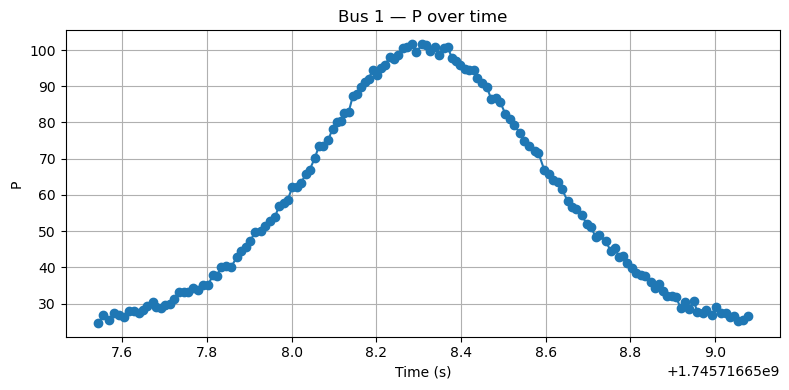

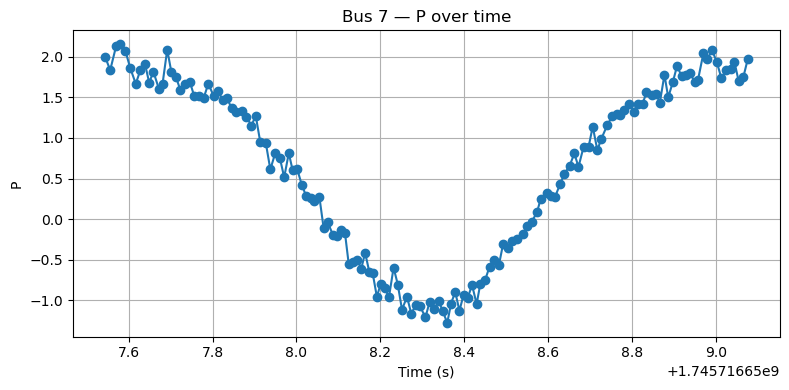

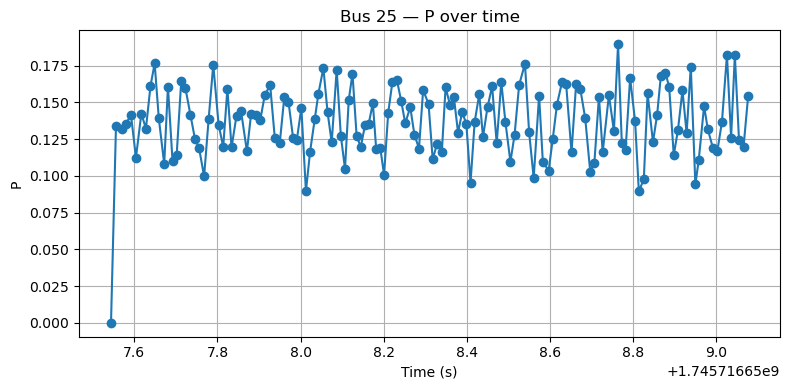

In [13]:
import matplotlib.pyplot as plt
def plot_psse_bus_parameter_over_time(psse_obj, bus_id, parameter, skip_first=False):
    times = []
    values = []

    snapshots = psse_obj.snapshot_history[2:] if skip_first else psse_obj.snapshot_history

    for snap in snapshots:
        df = snap.buses
        match = df[df["BUS_ID"] == bus_id]
        if not match.empty and parameter in match.columns:
            values.append(match[parameter].values[0])
            times.append(snap.time)

    if not values:
        print(f"⚠️ No data found for Bus {bus_id} and parameter '{parameter}'.")
        return

    plt.figure(figsize=(8, 4))
    plt.plot(times, values, marker="o")
    plt.title(f"Bus {bus_id} — {parameter} over time")
    plt.xlabel("Time (s)")
    plt.ylabel(parameter)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_psse_bus_parameter_over_time(wec_grid.psseObj, bus_id=1, parameter="P", skip_first=True)
plot_psse_bus_parameter_over_time(wec_grid.psseObj, bus_id=7, parameter="P", skip_first=True)
plot_psse_bus_parameter_over_time(wec_grid.psseObj, bus_id=25, parameter="P", skip_first=True)

In [26]:
snapshots = wec_grid.psseObj.snapshot_history
snapshots

[Snapshot(time=1745716182.1273572, buses=    BUS_ID  TYPE     Pd         Qd          Pg          Qg           P  \
 0        1     3    0.0   0.000000   35.930069  180.488586   35.930069   
 1        2     2   97.0  20.000000   67.000000    0.000000  -30.000000   
 2        3     1   90.0  19.000000    0.000000    0.000000  -90.000000   
 3        4     1   74.0  15.000001    0.000000    0.000000  -74.000000   
 4        5     1   71.0  14.000000    0.000000    0.000000  -71.000000   
 5        6     1   68.0  14.000000    0.000000    0.000000  -68.000000   
 6        7     2   62.0  13.000000   64.000000    0.000000    2.000000   
 7        8     1   85.0  18.000000    0.000000    0.000000  -85.000000   
 8        9     1  175.0  36.000000    0.000000    0.000000 -175.000000   
 9       10     1  100.0  23.000000    0.000000    0.000000 -100.000000   
 10      11     1    0.0   0.000000    0.000000    0.000000    0.000000   
 11      12     1    0.0   0.000000    0.000000    0.000000 

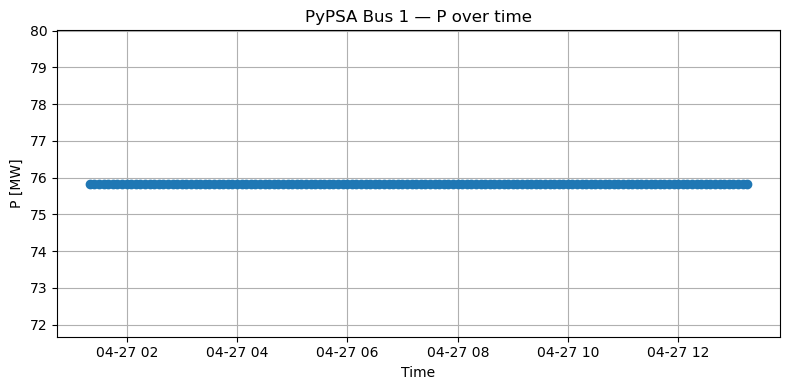

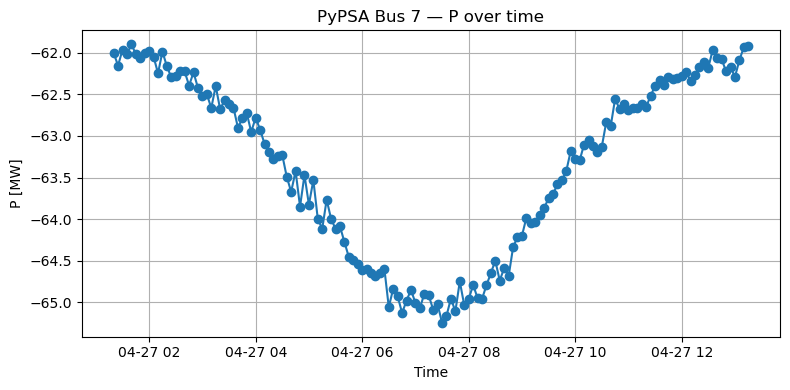

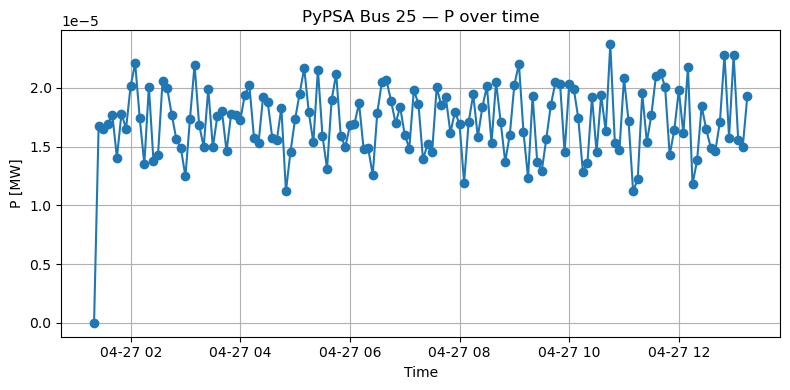

In [8]:
def plot_pypsa_bus_power_over_time(pypsa_network, bus_id, parameter='p', skip_initial=0):
    """
    Plots PyPSA bus-level power over time.

    Args:
        pypsa_network (pypsa.Network): The full PyPSA network object.
        bus_id (str or int): The bus ID (string if using named buses).
        parameter (str): 'p' (real) or 'q' (reactive).
        skip_initial (int): How many initial snapshots to skip (e.g., pre-WEC).
    """
    # Ensure bus_id is a string if needed
    bus_id = str(bus_id)
    
    # Extract the time-series
    series = getattr(pypsa_network.buses_t, parameter).loc[:, bus_id]
    if skip_initial > 0:
        series = series.iloc[skip_initial:]

    # Plot
    plt.figure(figsize=(8, 4))
    plt.plot(series.index, series.values, marker='o')
    plt.title(f"PyPSA Bus {bus_id} — {parameter.upper()} over time")
    plt.xlabel("Time")
    plt.ylabel(f"{parameter.upper()} [MW]")
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
plot_pypsa_bus_power_over_time(
    wec_grid.pypsaObj.pypsa_object,
    bus_id=1,
    parameter="p",
    skip_initial=0  # optional
)

plot_pypsa_bus_power_over_time(
    wec_grid.pypsaObj.pypsa_object,
    bus_id=7,
    parameter="p",
    skip_initial=0  # optional
)

plot_pypsa_bus_power_over_time(
    wec_grid.pypsaObj.pypsa_object,
    bus_id=25,
    parameter="p",
    skip_initial=0  # optional
)

In [11]:
def plot_all_generators_on_bus(psse_obj, bus_id, parameter="Pg", skip_first=False):
    """
    Plots a generator parameter (e.g. Pg, Qg) over time for all generators on a given bus.

    Args:
        psse_obj (PSSeWrapper): Your PSSE wrapper instance.
        bus_id (int): The bus number to filter on.
        parameter (str): Generator parameter to plot (e.g. 'Pg', 'Qg').
        skip_first (bool): If True, skip the first snapshot (e.g. pre-WEC case).
    """
    from collections import defaultdict

    gen_data = defaultdict(list)

    # Trim snapshots if needed
    snapshots = psse_obj.snapshot_history[2:] if skip_first else psse_obj.snapshot_history

    for snap in snapshots:
        time_stamp = snap.time
        df = snap.generators
        gens_at_bus = df[df["BUS_ID"] == bus_id]

        for _, row in gens_at_bus.iterrows():
            gen_id = row["GEN_ID"]
            if parameter in row:
                gen_data[gen_id].append((time_stamp, row[parameter]))

    if not gen_data:
        print(f"⚠️ No generators found on bus {bus_id}.")
        return

    # Plot
    plt.figure(figsize=(10, 5))
    for gen_id, points in gen_data.items():
        times, values = zip(*points)
        plt.plot(times, values, label=f"Gen {gen_id}")

    plt.title(f"Bus {bus_id} — {parameter} for all generators")
    plt.xlabel("Time (s)")
    plt.ylabel(parameter)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_all_generators_on_bus(wec_grid.psseObj, bus_id=1, parameter="Pg", skip_first=True)
plot_all_generators_on_bus(wec_grid.psseObj, bus_id=25, parameter="Pg", skip_first=True)


⚠️ No generators found on bus 1.
⚠️ No generators found on bus 25.


In [14]:
wec_grid.psseObj.snapshot_history

[Snapshot(time=1745716182.1273572, buses=    BUS_ID  TYPE     Pd         Qd          Pg          Qg           P  \
 0        1     3    0.0   0.000000   35.930069  180.488586   35.930069   
 1        2     2   97.0  20.000000   67.000000    0.000000  -30.000000   
 2        3     1   90.0  19.000000    0.000000    0.000000  -90.000000   
 3        4     1   74.0  15.000001    0.000000    0.000000  -74.000000   
 4        5     1   71.0  14.000000    0.000000    0.000000  -71.000000   
 5        6     1   68.0  14.000000    0.000000    0.000000  -68.000000   
 6        7     2   62.0  13.000000   64.000000    0.000000    2.000000   
 7        8     1   85.0  18.000000    0.000000    0.000000  -85.000000   
 8        9     1  175.0  36.000000    0.000000    0.000000 -175.000000   
 9       10     1  100.0  23.000000    0.000000    0.000000 -100.000000   
 10      11     1    0.0   0.000000    0.000000    0.000000    0.000000   
 11      12     1    0.0   0.000000    0.000000    0.000000 

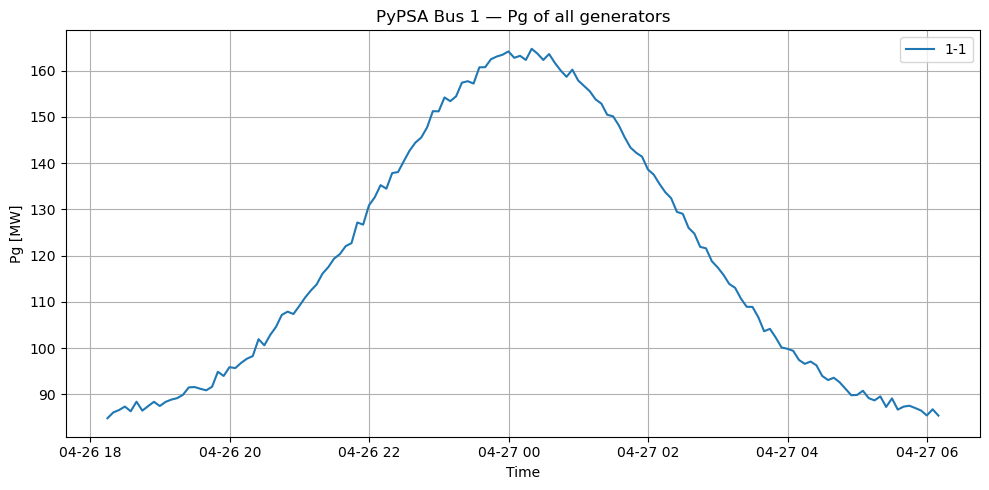

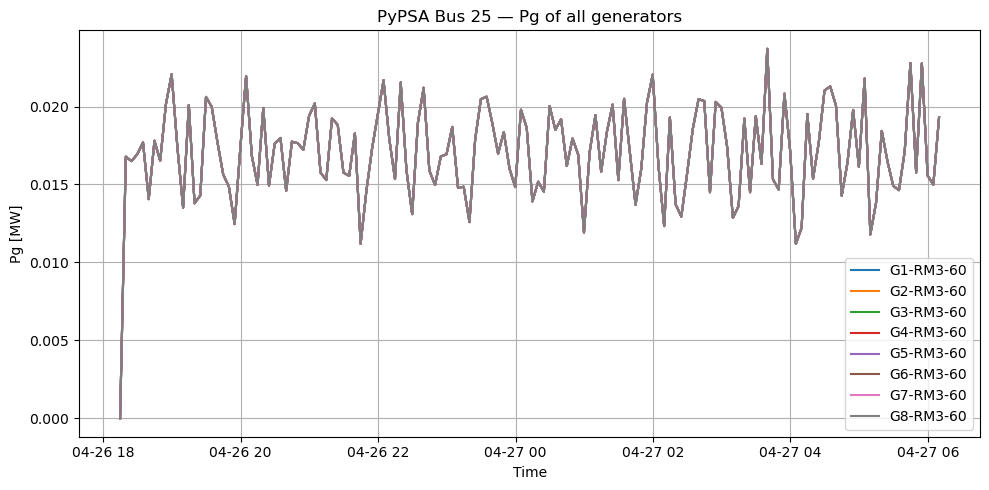

In [12]:
def plot_pypsa_generators_on_bus(pypsa_net, bus_id, skip_initial=0):
    """
    Plots Pg (active power) for all PyPSA generators connected to a given bus.

    Args:
        pypsa_net (pypsa.Network): The PyPSA network object.
        bus_id (str or int): The bus to filter by.
        skip_initial (int): Number of snapshots to skip at the beginning.
    """
    bus_id = str(bus_id)
    gens_at_bus = pypsa_net.generators[pypsa_net.generators.bus == bus_id].index

    if gens_at_bus.empty:
        print(f"⚠️ No generators found on bus {bus_id}.")
        return

    df = pypsa_net.generators_t.p[gens_at_bus]
    if skip_initial > 0:
        df = df.iloc[skip_initial:]

    plt.figure(figsize=(10, 5))
    for gen in gens_at_bus:
        plt.plot(df.index, df[gen], label=gen)

    plt.title(f"PyPSA Bus {bus_id} — Pg of all generators")
    plt.xlabel("Time")
    plt.ylabel("Pg [MW]")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_pypsa_generators_on_bus(wec_grid.pypsaObj.pypsa_object, bus_id=1, skip_initial=0)
plot_pypsa_generators_on_bus(wec_grid.pypsaObj.pypsa_object, bus_id=25, skip_initial=0)

In [19]:
wec_grid.pypsaObj.pypsa_object.generators

bus    p_set    q_set   q_max   q_min  v_set_pu  mva_base   p_nom  \
Generator                                                                     
G0          1   35.849  180.357  9900.0 -9900.0       1.0     100.0  1000.0   
G1          2   67.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G2          7   64.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G3         13  200.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G4         14    0.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G5         15  274.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G6         16  245.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G7         18  144.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G8         21  294.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G9         22  150.000  198.998  9900.0 -9900.0       1.0     100.0  1000.0   
G10        23  200.000    0.000     0.0     0.0       1.0     100.0  1000.0   
G1-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G2-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G3-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G4-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G5-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G6-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G7-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   
G8-RM3-60  25    0.000    0.000     NaN     NaN       NaN       NaN     0.0   

           p_min  Pc1  ...  shut_down_cost  min_up_time  min_down_time  \
Generator              ...                                               
G0           0.0  0.0  ...             0.0            0              0   
G1           0.0  0.0  ...             0.0            0              0   
G2           0.0  0.0  ...             0.0            0              0   
G3           0.0  0.0  ...             0.0            0              0   
G4           0.0  0.0  ...             0.0            0              0   
G5           0.0  0.0  ...             0.0            0              0   
G6           0.0  0.0  ...             0.0            0              0   
G7           0.0  0.0  ...             0.0            0              0   
G8           0.0  0.0  ...             0.0            0              0   
G9           0.0  0.0  ...             0.0            0              0   
G10          0.0  0.0  ...             0.0            0              0   
G1-RM3-60    NaN  NaN  ...             0.0            0              0   
G2-RM3-60    NaN  NaN  ...             0.0            0              0   
G3-RM3-60    NaN  NaN  ...             0.0            0              0   
G4-RM3-60    NaN  NaN  ...             0.0            0              0   
G5-RM3-60    NaN  NaN  ...             0.0            0              0   
G6-RM3-60    NaN  NaN  ...             0.0            0              0   
G7-RM3-60    NaN  NaN  ...             0.0            0              0   
G8-RM3-60    NaN  NaN  ...             0.0            0              0   

           up_time_before  down_time_before  ramp_limit_up  ramp_limit_down  \
Generator                                                                     
G0                      1                 0            NaN              NaN   
G1                      1                 0            NaN              NaN   
G2                      1                 0            NaN              NaN   
G3                      1                 0            NaN              NaN   
G4                      1                 0            NaN              NaN   
G5                      1                 0            NaN              NaN   
G6                      1                 0            NaN              NaN   
G7                      1                 0            NaN              NaN   
G8   

In [15]:
from datetime import datetime

# Common reference: PyPSA time index and start time
pypsa_time_index = wec_grid.pypsaObj.pypsa_object.generators_t.p.index
pypsa_start_time = pypsa_time_index[0]

# Clean containers
pypsa_gen, pypsa_bus = {}, {}
psse_gen, psse_bus = {}, {}

# Grab and align lengths
psse_snapshots = wec_grid.psseObj.snapshot_history[2:]  # Skip solve/setup
min_len = min(len(pypsa_time_index), len(psse_snapshots))

for i in range(min_len):
    seconds = round((pypsa_time_index[i] - pypsa_start_time).total_seconds(), 6)

    # --- PyPSA ---
    pypsa_gen[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.generators_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.generators_t.q.iloc[i],
        'p_set': wec_grid.pypsaObj.pypsa_object.generators_t.p_set.iloc[i],
        'status': wec_grid.pypsaObj.pypsa_object.generators_t.status.iloc[i],
    })
    pypsa_bus[seconds] = pd.DataFrame({
        'p': wec_grid.pypsaObj.pypsa_object.buses_t.p.iloc[i],
        'q': wec_grid.pypsaObj.pypsa_object.buses_t.q.iloc[i],
        'v_mag_pu': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu.iloc[i],
        'v_mag_pu_set': wec_grid.pypsaObj.pypsa_object.buses_t.v_mag_pu_set.iloc[i],
        'v_ang': wec_grid.pypsaObj.pypsa_object.buses_t.v_ang.iloc[i]
    })

    # --- PSSE ---
    psse_gen[seconds] = psse_snapshots[i].generators
    psse_bus[seconds] = psse_snapshots[i].buses
    
def flatten_snapshot_dict(snapshot_dict, label):
    flat_list = []
    for t, df in snapshot_dict.items():
        df_copy = df.copy()
        df_copy["time_s"] = t
        flat_list.append(df_copy)
    return pd.concat(flat_list).reset_index().rename(columns={"index": label})

# Flatten to long DataFrames
df_psse_gen = flatten_snapshot_dict(psse_gen, "GEN_ID")
df_psse_bus = flatten_snapshot_dict(psse_bus, "BUS_ID")
df_pypsa_gen = flatten_snapshot_dict(pypsa_gen, "GEN_ID")
df_pypsa_bus = flatten_snapshot_dict(pypsa_bus, "BUS_ID")


# # Save each to disk
# df_psse_gen.to_csv("./2_draft_data/psse_generators.csv", index=False)
# df_psse_bus.to_csv("./2_draft_data/psse_buses.csv", index=False)
# df_pypsa_gen.to_csv("./2_draft_data/pypsa_generators.csv", index=False)
# df_pypsa_bus.to_csv("./2_draft_data/pypsa_buses.csv", index=False)

In [16]:
df_pypsa_gen

GEN_ID           p           q    p_set  status   time_s
0            G0   13.178339 -111.547059      NaN     1.0      0.0
1            G1   67.000000   56.390638      NaN     1.0      0.0
2     G1-RM3-60    0.000000    0.000000  0.00000     NaN      0.0
3           G10  200.000000   -5.988006      NaN     1.0      0.0
4            G2   64.000000   41.774557      NaN     1.0      0.0
...         ...         ...         ...      ...     ...      ...
2731         G7  144.000000   36.879291      NaN     1.0  42900.0
2732  G7-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2733         G8  294.000000  -52.662888      NaN     1.0  42900.0
2734  G8-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2735         G9  150.000000  -29.500543      NaN     1.0  42900.0

[2736 rows x 6 columns]

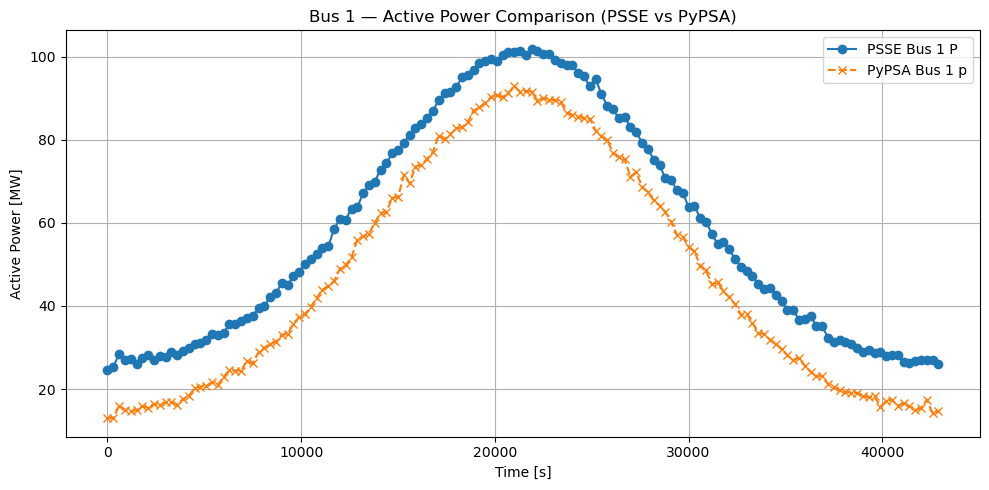

In [ ]:
import matplotlib.pyplot as plt

# Extract 'P' from PSSE bus snapshots at BUS_ID = 1
psse_p_bus1 = {t: df.set_index("BUS_ID").at[1, "P"] for t, df in psse_bus.items()}

# Extract 'p' from PyPSA bus snapshots at bus "1" (string index)
pypsa_p_bus1 = {t: df.loc["1", "p"] for t, df in pypsa_bus.items()}
aa
# Sort time values
psse_times, psse_values = zip(*sorted(psse_p_bus1.items()))
pypsa_times, pypsa_values = zip(*sorted(pypsa_p_bus1.items()))

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(psse_times, psse_values, label="PSSE Bus 1 P", marker="o")
plt.plot(pypsa_times, pypsa_values, label="PyPSA Bus 1 p", linestyle="--", marker="x")
plt.xlabel("Time [s]")
plt.ylabel("Active Power [MW]")
plt.title("Bus 1 — Active Power Comparison (PSSE vs PyPSA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
psse_gen

NameError: name 'psse_gen' is not defined

In [38]:
psse_bus

{0.0:     BUS_ID  BUS_TYPE     Pd         Qd          Pg          Qg           P  \
 0        1         3    0.0   0.000000   24.709679   65.376091   24.709679   
 1        2         2   97.0  20.000000   67.000000    0.000000  -30.000000   
 2        3         1   90.0  19.000000    0.000000    0.000000  -90.000000   
 3        4         1   74.0  15.000001    0.000000    0.000000  -74.000000   
 4        5         1   71.0  14.000000    0.000000    0.000000  -71.000000   
 5        6         1   68.0  14.000000    0.000000    0.000000  -68.000000   
 6        7         2   62.0  13.000000   64.000000    0.000000    2.000000   
 7        8         1   85.0  18.000000    0.000000    0.000000  -85.000000   
 8        9         1  175.0  36.000000    0.000000    0.000000 -175.000000   
 9       10         1  100.0  23.000000    0.000000    0.000000 -100.000000   
 10      11         1    0.0   0.000000    0.000000    0.000000    0.000000   
 11      12         1    0.0   0.000000    0.00

In [39]:
pypsa_bus

{0.0:               p           q  v_mag_pu     v_ang
 Bus                                            
 1     13.178339 -111.547059  1.000000  0.000000
 2    -30.000000   36.390638  1.000000 -0.000797
 3    -90.000000  -19.000000  0.971546  0.133967
 4    -74.000000  -15.000000  0.964527 -0.016244
 5    -71.000000  -14.000000  0.988233 -0.013045
 6    -68.000000  -14.000000  1.018833 -0.007881
 7      2.000000   28.774557  1.000000 -0.035329
 8    -85.000000  -18.000000  0.981581 -0.031696
 9   -175.000000  -36.000000  0.971176  0.051681
 10  -100.000000  -23.000000  1.005391  0.033608
 11     0.000000    0.000000  0.990402  0.151724
 12     0.000000    0.000000  0.989454  0.140167
 13    70.000000   23.044123  1.000000  0.185431
 14   -92.000000   48.874432  1.000000  0.229299
 15   116.000000   40.764157  1.000000  0.429398
 16   145.000000   13.979080  1.000000  0.339429
 17     0.000000    0.000000  0.999846  0.411658
 18   -18.000000    2.858454  1.000000  0.438957
 19   -90.00000

In [40]:
pypsa_gen

{0.0:                     p           q
 Generator                        
 G0          13.178339 -111.547059
 G1          67.000000   56.390638
 G2          64.000000   41.774557
 G3         200.000000   50.044123
 G4           0.000000   68.874432
 G5         274.000000   72.764157
 G6         245.000000   33.979080
 G7         144.000000   36.858454
 G8         294.000000  -52.659329
 G9         150.000000  -29.502979
 G10        200.000000   -5.988006
 G1-RM3-60    0.000000    0.000000
 G2-RM3-60    0.000000    0.000000
 G3-RM3-60    0.000000    0.000000
 G4-RM3-60    0.000000    0.000000
 G5-RM3-60    0.000000    0.000000
 G6-RM3-60    0.000000    0.000000
 G7-RM3-60    0.000000    0.000000
 G8-RM3-60    0.000000    0.000000,
 300.0:                     p           q
 Generator                        
 G0          16.555851 -113.023368
 G1          67.000000   56.973801
 G2          64.000000   41.838222
 G3         200.000000   49.944374
 G4           0.000000   68.731450
 G5    

In [17]:
def flatten_snapshot_dict(snapshot_dict, label):
    flat_list = []
    for t, df in snapshot_dict.items():
        df_copy = df.copy()
        df_copy["time_s"] = t
        flat_list.append(df_copy)
    return pd.concat(flat_list).reset_index().rename(columns={"index": label})

# Flatten to long DataFrames
df_psse_gen = flatten_snapshot_dict(psse_gen, "GEN_ID")
df_psse_bus = flatten_snapshot_dict(psse_bus, "BUS_ID")
df_pypsa_gen = flatten_snapshot_dict(pypsa_gen, "GEN_ID")
df_pypsa_bus = flatten_snapshot_dict(pypsa_bus, "BUS_ID")


# # Save each to disk
# df_psse_gen.to_csv("./2_draft_data/psse_generators.csv", index=False)
# df_psse_bus.to_csv("./2_draft_data/psse_buses.csv", index=False)
# df_pypsa_gen.to_csv("./2_draft_data/pypsa_generators.csv", index=False)
# df_pypsa_bus.to_csv("./2_draft_data/pypsa_buses.csv", index=False)

In [18]:
df_pypsa_gen

GEN_ID           p           q    p_set  status   time_s
0            G0   13.178339 -111.547059      NaN     1.0      0.0
1            G1   67.000000   56.390638      NaN     1.0      0.0
2     G1-RM3-60    0.000000    0.000000  0.00000     NaN      0.0
3           G10  200.000000   -5.988006      NaN     1.0      0.0
4            G2   64.000000   41.774557      NaN     1.0      0.0
...         ...         ...         ...      ...     ...      ...
2731         G7  144.000000   36.879291      NaN     1.0  42900.0
2732  G7-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2733         G8  294.000000  -52.662888      NaN     1.0  42900.0
2734  G8-RM3-60    0.019310    0.000000  0.01931     NaN  42900.0
2735         G9  150.000000  -29.500543      NaN     1.0  42900.0

[2736 rows x 6 columns]

In [ ]:
df_psse_gen

GEN_ID  BUS_ID GEN_ID          Pg         Qg  MBASE  STATUS   time_s
0         0       1     1    24.709679  65.376091  100.0       1      0.0
1         1       2     1    67.000000   0.000000  100.0       1      0.0
2         2       7     1    64.000000   0.000000  100.0       1      0.0
3         3      13     1   200.000000   0.000000  100.0       1      0.0
4         4      14     1     0.000000   0.000000  100.0       1      0.0
...     ...     ...    ...         ...        ...    ...     ...      ...
2731     14      25     G4    0.019310  11.119190    1.0       1  42900.0
2732     15      25     G5    0.019310  11.119190    1.0       1  42900.0
2733     16      25     G6    0.019310  11.119190    1.0       1  42900.0
2734     17      25     G7    0.019310  11.119190    1.0       1  42900.0
2735     18      25     G8    0.019310  11.119190    1.0       1  42900.0

[2736 rows x 8 columns]

In [25]:
wec_grid.pypsaObj.pypsa_object.generators_t.keys()

dict_keys(['p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'marginal_cost', 'p', 'q', 'status', 'mu_upper', 'mu_lower', 'mu_p_set', 'mu_ramp_limit_up', 'mu_ramp_limit_down'])

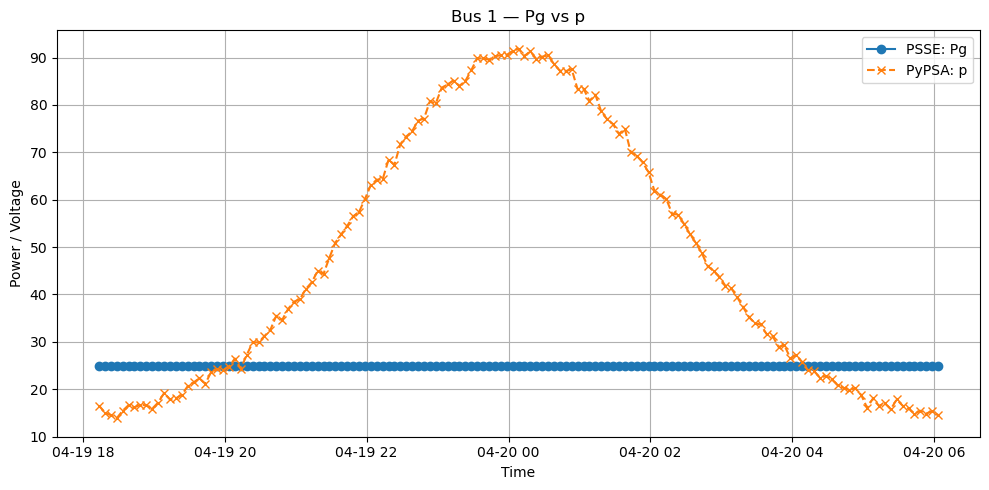

In [16]:
def compare_bus_parameter_psse_vs_pypsa(psse_obj, pypsa_net, bus_id, psse_param="P", pypsa_param="p", skip_first_psse=True, skip_first_pypsa=0):
    import pandas as pd
    from datetime import datetime

    bus_id = str(bus_id)

    # --- PyPSA timeline ---
    pypsa_series = pypsa_net.buses_t[pypsa_param][bus_id].iloc[skip_first_pypsa:]
    timeline = pypsa_series.index  # Use this as common time base

    # --- PSSE values ---
    snapshots = psse_obj.snapshot_history[1:] if skip_first_psse else psse_obj.snapshot_history
    psse_dict = {}

    for snap in snapshots:
        df = snap.buses
        row = df[df["BUS_ID"] == int(bus_id)]
        if not row.empty and psse_param in row.columns:
            ts = datetime.fromtimestamp(snap.time)
            psse_dict[ts] = row[psse_param].values[0]

    # PSSE Series: raw → reindexed to match PyPSA time index
    psse_series = pd.Series(psse_dict)
    psse_series_aligned = psse_series.reindex(timeline, method='nearest')  # or interpolate()

    # --- Plot ---
    plt.figure(figsize=(10, 5))
    plt.plot(timeline, psse_series_aligned.values, label=f"PSSE: {psse_param}", marker='o')
    plt.plot(timeline, pypsa_series.values, label=f"PyPSA: {pypsa_param}", linestyle='--', marker='x')

    plt.title(f"Bus {bus_id} — {psse_param} vs {pypsa_param}")
    plt.xlabel("Time")
    plt.ylabel("Power / Voltage")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
compare_bus_parameter_psse_vs_pypsa(
    psse_obj=wec_grid.psseObj,
    pypsa_net=wec_grid.pypsaObj.pypsa_object,
    bus_id=1,
    psse_param="Pg",
    pypsa_param="p",
    skip_first_psse=True,
    skip_first_pypsa=1
)

In [12]:
compare_bus_parameter_psse_vs_pypsa(
    psse_obj=wec_grid.psseObj,
    pypsa_net=wec_grid.pypsaObj.pypsa_object,
    bus_id=25,
    psse_param="P",
    pypsa_param="p",
    skip_first_psse=True,
    skip_first_pypsa=1
)

ValueError: Date ordinal -87234343.6153196 converts to -236870-06-25T09:13:56.386816 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x000001994B1D7400> (for post_execute):


ValueError: Date ordinal -87234343.6153196 converts to -236870-06-25T09:13:56.386816 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

ValueError: Date ordinal -87234343.6153196 converts to -236870-06-25T09:13:56.386816 (using epoch 1970-01-01T00:00:00), but Matplotlib dates must be between year 0001 and 9999.

<Figure size 1000x500 with 1 Axes>

In [6]:
mod_grid_psse_bus = wec_grid.psseObj.bus_dataframe
mod_grid_psse_gen = wec_grid.psseObj.gen_dataframe

mod_grid_pypsa_bus = wec_grid.pypsaObj.pypsa_object.buses_t
mod_grid_pypsa_gen = wec_grid.pypsaObj.pypsa_object.generators_t

In [7]:
def print_df_diff_report(df_before, df_after, index_cols, label=""):
    """
    Prints a readable summary of differences between two DataFrames.

    Args:
        df_before (pd.DataFrame): Original snapshot.
        df_after (pd.DataFrame): Modified snapshot.
        index_cols (list): Columns to use as a unique index.
        label (str): Optional label (e.g., 'Bus', 'Gen') for print output.
    """
    print(f"\n📊 === {label} DIFF REPORT ===")

    # Index both DataFrames
    df1 = df_before.set_index(index_cols)
    df2 = df_after.set_index(index_cols)

    # Align common rows for value comparison
    common_idx = df1.index.intersection(df2.index)

    # Get diffs only on common
    diffs = df2.loc[common_idx].ne(df1.loc[common_idx])  # bool mask
    changed_rows = diffs.any(axis=1)

    for idx in common_idx[changed_rows]:
        changes = []
        for col in df1.columns:
            if df1.loc[idx, col] != df2.loc[idx, col]:
                before_val = df1.loc[idx, col]
                after_val = df2.loc[idx, col]
                changes.append(f"{col}: {before_val} → {after_val}")
        if changes:
            print(f"🔄 Changed {label} {idx}: " + "; ".join(changes))

    # Check for new rows
    new_idx = df2.index.difference(df1.index)
    for idx in new_idx:
        print(f"➕ New {label} {idx}")

    # Check for removed rows (if needed)
    removed_idx = df1.index.difference(df2.index)
    for idx in removed_idx:
        print(f"❌ Removed {label} {idx}")

In [8]:
print_df_diff_report(
    df_before=oringal_grid_psse_bus,
    df_after=mod_grid_psse_bus,
    index_cols=["BUS_ID"],
    label="Bus"
)

print_df_diff_report(
    df_before=oringal_grid_psse_gen,
    df_after=mod_grid_psse_gen,
    index_cols=["BUS_ID", "GEN_ID"],
    label="Gen"
)


📊 === Bus DIFF REPORT ===
🔄 Changed Bus 1: Pg: 35.93006896972656 → 24.709678649902344; Qg: 180.48858642578125 → 65.37609100341797; P: 35.93006896972656 → 24.709678649902344; Q: 180.48858642578125 → 65.37609100341797
🔄 Changed Bus 2: V_PU: 0.9978222250938416 → 0.9985697865486145; V_KV: 137.699462890625 → 137.80262756347656; ANGLE_DEG: 0.010373272933065891 → -0.006518753245472908
🔄 Changed Bus 3: V_PU: 0.8637025952339172 → 0.908059298992157; V_KV: 119.19096374511719 → 125.31217956542969; ANGLE_DEG: 10.755864143371582 → 9.322609901428223
🔄 Changed Bus 4: V_PU: 0.8870140314102173 → 0.9250667691230774; V_KV: 122.4079360961914 → 127.65921783447266; ANGLE_DEG: -0.4152083694934845 → -0.6756808161735535
🔄 Changed Bus 5: V_PU: 0.9272173643112183 → 0.9588682651519775; V_KV: 127.95599365234375 → 132.32382202148438; ANGLE_DEG: -0.22941991686820984 → -0.503818929195404
🔄 Changed Bus 6: V_PU: 0.9079522490501404 → 0.9644222259521484; V_KV: 125.29740905761719 → 133.09027099609375; ANGLE_DEG: 0.3918165

In [12]:
oringal_grid_pypsa_bus.p

Bus                                 1     2     3     4     5     6    7  \
snapshot                                                                   
2025-04-19 17:28:54.055595  13.178339 -30.0 -90.0 -74.0 -71.0 -68.0  2.0   

Bus                            8      9     10  ...     16   17    18    19  \
snapshot                                        ...                           
2025-04-19 17:28:54.055595 -85.0 -175.0 -100.0  ...  145.0  0.0 -18.0 -90.0   

Bus                           20     21     22     23   24   25  
snapshot                                                         
2025-04-19 17:28:54.055595 -65.0  294.0  150.0  200.0  0.0  0.0  

[1 rows x 25 columns]

In [ ]:
 wec_grid.pypsaObj.pypsa_object.generators_t

Generator                          G0    G1    G2     G3   G4     G5     G6  \
snapshot                                                                      
2025-04-19 17:18:22.784759  13.178339  67.0  64.0  200.0  0.0  274.0  245.0   

Generator                      G7     G8     G9    G10  G1-RM3-60  G2-RM3-60  \
snapshot                                                                       
2025-04-19 17:18:22.784759  144.0  294.0  150.0  200.0        0.0        0.0   

Generator                   G3-RM3-60  G4-RM3-60  G5-RM3-60  G6-RM3-60  \
snapshot                                                                 
2025-04-19 17:18:22.784759        0.0        0.0        0.0        0.0   

Generator                   G7-RM3-60  G8-RM3-60  
snapshot                                          
2025-04-19 17:18:22.784759        0.0        0.0

In [ ]:
'''
    
'''
wec_grid.psseObj.ac_injection()

Running powerflow for time: 0.0

 No power flow data changed for machine "G1" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G2" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G3" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G4" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G5" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G6" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G7" at bus 25 [RM3-25      138.00]

 No power flow data changed for machine "G8" at bus 25 [RM3-25      138.00]
Time step 0.0 not found in load_profiles.

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(     17     )    0.0000(      6     )
                                                             0.00000(      6     )   0.00000(     21     )
   1         0.0000(      2     )    0.000

In [ ]:
'''
    
'''
wec_grid.initialize_pypsa("fnsl")

In [9]:
'''

'''
from WecGrid import WecGrid
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid.initialize_psse("fnsl")
wec_grid.initialize_pypsa("fnsl")


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 24 records for Bus data
 Starting processing of Load data records
 Finished processing of 16 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 11 records for Generator data
 Starting processing of Branch data records
 Finished processing of 32 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 24 records for 6 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of T

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-19 14:23:56.866025'], dtype='datetime64[ns]', name='snapshot', freq=None)
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.572971 seconds


pyPSA initialized
PyPSA initialized with case file: IEEE_24_bus.RAW.


In [29]:
wec_grid.pypsaObj.pypsa_object.df('Bus')

Pd    Qd   Gs     Bs  area  v_mag_pu_set  v_ang_set  v_nom  zone  \
Bus                                                                        
1      0.0   0.0  0.0  120.0   1.0       1.00000     0.0000  138.0   1.0   
2     97.0  20.0  0.0    0.0   1.0       1.00000     0.0102  138.0   1.0   
3     90.0  19.0  0.0    0.0   1.0       0.86395    10.7472  138.0   1.0   
4     74.0  15.0  0.0    0.0   1.0       0.88721    -0.4167  138.0   1.0   
5     71.0  14.0  0.0    0.0   1.0       0.92693    -0.2237  138.0   1.0   
6     68.0  14.0  0.0  100.0   1.0       0.90837     0.3902  138.0   1.0   
7     62.0  13.0  0.0    0.0   1.0       1.00000    -0.5811  138.0   1.0   
8     85.0  18.0  0.0    0.0   1.0       0.80581    -0.8692  230.0   1.0   
9    175.0  36.0  0.0    0.0   1.0       0.83528     4.9829  138.0   1.0   
10   100.0  23.0  0.0    0.0   1.0       0.88216     3.7178  138.0   1.0   
11     0.0   0.0  0.0    0.0   1.0       0.83645    12.6275  230.0   1.0   
12     0.0   0.0  0.0    0.0   1.0       0.84016    11.7711  230.0   1.0   
13   130.0  27.0  0.0    0.0   1.0       1.00000    15.4352  230.0   1.0   
14    92.0  20.0  0.0    0.0   1.0       1.00000    18.7410  230.0   1.0   
15   158.0  32.0  0.0    0.0   1.0       1.00000    33.1896  230.0   1.0   
16   100.0  20.0  0.0    0.0   1.0       1.00000    27.0625  230.0   1.0   
17     0.0   0.0  0.0    0.0   1.0       0.89595    32.0375  230.0   1.0   
18   162.0  34.0  0.0    0.0   1.0       1.00000    33.8753  230.0   1.0   
19    90.0  18.0  0.0    0.0   1.0       0.85215    23.7833  230.0   1.0   
20    65.0  13.0  0.0    0.0   1.0       0.84969    22.3112  230.0   1.0   
21     0.0   0.0  0.0    0.0   1.0       1.00000    35.6336  230.0   1.0   
22     0.0   0.0  0.0    0.0   1.0       1.00000    37.4784  230.0   1.0   
23     0.0   0.0  0.0    0.0   1.0       1.00000    22.0594  230.0   1.0   
24     0.0   0.0  0.0    0.0   1.0       0.85521    24.7952  230.0   1.0   
25     NaN   NaN  NaN    NaN   NaN       1.00000        NaN  138.0   NaN   

     v_mag_pu_max  v_mag_pu_min control type    x    y carrier  unit  \
Bus                                                                    
1            1.10          0.90   Slack       0.0  0.0      AC  None   
2            1.10          0.90      PV       0.0  0.0      AC  None   
3            1.10          0.90      PQ       0.0  0.0      AC  None   
4            1.10          0.90      PQ       0.0  0.0      AC  None   
5            1.10          0.90      PQ       0.0  0.0      AC  None   
6            1.10          0.90      PQ       0.0  0.0      AC  None   
7            1.10          0.90      PV       0.0  0.0      AC  None   
8            1.10          0.90      PQ       0.0  0.0      AC  None   
9            1.10          0.90      PQ       0.0  0.0      AC  None   
10           1.10          0.90      PQ       0.0  0.0      AC  None   
11           1.10          0.90      PQ       0.0  0.0      AC  None   
12           1.10          0.90      PQ       0.0  0.0      AC  None   
13           1.10          0.90      PV       0.0  0.0      AC  None   
14           1.10          0.90      PV       0.0  0.0      AC  None   
15           1.10          0.90      PV       0.0  0.0      AC  None   
16           1.10          0.90      PV       0.0  0.0      AC  None   
17           1.10          0.90      PQ       0.0  0.0      AC  None   
18           1.10          0.90      PV       0.0  0.0      AC  None   
19           1.10          0.90      PQ       0.0  0.0      AC  None   
20           1.10          0.90      PQ       0.0  0.0      AC  None   
21           1.10          0.90      PV       0.0  0.0      AC  None   
22           1.10          0.90      PV       0.0  0.0      AC  None   
23           1.10          0.90      PV       0.0  0.0      AC  None   
24           1.10          0.90      PQ       0.0  0.0      AC  None   
25           1.05          0.95      PV       0.0  0.0      AC  None   

    sub_ne

In [11]:
wec_grid.psseObj.dataframe

BUS_ID     Bus   BASE        PU     ANGLE      MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  1.192093e-05     3   35.930069   
1        2   BUS 2  138.0  0.997822  0.000181  0.000000e+00     2   67.000000   
2        3   BUS 3  138.0  0.863703  0.187725  1.192093e-05     1    0.000000   
3        4   BUS 4  138.0  0.887014 -0.007247  6.664002e-06     1    0.000000   
4        5   BUS 5  138.0  0.927217 -0.004004  0.000000e+00     1    0.000000   
5        6   BUS 6  138.0  0.907952  0.006838  6.365779e-06     1    0.000000   
6        7   BUS 7  138.0  0.796234 -0.010124  0.000000e+00     2   64.000000   
7        8   BUS 8  230.0  0.805368 -0.015157  1.343172e-06     1    0.000000   
8        9   BUS 9  138.0  0.834940  0.087076  6.365779e-06     1    0.000000   
9       10  BUS 10  138.0  0.881702  0.064990  2.980232e-06     1    0.000000   
10      11  BUS 11  230.0  0.836073  0.220619  0.000000e+00     1    0.000000   
11      12  BUS 12  230.0  0.839763  0.205660  2.980232e-06     1    0.000000   
12      13  BUS 13  230.0  0.836927  0.269663  0.000000e+00     2  200.000000   
13      14  BUS 14  230.0  0.836423  0.327386  1.192093e-05     2    0.000000   
14      15  BUS 15  230.0  0.885209  0.579676  2.980232e-06     2  274.000000   
15      16  BUS 16  230.0  0.862146  0.472709  1.812804e-05     2  245.000000   
16      17  BUS 17  230.0  0.895736  0.559572  5.960464e-06     1    0.000000   
17      18  BUS 18  230.0  0.901057  0.591654  0.000000e+00     2  144.000000   
18      19  BUS 19  230.0  0.851835  0.415460  7.450581e-07     1    0.000000   
19      20  BUS 20  230.0  0.849352  0.389755  6.006850e-06     1    0.000000   
20      21  BUS 21  230.0  0.911253  0.622349  2.402740e-05     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.654534  1.192093e-05     2  150.000000   
22      23  BUS 23  230.0  0.849713  0.385360  7.450581e-07     2  200.000000   
23      24  BUS 24  230.0  0.854969  0.433070  0.000000e+00     1    0.000000   

         Q Gen  P Load     Q Load           P           Q        ΔP  \
0   180.488586     NaN        NaN   35.930069  180.488586  0.000000   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000000   
2     0.000000    90.0  19.000000  -90.000000  -19.000000 -0.000012   
3     0.000000    74.0  15.000001  -74.000000  -15.000001  0.000003   
4     0.000000    71.0  14.000000  -71.000000  -14.000000  0.000000   
5     0.000000    68.0  14.000000  -68.000000  -14.000000 -0.000002   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000000   
7     0.000000    85.0  18.000000  -85.000000  -18.000000 -0.000001   
8     0.000000   175.0  36.000000 -175.000000  -36.000000 -0.000006   
9     0.000000   100.0  23.000000 -100.000000  -23.000000  0.000003   
10    0.000000     NaN        NaN    0.000000    0.000000  0.000000   
11    0.000000     NaN        NaN    0.000000    0.000000  0.000000   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000000   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000012   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000000   
15    0.000000   100.0  20.000000  145.000000  -20.000000 -0.000018   
16    0.000000     NaN        NaN    0.000000    0.000000  0.000000   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000000   
18    0.000000    90.0  18.000000  -90.000000  -18.000000  0.000000   
19    0.000000    65.0  13.000000  -65.000000  -13.000000  0.000006   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000024   
21  199.455856     NaN        NaN  150.000000  199.455856  0.000000   
22    0.000000     NaN        NaN  200.000000    0.000000  0.000000   
23    0.000000     NaN        NaN    0.000000    0.000000  0.000000   

              ΔQ       M_Angle     M_Mag  
0  -1.192093e-05  1.192093e-05 -1.570796  
1   0.000000e+00  0.000000e+00  0.000000  
2   0.000000e+00  1.192093e-05  3.141593  
3  -5.960464e-06  6.664002e-06

In [17]:
# Now we can start adding WECs to our grid. We first need to create a WEC object. In this cell we're going to simulate a new wec simulation and create a new WEC object from that run. Because we initalized both PSSE and pyPSA, we can see that both grid networks are altered similarly.
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=8, from_bus=7, to_bus=25, mbase= 1.0, config=config) 


INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-19 14:23:56.866025'], dtype='datetime64[ns]', name='snapshot', freq=None)


Adding WECs to pyPSA network
Bus 25 added successfully.
Generator G1-RM3-60 added successfully to bus 25.
Generator G2-RM3-60 added successfully to bus 25.
Generator G3-RM3-60 added successfully to bus 25.
Generator G4-RM3-60 added successfully to bus 25.
Generator G5-RM3-60 added successfully to bus 25.
Generator G6-RM3-60 added successfully to bus 25.
Generator G7-RM3-60 added successfully to bus 25.
Generator G8-RM3-60 added successfully to bus 25.
Branch from 7 to 25 added successfully.


INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with error of 0.000000 in 0.052259 seconds


pyPSA network updated with WECs 

Adding WECs to PSS/E network

 Bus 25 [RM3-25      138.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          1               2      IDE
    0.00000         138.000      BASKV
 "            "  "RM3-25      "  NAME
Bus 25 added successfully.

 Plant at bus 25 [RM3-25      138.00] added. Data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
          0              25      IREG
Plant data added successfully to bus 25.

 Machine "G1" at bus 25 [RM3-25      138.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    100.000         1.00000      MBASE
Generator G1 added successfully to bus 25.

 Machine "G2" at bus 25 [RM3-25      138.00] added. Power flow data items with non-default values:
 X--DEFAULT---X  X---ACTUAL---X  DATA ITEM
    100.000         1.00000      MBASE
Generator G2 added successfully to bus 25.

 Machine "G3" 

In [49]:
#wec_grid.generate_load_curve()

In [50]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0)

G1

 No power flow data changed for machine "G1" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G2

 No power flow data changed for machine "G2" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G3

 No power flow data changed for machine "G3" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G4

 No power flow data changed for machine "G4" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G5

 No power flow data changed for machine "G5" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G6

 No power flow data changed for machine "G6" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G7

 No power flow data changed for machine "G7" at bus 25 [RM3-25      138.00]

 No power flow data changed for bus 25 [RM3-25      138.00]
G8

 No power

In [51]:
wec_grid.pypsaObj.pypsa_object.generators_t.p = 24.551025390625
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-18 15:36:42.390729', '2025-04-18 15:41:42.390729',
               '2025-04-18 15:46:42.390729', '2025-04-18 15:51:42.390729',
               '2025-04-18 15:56:42.390729', '2025-04-18 16:01:42.390729',
               '2025-04-18 16:06:42.390729', '2025-04-18 16:11:42.390729',
               '2025-04-18 16:16:42.390729', '2025-04-18 16:21:42.390729',
               ...
               '2025-04-19 02:46:42.390729', '2025-04-19 02:51:42.390729',
               '2025-04-19 02:56:42.390729', '2025-04-19 03:01:42.390729',
               '2025-04-19 03:06:42.390729', '2025-04-19 03:11:42.390729',
               '2025-04-19 03:16:42.390729', '2025-04-19 03:21:42.390729',
               '2025-04-19 03:26:42.390729', '2025-04-19 03:31:42.390729'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with erro

In [6]:
wec_grid.psseObj.dataframe

BUS_ID     Bus   BASE        PU     ANGLE      MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  9.996003e-06     3   24.551025   
1        2   BUS 2  138.0  0.998570 -0.000113  0.000000e+00     2   67.000000   
2        3   BUS 3  138.0  0.908061  0.162786  5.960464e-06     1    0.000000   
3        4   BUS 4  138.0  0.925070 -0.011735  2.980232e-06     1    0.000000   
4        5   BUS 5  138.0  0.958871 -0.008745  6.143906e-06     1    0.000000   
5        6   BUS 6  138.0  0.964423 -0.000766  4.485843e-06     1    0.000000   
6        7   BUS 7  138.0  1.000000 -0.046823  5.961022e-06     2   64.000000   
7        8   BUS 8  230.0  0.952827 -0.035189  3.725290e-07     1    0.000000   
8        9   BUS 9  138.0  0.901919  0.068227  8.429370e-06     1    0.000000   
9       10  BUS 10  138.0  0.944631  0.048199  1.163818e-05     1    0.000000   
10      11  BUS 11  230.0  0.897500  0.185364  0.000000e+00     1    0.000000   
11      12  BUS 12  230.0  0.903350  0.171865  0.000000e+00     1    0.000000   
12      13  BUS 13  230.0  0.898856  0.228173  0.000000e+00     2  200.000000   
13      14  BUS 14  230.0  0.890686  0.281259  1.192093e-05     2    0.000000   
14      15  BUS 15  230.0  0.919116  0.515486  0.000000e+00     2  274.000000   
15      16  BUS 16  230.0  0.906896  0.413293  1.194419e-05     2  245.000000   
16      17  BUS 17  230.0  0.928546  0.495365  5.960464e-06     1    0.000000   
17      18  BUS 18  230.0  0.931523  0.526059  1.192093e-05     2  144.000000   
18      19  BUS 19  230.0  0.901857  0.360351  7.450581e-07     1    0.000000   
19      20  BUS 20  230.0  0.903297  0.336200  5.960464e-06     1    0.000000   
20      21  BUS 21  230.0  0.939362  0.555553  0.000000e+00     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.590677  5.960464e-06     2  150.000000   
22      23  BUS 23  230.0  0.905555  0.331624  2.980232e-06     2  200.000000   
23      24  BUS 24  230.0  0.895791  0.382122  3.725290e-07     1    0.000000   
24      25  BUS 25  138.0  1.000000 -0.046823  5.960464e-06     4    0.154480   

         Q Gen  P Load     Q Load           P           Q            ΔP  \
0    65.416588     NaN        NaN   24.551025   65.416588 -4.470348e-06   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000000e+00   
2     0.000000    90.0  19.000000  -90.000000  -19.000000 -5.960464e-06   
3     0.000000    74.0  15.000001  -74.000000  -15.000001 -2.980232e-06   
4     0.000000    71.0  14.000000  -71.000000  -14.000000 -1.490116e-06   
5     0.000000    68.0  14.000000  -68.000000  -14.000000 -3.725290e-07   
6     0.000000    62.0  13.000000    2.000000  -13.000000 -8.149073e-08   
7     0.000000    85.0  18.000000  -85.000000  -18.000000  3.725290e-07   
8     0.000000   175.0  36.000000 -175.000000  -36.000000  5.960464e-06   
9     0.000000   100.0  23.000000 -100.000000  -23.000000 -8.940697e-06   
10    0.000000     NaN        NaN    0.000000    0.000000  0.000000e+00   
11    0.000000     NaN        NaN    0.000000    0.000000  0.000000e+00   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000000e+00   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -1.192093e-05   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000000e+00   
15    0.000000   100.0  20.000000  145.000000  -20.000000 -1.192093e-05   
16    0.000000     NaN        NaN    0.000000    0.000000  0.000000e+00   
17    0.000000   162.0  34.000000  -18.000000  -34.000000 -1.192093e-05   
18    0.000000    90.0  18.000000  -90.000000  -18.000000  0.000000e+00   
19    0.000000    65.0  13.000000  -65.000000  -13.000000  5.960464e-06   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000000e+00   
21  127.087952     NaN        NaN  150.000000  127.087952  0.000000e+00   
22    0.000000     NaN        NaN  200.000000    0.000000  2.980232e-06   
23    0.000000     NaN        NaN    0.000000    0.000000  0.000000e+00   
24   88.935791     NaN

In [ ]:
wec_grid.pypsaObj.pypsa_object

PyPSA Network
Components:
 - Bus: 25
 - Generator: 19
 - Line: 31
 - Load: 16
 - ShuntImpedance: 2
 - SubNetwork: 1
 - Transformer: 8
Snapshots: 144

In [ ]:
wec_grid.pypsaObj.pypsa_object.generators_t.p = [24.551]
wec_grid.pypsaObj.pypsa_object.pf()

Type:        list
String form: [24.55]
Length:      1
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


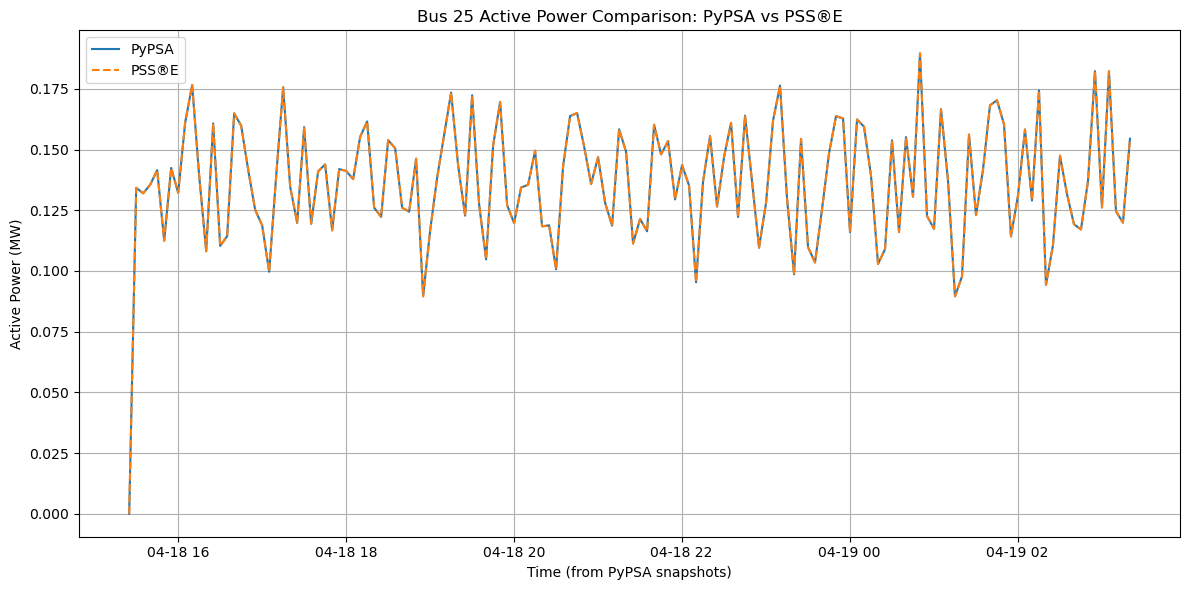

In [7]:
import matplotlib.pyplot as plt

# Set the bus to compare
bus = '25'  # PyPSA bus ID (string)
bus_id = int(bus)  # PSS®E bus ID (integer)

# System base from PSSE (in MVA)
sbase = 100 # 100 MVA

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
n_points = len(time_index)

# --- PyPSA ---
pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

# --- PSS/E ---
# Trim PSSE timesteps: drop -1
time_steps = sorted(t for t in wec_grid.psseObj.history.keys() if t >= 0)
p_psse  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]
#p_psse_MW  = [p * sbase for p in p_psse_pu]  # Convert from pu to MW

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p,     label='PyPSA', color='tab:blue')
plt.plot(time_index, p_psse,   label='PSS®E', color='tab:orange', linestyle='--')

# --- Decorations ---
plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Active Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

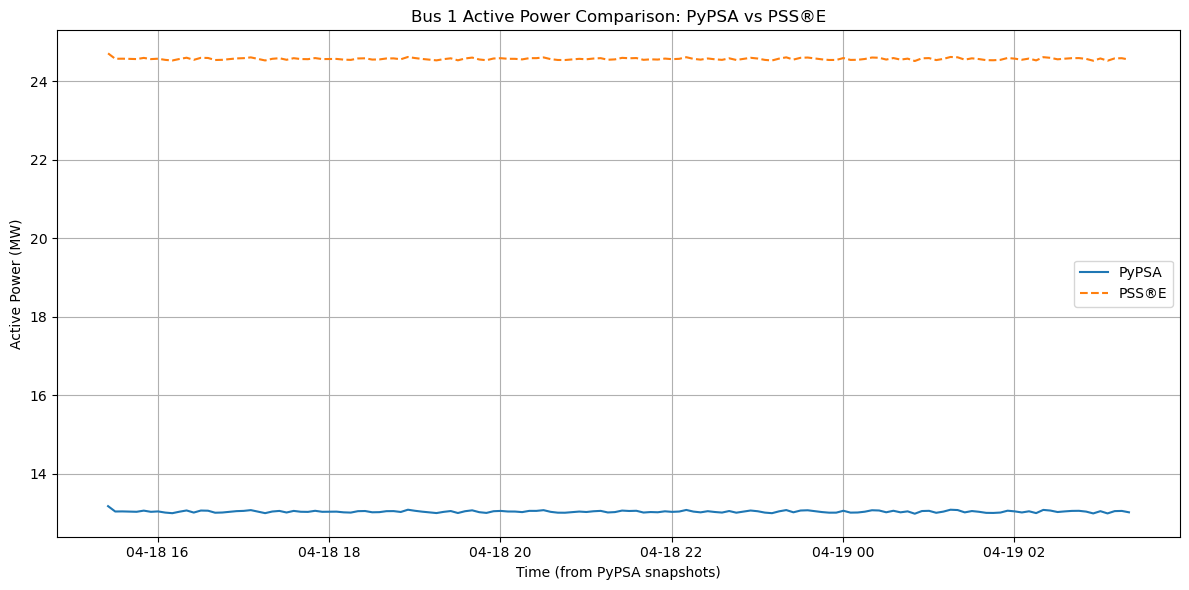

In [8]:
import matplotlib.pyplot as plt

# Set the bus to compare
bus = '1'  # PyPSA bus ID (string)
bus_id = int(bus)  # PSS®E bus ID (integer)

# System base from PSSE (in MVA)
sbase = 100 # 100 MVA

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
n_points = len(time_index)

# --- PyPSA ---
pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

# --- PSS/E ---
# Trim PSSE timesteps: drop -1
time_steps = sorted(t for t in wec_grid.psseObj.history.keys() if t >= 0)
p_psse_pu  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]
p_psse_MW  = p_psse_pu  # Convert from pu to MW

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p,     label='PyPSA', color='tab:blue')
plt.plot(time_index, p_psse_MW,   label='PSS®E', color='tab:orange', linestyle='--')

# --- Decorations ---
plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Active Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

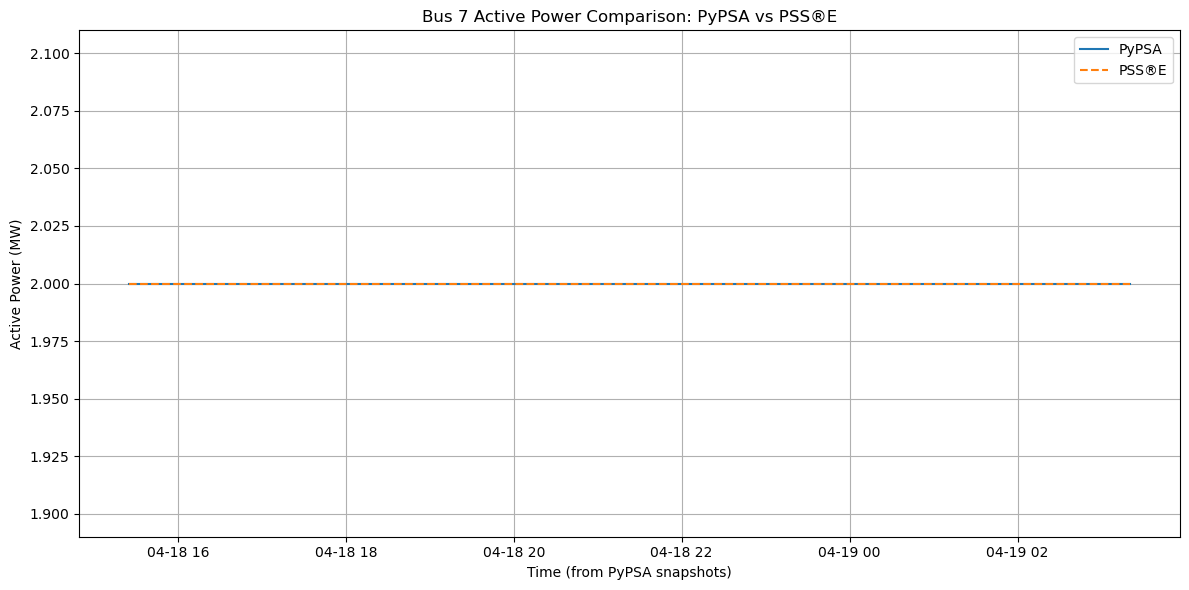

In [9]:
import matplotlib.pyplot as plt

# Set the bus to compare
bus = '7'  # PyPSA bus ID (string)
bus_id = int(bus)  # PSS®E bus ID (integer)

# System base from PSSE (in MVA)
sbase = 100 # 100 MVA

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
n_points = len(time_index)

# --- PyPSA ---
pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

# --- PSS/E ---
# Trim PSSE timesteps: drop -1
time_steps = sorted(t for t in wec_grid.psseObj.history.keys() if t >= 0)
p_psse_pu  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]
p_psse_MW  = p_psse_pu  # Convert from pu to MW

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p,     label='PyPSA', color='tab:blue')
plt.plot(time_index, p_psse_MW,   label='PSS®E', color='tab:orange', linestyle='--')

# --- Decorations ---
plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Active Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [54]:
df = wec_grid.psseObj.history[450]
row = df[df["BUS_ID"] == 1]
row

BUS_ID    Bus   BASE   PU  ANGLE  MISMATCH  Type      P Gen      Q Gen  \
0       1  BUS 1  138.0  1.0    0.0  0.000003     3  24.212395  65.548119   

   P Load  Q Load          P          Q        ΔP        ΔQ   M_Angle  \
0     NaN     NaN  24.212395  65.548119  0.000001  0.000003  0.000003   

      M_Mag  
0  1.107149

In [52]:
wec_grid.pypsaObj.pypsa_object.buses_t.p

Bus                                 1          2          3          4  \
snapshot                                                                 
2025-04-18 14:41:32.900828  13.178339 -30.000000 -90.000000 -74.000000   
2025-04-18 14:46:32.900828  16.033867 -30.074079 -89.880945 -74.337450   
2025-04-18 14:51:32.900828  14.021019 -30.295594 -90.115817 -74.275112   
2025-04-18 14:56:32.900828  14.417968 -30.095923 -89.835357 -74.141748   
2025-04-18 15:01:32.900828  14.339250 -30.030161 -90.261325 -73.980685   
...                               ...        ...        ...        ...   
2025-04-19 02:16:32.900828  16.711896 -30.094479 -90.491597 -74.076019   
2025-04-19 02:21:32.900828  16.641417 -30.331604 -90.319914 -74.026543   
2025-04-19 02:26:32.900828  14.262397 -30.011067 -89.985678 -74.225208   
2025-04-19 02:31:32.900828  15.243733 -30.386020 -90.143146 -74.148851   
2025-04-19 02:36:32.900828  13.812640 -29.972017 -89.958182 -74.080785   

Bus                                 5          6         7          8  \
snapshot                                                                
2025-04-18 14:41:32.900828 -71.000000 -68.000000  2.000000 -85.000000   
2025-04-18 14:46:32.900828 -71.131618 -68.087048  1.936532 -84.856214   
2025-04-18 14:51:32.900828 -71.019988 -68.154674  1.802009 -84.848315   
2025-04-18 14:56:32.900828 -70.844551 -67.988509  1.912473 -84.670681   
2025-04-18 15:01:32.900828 -71.159248 -68.053528  1.903917 -85.171967   
...                               ...        ...       ...        ...   
2025-04-19 02:16:32.900828 -71.311343 -68.162209  1.966091 -84.948603   
2025-04-19 02:21:32.900828 -71.158321 -68.020352  1.742836 -85.354932   
2025-04-19 02:26:32.900828 -71.020088 -68.198727  2.083341 -84.953845   
2025-04-19 02:31:32.900828 -71.217967 -68.101922  1.887650 -85.141227   
2025-04-19 02:36:32.900828 -71.159484 -67.796666  1.806625 -84.968348   

Bus                                  9          10  ...          16   17  \
snapshot                                            ...                    
2025-04-18 14:41:32.900828 -175.000000 -100.000000  ...  145.000000  0.0   
2025-04-18 14:46:32.900828 -175.475234 -100.303706  ...  145.050537  0.0   
2025-04-18 14:51:32.900828 -174.665235  -99.575525  ...  144.928315  0.0   
2025-04-18 14:56:32.900828 -175.371279  -99.821387  ...  144.885813  0.0   
2025-04-18 15:01:32.900828 -174.824377 -100.238968  ...  144.401893  0.0   
...                                ...         ...  ...         ...  ...   
2025-04-19 02:16:32.900828 -175.494106 -100.179386  ...  144.655529  0.0   
2025-04-19 02:21:32.900828 -176.040301  -99.929100  ...  144.785170  0.0   
2025-04-19 02:26:32.900828 -175.295477  -99.937379  ...  144.702550  0.0   
2025-04-19 02:31:32.900828 -175.576150 -100.102610  ...  144.814510  0.0   
2025-04-19 02:36:32.900828 -174.941926  -99.922465  ...  144.701337  0.0   

Bus                                18         19         20     21     22  \
snapshot                                                                    
2025-04-18 14:41:32.900828 -18.000000 -90.000000 -65.000000  294.0  150.0   
2025-04-18 14:46:32.900828 -18.584176 -90.085214 -65.340586  294.0  150.0   
2025-04-18 14:51:32.900828 -18.117575 -90.062201 -64.937222  294.0  150.0   
2025-04-18 14:56:32.900828 -18.279339 -90.073762 -65.144124  294.0  150.0   
2025-04-18 15:01:32.900828 -18.146954 -90.022395 -64.954065  294.0  150.0   
...                               ...        ...        ...    ...    ...   
2025-04-19 02:16:32.900828 -18.120928 -90.187116 -65.221258  294.0  150.0   
2025-04-19 02:21:32.900828 -17.971156 -90.343777 -64.816989  294.0  150.0   
2025-04-19 02:26:32.900828 -18.654204 -89.770995 -65.225183  294.0  150.0   
2025-04-19 02:31:32.900828 -17.762335 -90.165689 -65.126744  294.0  150.0   
2025-04-19 02:36:32.900828 -17.948577 -89.959773 -65.208272  294.0  150.0   

Bus                            23   24        25  
snapshot                                     

In [25]:
time_steps = sorted(wec_grid.psseObj.history.keys())
time_steps

[-1,
 0.0,
 450.0,
 750.0,
 1050.0,
 1350.0,
 1650.0,
 1950.0,
 2250.0,
 2550.0,
 2850.0,
 3150.0,
 3450.0,
 3750.0,
 4050.0,
 4350.0,
 4650.0,
 4950.0,
 5250.0,
 5550.0,
 5850.0,
 6150.0,
 6450.0,
 6750.0,
 7050.0,
 7350.0,
 7650.0,
 7950.0,
 8250.0,
 8550.0,
 8850.0,
 9150.0,
 9450.0,
 9750.0,
 10050.0,
 10350.0,
 10650.0,
 10950.0,
 11250.0,
 11550.0,
 11850.0,
 12150.0,
 12450.0,
 12750.0,
 13050.0,
 13350.0,
 13650.0,
 13950.0,
 14250.0,
 14550.0,
 14850.0,
 15150.0,
 15450.0,
 15750.0,
 16050.0,
 16350.0,
 16650.0,
 16950.0,
 17250.0,
 17550.0,
 17850.0,
 18150.0,
 18450.0,
 18750.0,
 19050.0,
 19350.0,
 19650.0,
 19950.0,
 20250.0,
 20550.0,
 20850.0,
 21150.0,
 21450.0,
 21750.0,
 22050.0,
 22350.0,
 22650.0,
 22950.0,
 23250.0,
 23550.0,
 23850.0,
 24150.0,
 24450.0,
 24750.0,
 25050.0,
 25350.0,
 25650.0,
 25950.0,
 26250.0,
 26550.0,
 26850.0,
 27150.0,
 27450.0,
 27750.0,
 28050.0,
 28350.0,
 28650.0,
 28950.0,
 29250.0,
 29550.0,
 29850.0,
 30150.0,
 30450.0,
 30750.0,
 31

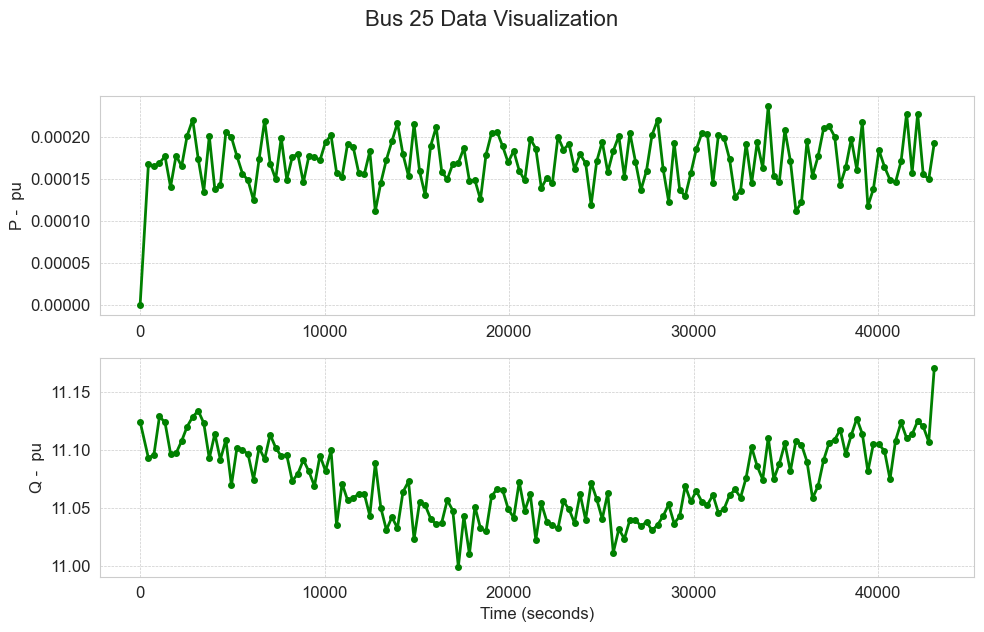

In [13]:
wec_grid.psseObj.plot_bus(25, time=[0, 43050.0])

<AxesSubplot:xlabel='snapshot', ylabel='MW'>

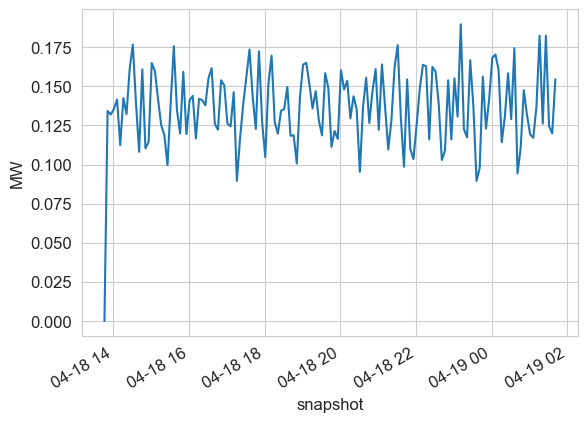

In [14]:
wec_grid.pypsaObj.pypsa_object.buses_t.p['25'].plot(ylabel="MW")

In [ ]:
wec_grid.psseObj.

In [3]:
from WecGrid import WecGrid
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid.initialize_psse("fnsl")

config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=1, from_bus=7, to_bus=25, mbase= 1.0, config=config) 
wec_grid.generate_load_curve()
wec_grid.psseObj.ac_injection(start=0, end=43050.0)

PSSE initialized with case file: IEEE_24_bus.RAW.
Adding WECs to PSS/E network
Bus 25 added successfully.
Plant data added successfully to bus 25.
Generator G1 added successfully to bus 25.
Branch from 7 to 25 added successfully.


TypeError: plot_bus() missing 1 required positional argument: 'time'

In [ ]:
from WecGrid import WecGrid
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")


In [ ]:
# Initalize PSSE and pyPSA!
wec_grid.initialize_psse("fnsl")
#wec_grid.initialize_pypsa("fnsl")



    Sets PSSE environment to latest minor version among installed versions of PSSE 35.
    Use psse35.set_minor(n) to set PSSE35 minor version (n) to use.
        Example, for PSSE 35.0.x, use this as: psse35.set_minor(0)

 PSS(R)E Xplore Version 35
 Copyright (c) 1976-2025
 Siemens Industry, Inc.,
 Power Technologies International                            (PTI)
 This program is a confidential  unpublished  work  created  and  first
 licensed in 1976.  It is a trade secret which is the property of  PTI.
 All use,  disclosure,  and/or reproduction not specifically authorized
 by  PTI  is prohibited.   This  program is protected  under  copyright
 laws  of  non-U.S.  countries  and  by  application  of  international
 treaties.  All  Rights  Reserved  Under  The  Copyright  Laws.


           SIEMENS POWER TECHNOLOGIES INTERNATIONAL

    50 BUS POWER SYSTEM SIMULATOR--PSS(R)E Xplore-35.3.2

             INITIATED ON FRI, APR 18 2025  12:45
PSSE initialized with case file: IEEE_24_bus.R

In [4]:

wec_grid.psseObj.dataframe


BUS_ID     Bus   BASE        PU     ANGLE      MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  1.192093e-05     3   35.930069   
1        2   BUS 2  138.0  0.997822  0.000181  0.000000e+00     2   67.000000   
2        3   BUS 3  138.0  0.863703  0.187725  1.192093e-05     1         NaN   
3        4   BUS 4  138.0  0.887014 -0.007247  6.664002e-06     1         NaN   
4        5   BUS 5  138.0  0.927217 -0.004004  0.000000e+00     1         NaN   
5        6   BUS 6  138.0  0.907952  0.006838  6.365779e-06     1         NaN   
6        7   BUS 7  138.0  0.796234 -0.010124  0.000000e+00     2   64.000000   
7        8   BUS 8  230.0  0.805368 -0.015157  1.343172e-06     1         NaN   
8        9   BUS 9  138.0  0.834940  0.087076  6.365779e-06     1         NaN   
9       10  BUS 10  138.0  0.881702  0.064990  2.980232e-06     1         NaN   
10      11  BUS 11  230.0  0.836073  0.220619  0.000000e+00     1         NaN   
11      12  BUS 12  230.0  0.839763  0.205660  2.980232e-06     1         NaN   
12      13  BUS 13  230.0  0.836927  0.269663  0.000000e+00     2  200.000000   
13      14  BUS 14  230.0  0.836423  0.327386  1.192093e-05     2    0.000000   
14      15  BUS 15  230.0  0.885209  0.579676  2.980232e-06     2  274.000000   
15      16  BUS 16  230.0  0.862146  0.472709  1.812804e-05     2  245.000000   
16      17  BUS 17  230.0  0.895736  0.559572  5.960464e-06     1         NaN   
17      18  BUS 18  230.0  0.901057  0.591654  0.000000e+00     2  144.000000   
18      19  BUS 19  230.0  0.851835  0.415460  7.450581e-07     1         NaN   
19      20  BUS 20  230.0  0.849352  0.389755  6.006850e-06     1         NaN   
20      21  BUS 21  230.0  0.911253  0.622349  2.402740e-05     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.654534  1.192093e-05     2  150.000000   
22      23  BUS 23  230.0  0.849713  0.385360  7.450581e-07     2  200.000000   
23      24  BUS 24  230.0  0.854969  0.433070  0.000000e+00     1         NaN   

         Q Gen  P Load     Q Load           P           Q        ΔP  \
0   180.488586     NaN        NaN   35.930069  180.488586  0.000000   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000000   
2          NaN    90.0  19.000000  -90.000000  -19.000000 -0.000012   
3          NaN    74.0  15.000001  -74.000000  -15.000001  0.000003   
4          NaN    71.0  14.000000  -71.000000  -14.000000  0.000000   
5          NaN    68.0  14.000000  -68.000000  -14.000000 -0.000002   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000000   
7          NaN    85.0  18.000000  -85.000000  -18.000000 -0.000001   
8          NaN   175.0  36.000000 -175.000000  -36.000000 -0.000006   
9          NaN   100.0  23.000000 -100.000000  -23.000000  0.000003   
10         NaN     NaN        NaN         NaN         NaN  0.000000   
11         NaN     NaN        NaN         NaN         NaN  0.000000   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000000   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000012   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000000   
15    0.000000   100.0  20.000000  145.000000  -20.000000 -0.000018   
16         NaN     NaN        NaN         NaN         NaN  0.000000   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000000   
18         NaN    90.0  18.000000  -90.000000  -18.000000  0.000000   
19         NaN    65.0  13.000000  -65.000000  -13.000000  0.000006   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000024   
21  199.455856     NaN        NaN  150.000000  199.455856  0.000000   
22    0.000000     NaN        NaN  200.000000    0.000000  0.000000   
23         NaN     NaN        NaN         NaN         NaN  0.000000   

              ΔQ       M_Angle     M_Mag  
0  -1.192093e-05  1.192093e-05 -1.570796  
1   0.000000e+00  0.000000e+00  0.000000  
2   0.000000e+00  1.192093e-05  3.141593  
3  -5.960464e-06  6.664002e-06

In [5]:
#wec_grid.pypsaObj.dataframe#

c:\users\alexb\research\wec-grid\WecGrid\PSSe\psse_wrapper.py:1134: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")


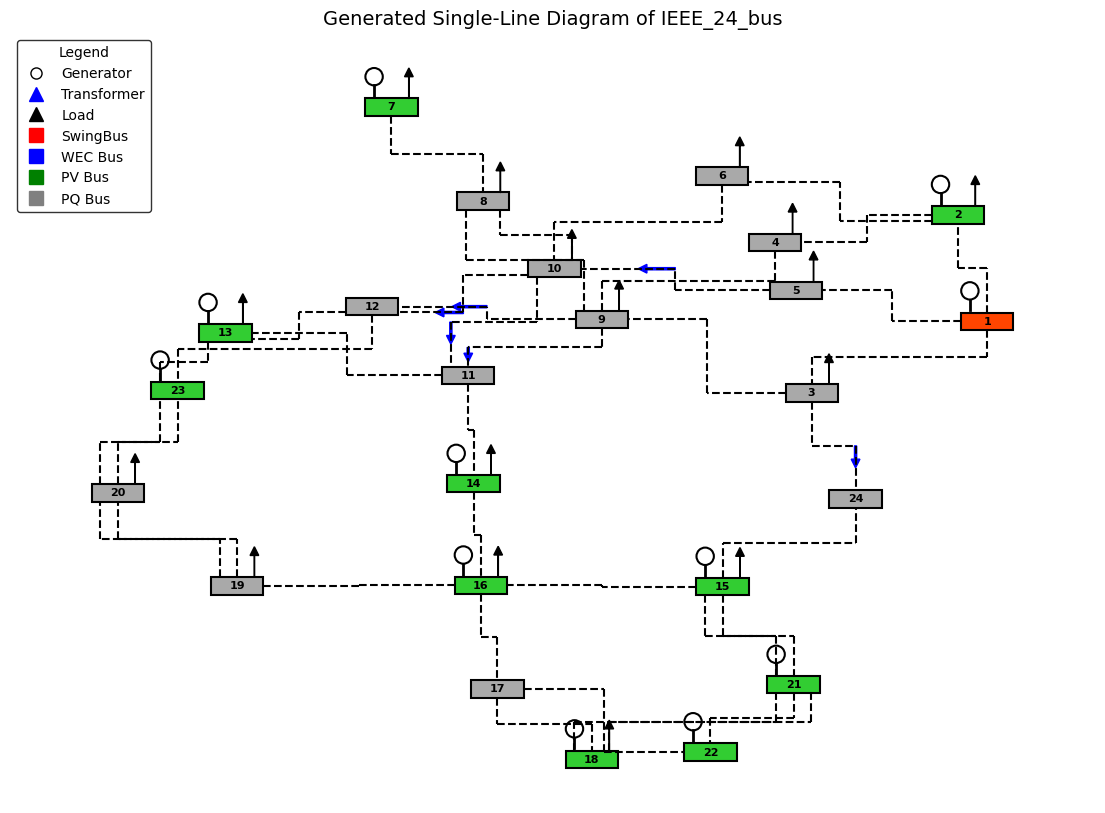

In [6]:
# Lets see what our grid looks like using the SLD generator for PSS/E. 
wec_grid.psseObj.sld()

In [7]:
# We can also visualize the grid using the standard Viz
wec_grid.psseObj.viz()

In [ ]:
# Now we can start adding WECs to our grid. We first need to create a WEC object. In this cell we're going to simulate a new wec simulation and create a new WEC object from that run. Because we initalized both PSSE and pyPSA, we can see that both grid networks are altered similarly.
config = {
    "simLength": 60 * 60 * 12,  # Simulation length of 12 hours
    "Tsample": 300,            # Sampling time of 5 minutes
    "waveHeight": 2.5,         # Wave height in meters
    "wavePeriod": 8,           # Wave period in seconds
}
wec_grid.create_wec(ID=60, model="RM3", farm_size=1, from_bus=7, to_bus=25, mbase= 1.0, config=config) 



Adding WECs to PSS/E network
Bus 25 added successfully.
Plant data added successfully to bus 25.
Generator G1 added successfully to bus 25.
Branch from 7 to 25 added successfully.


In [9]:
pgen= wec_grid.wecObj_list[0].dataframe.pg
pgen

0      0.000000
1      0.016780
2      0.016497
3      0.016940
4      0.017691
         ...   
139    0.015768
140    0.022782
141    0.015574
142    0.014986
143    0.019310
Name: pg, Length: 144, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


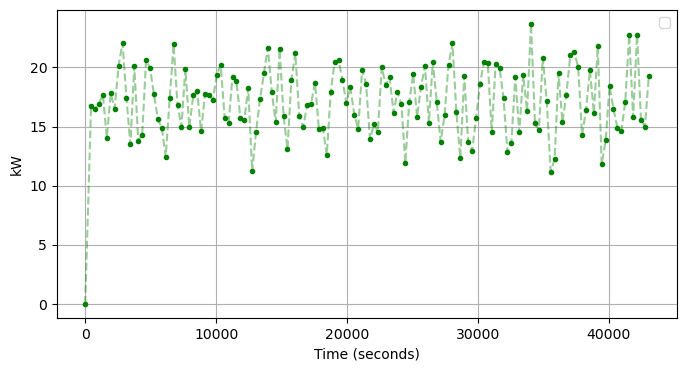

In [16]:
'''
    lets take a look at the raw WEC data, specifcally the Pgen or Active power generation.
'''

time_steps = wec_grid.wecObj_list[0].dataframe.time
pgen= wec_grid.wecObj_list[0].dataframe.pg

mbase =  1000
# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, pgen * mbase, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, pgen * mbase, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("kW")
plt.legend()
plt.grid(True)

c:\users\alexb\research\wec-grid\WecGrid\PSSe\psse_wrapper.py:1185: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([path[i][0], path[i+1][0]], [path[i][1], path[i+1][1]], 'k-', lw=1.5, linestyle="dashed")


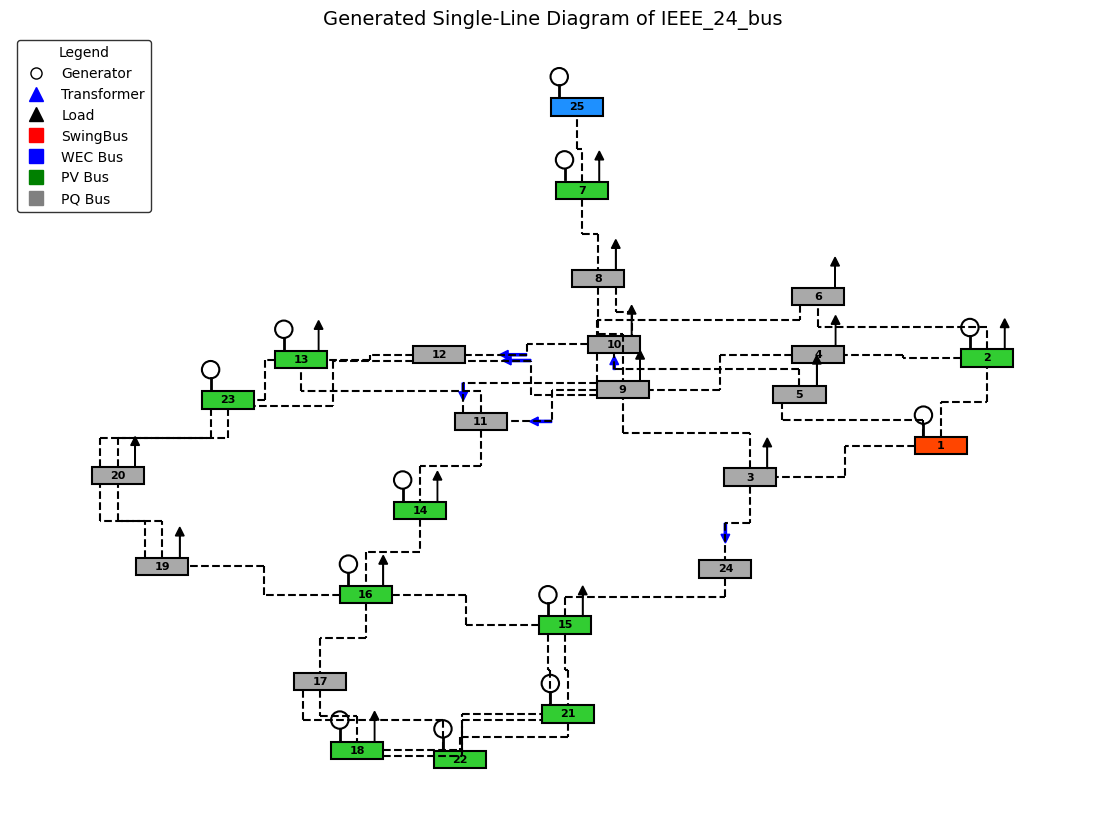

In [10]:
# we can re-run the SLD to see the new WEC added, 
wec_grid.psseObj.sld()

In [ ]:
wec_grid.generate_load_curve()

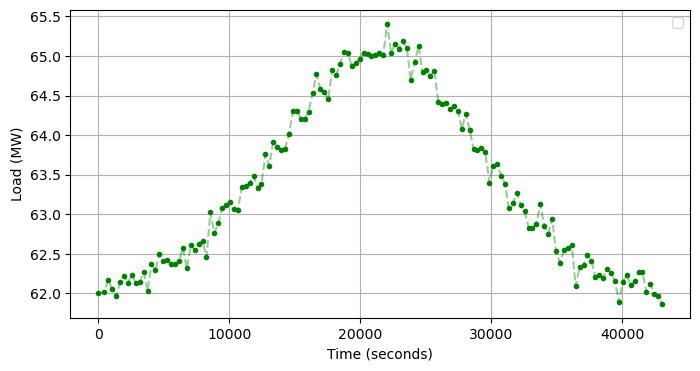

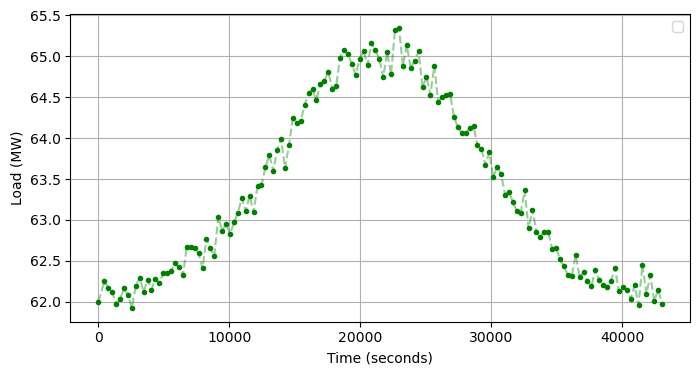

In [31]:
# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

# Extract time steps and load profile data
time_steps = wec_grid.pypsaObj.load_profiles.index.to_list()
bus_7_load = wec_grid.pypsaObj.load_profiles["L5"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [11]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0)

NameError: name 's' is not defined

In [16]:
wec_grid.psseObj.dataframe

BUS_ID     Bus   BASE        PU     ANGLE  MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  0.000000     3   35.638767   
1        2   BUS 2  138.0  0.997834  0.000177  0.000054     2   67.000000   
2        3   BUS 3  138.0  0.864422  0.187354  0.000575     1         NaN   
3        4   BUS 4  138.0  0.887619 -0.007276  0.000234     1         NaN   
4        5   BUS 5  138.0  0.927718 -0.004047  0.000179     1         NaN   
5        6   BUS 6  138.0  0.908844  0.006773  0.000538     1         NaN   
6        7   BUS 7  138.0  0.799291 -0.010542  0.001467     2   64.000000   
7        8   BUS 8  230.0  0.807617 -0.015306  0.003537     1         NaN   
8        9   BUS 9  138.0  0.836005  0.086838  0.001221     1         NaN   
9       10  BUS 10  138.0  0.882698  0.064780  0.000721     1         NaN   
10      11  BUS 11  230.0  0.837061  0.220086  0.000089     1         NaN   
11      12  BUS 12  230.0  0.840784  0.205153  0.000066     1         NaN   
12      13  BUS 13  230.0  0.837925  0.269019  0.000691     2  200.000000   
13      14  BUS 14  230.0  0.837303  0.326659  0.000155     2    0.000000   
14      15  BUS 15  230.0  0.885763  0.578627  0.000549     2  274.000000   
15      16  BUS 16  230.0  0.862874  0.471746  0.001258     2  245.000000   
16      17  BUS 17  230.0  0.896270  0.558525  0.000241     1         NaN   
17      18  BUS 18  230.0  0.901555  0.590582  0.000314     2  144.000000   
18      19  BUS 19  230.0  0.852647  0.414572  0.000350     1         NaN   
19      20  BUS 20  230.0  0.850226  0.388894  0.000358     1         NaN   
20      21  BUS 21  230.0  0.911712  0.621256  0.000552     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.653492  0.000049     2  150.000000   
22      23  BUS 23  230.0  0.850617  0.384497  0.001549     2  200.000000   
23      24  BUS 24  230.0  0.855638  0.432249  0.000275     1         NaN   
24      25  BUS 25  138.0  0.799291 -0.010542  0.001467     4    0.019310   

         Q Gen  P Load     Q Load           P           Q        ΔP        ΔQ  \
0   178.687912     NaN        NaN   35.638767  178.687912  0.000000  0.000000   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000054  0.000000   
2          NaN    90.0  19.000000  -90.000000  -19.000000 -0.000548 -0.000173   
3          NaN    74.0  15.000001  -74.000000  -15.000001 -0.000229  0.000048   
4          NaN    71.0  14.000000  -71.000000  -14.000000 -0.000174  0.000042   
5          NaN    68.0  14.000000  -68.000000  -14.000000 -0.000472  0.000259   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000934 -0.001131   
7          NaN    85.0  18.000000  -85.000000  -18.000000 -0.003519  0.000362   
8          NaN   175.0  36.000000 -175.000000  -36.000000 -0.001204 -0.000203   
9          NaN   100.0  23.000000 -100.000000  -23.000000 -0.000572 -0.000438   
10         NaN     NaN        NaN         NaN         NaN  0.000072  0.000054   
11         NaN     NaN        NaN         NaN         NaN  0.000000 -0.000066   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000685 -0.000083   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000155  0.000010   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000548  0.000018   
15    0.000000   100.0  20.000000  145.000000  -20.000000  0.001210 -0.000343   
16         NaN     NaN        NaN         NaN         NaN  0.000238 -0.000036   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000060  0.000308   
18         NaN    90.0  18.000000  -90.000000  -18.000000 -0.000334  0.000106   
19         NaN    65.0  13.000000  -65.000000  -13.000000 -0.000358  0.000009   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000358 -0.000420   
21  198.274963     NaN        NaN  150.000000  198.274963 -0.000048 -0.000012   
22    0.000000     NaN        NaN  200.000000    0.000000  0.001532 -0.000229   
23         NaN     NaN        NaN         NaN         NaN

In [28]:
wec_grid.pypsaObj.ac_injection()

INFO:pypsa.pf:Performing non-linear load-flow on AC sub-network SubNetwork 0 for snapshots DatetimeIndex(['2025-04-17 15:57:02.645104', '2025-04-17 16:02:02.645104',
               '2025-04-17 16:07:02.645104', '2025-04-17 16:12:02.645104',
               '2025-04-17 16:17:02.645104', '2025-04-17 16:22:02.645104',
               '2025-04-17 16:27:02.645104', '2025-04-17 16:32:02.645104',
               '2025-04-17 16:37:02.645104', '2025-04-17 16:42:02.645104',
               ...
               '2025-04-18 03:07:02.645104', '2025-04-18 03:12:02.645104',
               '2025-04-18 03:17:02.645104', '2025-04-18 03:22:02.645104',
               '2025-04-18 03:27:02.645104', '2025-04-18 03:32:02.645104',
               '2025-04-18 03:37:02.645104', '2025-04-18 03:42:02.645104',
               '2025-04-18 03:47:02.645104', '2025-04-18 03:52:02.645104'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')
INFO:pypsa.pf:Newton-Raphson solved in 4 iterations with erro

In [29]:
'''
    Now need to review the simulation results and compare
'''

'\n    Now need to review the simulation results and compare\n'

In [18]:
wec_grid.psseObj.dataframe

BUS_ID     Bus   BASE        PU     ANGLE  MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  0.000012     3   35.659893   
1        2   BUS 2  138.0  0.997834  0.000177  0.000061     2   67.000000   
2        3   BUS 3  138.0  0.864417  0.187346  0.000567     1         NaN   
3        4   BUS 4  138.0  0.887615 -0.007284  0.000235     1         NaN   
4        5   BUS 5  138.0  0.927715 -0.004053  0.000181     1         NaN   
5        6   BUS 6  138.0  0.908839  0.006763  0.000537     1         NaN   
6        7   BUS 7  138.0  0.799272 -0.010598  0.001467     2   64.000000   
7        8   BUS 8  230.0  0.807602 -0.015344  0.003541     1         NaN   
8        9   BUS 9  138.0  0.835997  0.086825  0.001224     1         NaN   
9       10  BUS 10  138.0  0.882691  0.064768  0.000720     1         NaN   
10      11  BUS 11  230.0  0.837054  0.220076  0.000080     1         NaN   
11      12  BUS 12  230.0  0.840777  0.205143  0.000064     1         NaN   
12      13  BUS 13  230.0  0.837918  0.269009  0.000696     2  200.000000   
13      14  BUS 14  230.0  0.837296  0.326650  0.000155     2    0.000000   
14      15  BUS 15  230.0  0.885760  0.578622  0.000530     2  274.000000   
15      16  BUS 16  230.0  0.862868  0.471739  0.001246     2  245.000000   
16      17  BUS 17  230.0  0.896267  0.558519  0.000264     1         NaN   
17      18  BUS 18  230.0  0.901551  0.590577  0.000061     2  144.000000   
18      19  BUS 19  230.0  0.852641  0.414565  0.000350     1         NaN   
19      20  BUS 20  230.0  0.850220  0.388887  0.000370     1         NaN   
20      21  BUS 21  230.0  0.911709  0.621251  0.000483     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.653487  0.000061     2  150.000000   
22      23  BUS 23  230.0  0.850610  0.384489  0.001552     2  200.000000   
23      24  BUS 24  230.0  0.855634  0.432243  0.000275     1         NaN   
24      25  BUS 25  138.0  0.799272 -0.010598  0.001468     4    0.000000   

         Q Gen  P Load     Q Load           P           Q        ΔP        ΔQ  \
0   178.693695     NaN        NaN   35.659893  178.693695  0.000003  0.000012   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000060 -0.000012   
2          NaN    90.0  19.000000  -90.000000  -19.000000 -0.000542 -0.000167   
3          NaN    74.0  15.000001  -74.000000  -15.000001 -0.000231  0.000042   
4          NaN    71.0  14.000000  -71.000000  -14.000000 -0.000174  0.000048   
5          NaN    68.0  14.000000  -68.000000  -14.000000 -0.000474  0.000253   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000935 -0.001131   
7          NaN    85.0  18.000000  -85.000000  -18.000000 -0.003523  0.000361   
8          NaN   175.0  36.000000 -175.000000  -36.000000 -0.001207 -0.000202   
9          NaN   100.0  23.000000 -100.000000  -23.000000 -0.000566 -0.000444   
10         NaN     NaN        NaN         NaN         NaN  0.000060  0.000054   
11         NaN     NaN        NaN         NaN         NaN -0.000012 -0.000063   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000691 -0.000079   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000155  0.000010   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000501 -0.000173   
15    0.000000   100.0  20.000000  145.000000  -20.000000  0.001201 -0.000331   
16         NaN     NaN        NaN         NaN         NaN  0.000262 -0.000030   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000000 -0.000061   
18         NaN    90.0  18.000000  -90.000000  -18.000000 -0.000334  0.000106   
19         NaN    65.0  13.000000  -65.000000  -13.000000 -0.000370  0.000009   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000429  0.000221   
21  198.283142     NaN        NaN  150.000000  198.283142 -0.000060 -0.000012   
22    0.000000     NaN        NaN  200.000000    0.000000  0.001535 -0.000229   
23         NaN     NaN        NaN         NaN         NaN

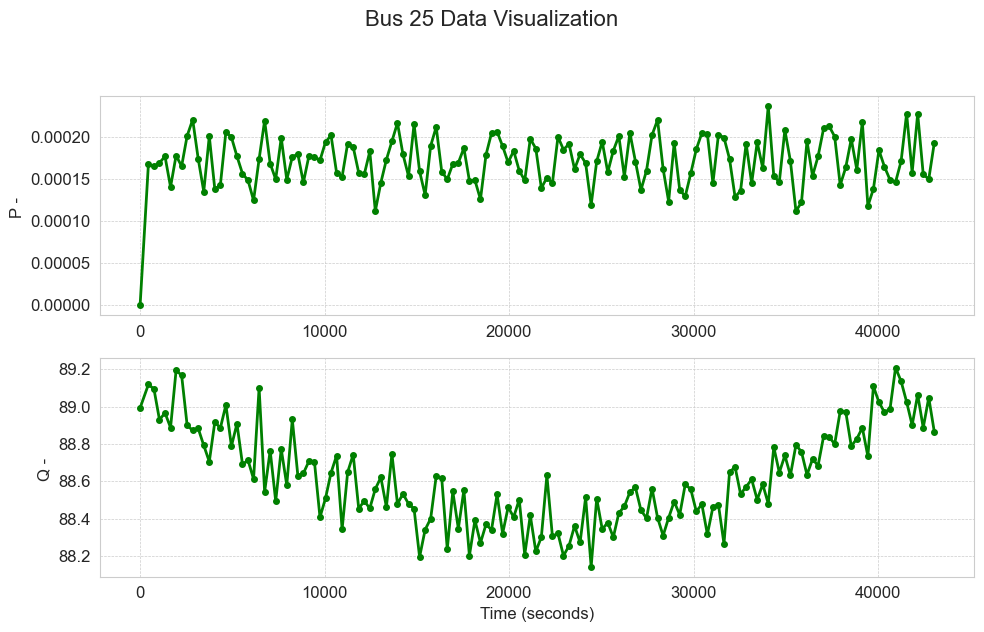

In [10]:
wec_grid.psseObj.plot_bus(25, time=[0, 43050.0])

In [19]:
def plot_bus_local(wec_grid_obj, var, bus):
    # Set the bus to compare

    # Get aligned time index from PyPSA
    #time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
    n_points = len(time_index)

    # # --- PyPSA ---
    # pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

    # --- PSS/E ---
    bus_id = int(bus)  # PSS/E uses int IDs
    time_steps = sorted(wec_grid.psseObj.history.keys())
    p_psse  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, var] for t in time_steps[:n_points]]

    # --- Plotting ---
    plt.figure(figsize=(12, 6))

    #plt.plot(time_index, pypsa_p,  label='PyPSA',     color='tab:blue')
    plt.plot(time_index, p_psse,   label='PSS®E',     color='tab:orange')

    # --- Decorations ---
    plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E")
    plt.xlabel("Time (from PyPSA snapshots)")
    plt.ylabel("Power (MW) ? ")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [20]:
print(plot_bus_local(wec_grid, "P", '1'))
print(plot_bus_local(wec_grid, "P", '7'))
print(plot_bus_local(wec_grid, "P", '25'))

NameError: name 'time_index' is not defined

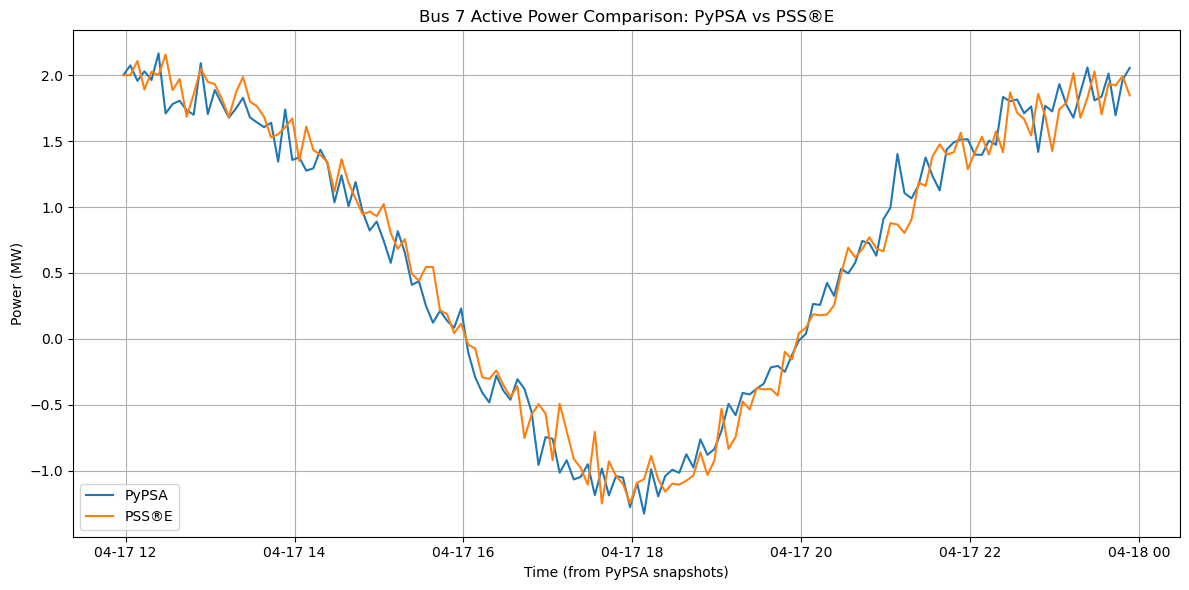

In [19]:
import matplotlib.pyplot as plt

# Set the bus to compare
bus = '7'  # must be a string for PyPSA, integer will be converted for PSS/E

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
n_points = len(time_index)

# --- PyPSA ---
pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

# --- PSS/E ---
bus_id = int(bus)  # PSS/E uses int IDs
time_steps = sorted(wec_grid.psseObj.history.keys())
p_psse  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p,  label='PyPSA',     color='tab:blue')
plt.plot(time_index, p_psse,   label='PSS®E',     color='tab:orange')

# --- Decorations ---
plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


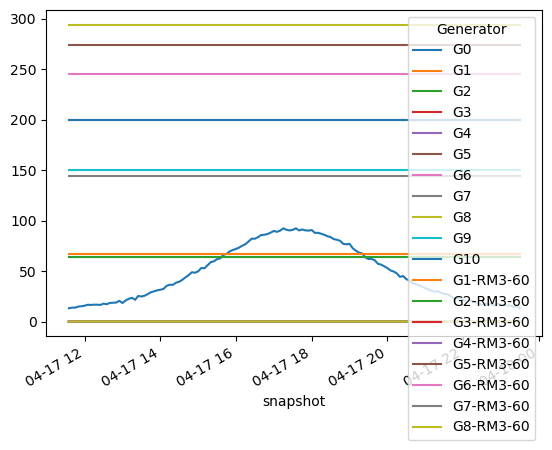

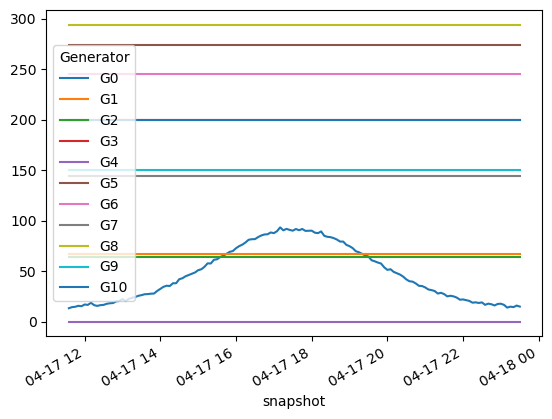

In [17]:
'''
    Review the pyPSA generator results
    
    notice the 1st plot has the addiontal generator from the WEC, while the 2nd plot does not.
    Not much change in the other generators responses visually
'''
print(wec_grid.pypsaObj.pypsa_object.generators_t.p.plot())
print(wec_grid_1.pypsaObj.pypsa_object.generators_t.p.plot())

<AxesSubplot:xlabel='snapshot'>

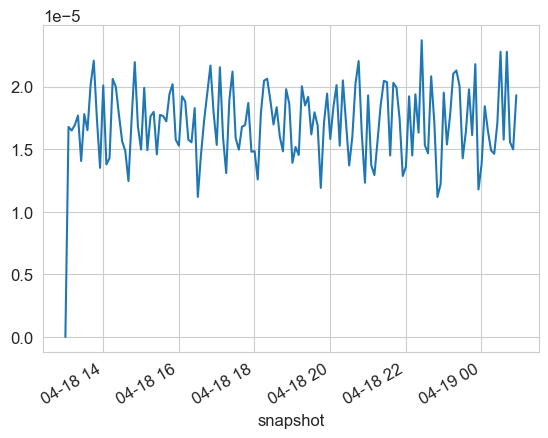

In [14]:
wec_grid.pypsaObj.pypsa_object.buses_t.p['25'].plot()

<AxesSubplot:xlabel='snapshot'>

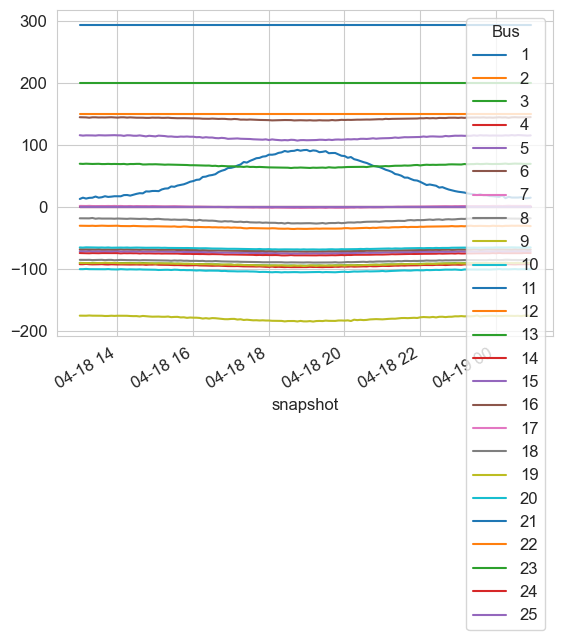

In [15]:
wec_grid.pypsaObj.pypsa_object.buses_t.p.plot()

In [24]:
wec_grid.pypsaObj.pypsa_object.buses

Pd    Qd   Gs     Bs  area  v_mag_pu_set  v_ang_set  v_nom  zone  \
Bus                                                                        
1      0.0   0.0  0.0  120.0   1.0       1.00000     0.0000  138.0   1.0   
2     97.0  20.0  0.0    0.0   1.0       1.00000     0.0102  138.0   1.0   
3     90.0  19.0  0.0    0.0   1.0       0.86395    10.7472  138.0   1.0   
4     74.0  15.0  0.0    0.0   1.0       0.88721    -0.4167  138.0   1.0   
5     71.0  14.0  0.0    0.0   1.0       0.92693    -0.2237  138.0   1.0   
6     68.0  14.0  0.0  100.0   1.0       0.90837     0.3902  138.0   1.0   
7     62.0  13.0  0.0    0.0   1.0       1.00000    -0.5811  138.0   1.0   
8     85.0  18.0  0.0    0.0   1.0       0.80581    -0.8692  230.0   1.0   
9    175.0  36.0  0.0    0.0   1.0       0.83528     4.9829  138.0   1.0   
10   100.0  23.0  0.0    0.0   1.0       0.88216     3.7178  138.0   1.0   
11     0.0   0.0  0.0    0.0   1.0       0.83645    12.6275  230.0   1.0   
12     0.0   0.0  0.0    0.0   1.0       0.84016    11.7711  230.0   1.0   
13   130.0  27.0  0.0    0.0   1.0       1.00000    15.4352  230.0   1.0   
14    92.0  20.0  0.0    0.0   1.0       1.00000    18.7410  230.0   1.0   
15   158.0  32.0  0.0    0.0   1.0       1.00000    33.1896  230.0   1.0   
16   100.0  20.0  0.0    0.0   1.0       1.00000    27.0625  230.0   1.0   
17     0.0   0.0  0.0    0.0   1.0       0.89595    32.0375  230.0   1.0   
18   162.0  34.0  0.0    0.0   1.0       1.00000    33.8753  230.0   1.0   
19    90.0  18.0  0.0    0.0   1.0       0.85215    23.7833  230.0   1.0   
20    65.0  13.0  0.0    0.0   1.0       0.84969    22.3112  230.0   1.0   
21     0.0   0.0  0.0    0.0   1.0       1.00000    35.6336  230.0   1.0   
22     0.0   0.0  0.0    0.0   1.0       1.00000    37.4784  230.0   1.0   
23     0.0   0.0  0.0    0.0   1.0       1.00000    22.0594  230.0   1.0   
24     0.0   0.0  0.0    0.0   1.0       0.85521    24.7952  230.0   1.0   
25     NaN   NaN  NaN    NaN   NaN       1.00000        NaN  138.0   NaN   

     v_mag_pu_max  v_mag_pu_min control type    x    y carrier  unit  \
Bus                                                                    
1            1.10          0.90   Slack       0.0  0.0      AC  None   
2            1.10          0.90      PV       0.0  0.0      AC  None   
3            1.10          0.90      PQ       0.0  0.0      AC  None   
4            1.10          0.90      PQ       0.0  0.0      AC  None   
5            1.10          0.90      PQ       0.0  0.0      AC  None   
6            1.10          0.90      PQ       0.0  0.0      AC  None   
7            1.10          0.90      PV       0.0  0.0      AC  None   
8            1.10          0.90      PQ       0.0  0.0      AC  None   
9            1.10          0.90      PQ       0.0  0.0      AC  None   
10           1.10          0.90      PQ       0.0  0.0      AC  None   
11           1.10          0.90      PQ       0.0  0.0      AC  None   
12           1.10          0.90      PQ       0.0  0.0      AC  None   
13           1.10          0.90      PV       0.0  0.0      AC  None   
14           1.10          0.90      PV       0.0  0.0      AC  None   
15           1.10          0.90      PV       0.0  0.0      AC  None   
16           1.10          0.90      PV       0.0  0.0      AC  None   
17           1.10          0.90      PQ       0.0  0.0      AC  None   
18           1.10          0.90      PV       0.0  0.0      AC  None   
19           1.10          0.90      PQ       0.0  0.0      AC  None   
20           1.10          0.90      PQ       0.0  0.0      AC  None   
21           1.10          0.90      PV       0.0  0.0      AC  None   
22           1.10          0.90      PV       0.0  0.0      AC  None   
23           1.10          0.90      PV       0.0  0.0      AC  None   
24           1.10          0.90      PQ       0.0  0.0      AC  None   
25           1.05          0.95      PV       0.0  0.0      AC  None   

    sub_ne

AxesSubplot(0.125,0.2;0.775x0.68)
AxesSubplot(0.125,0.2;0.775x0.68)


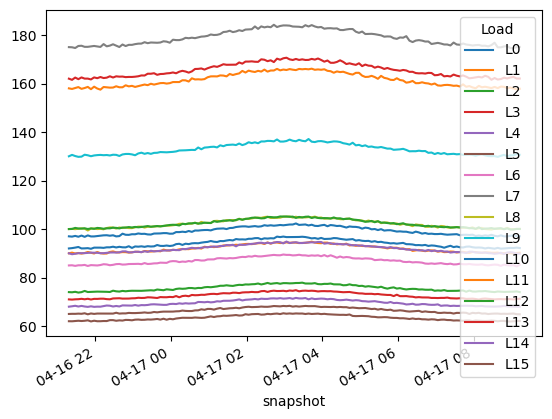

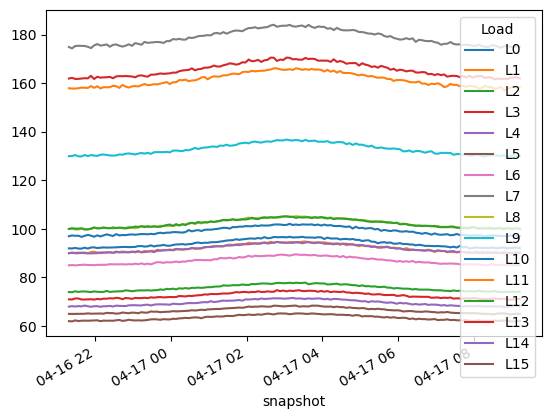

In [ ]:
'''
    should be exactly the same
'''
print(wec_grid.pypsaObj.pypsa_objecta.loads_t.p.plot())
print(wec_grid_1.pypsaObj.pypsa_object.loads_t.p.plot())

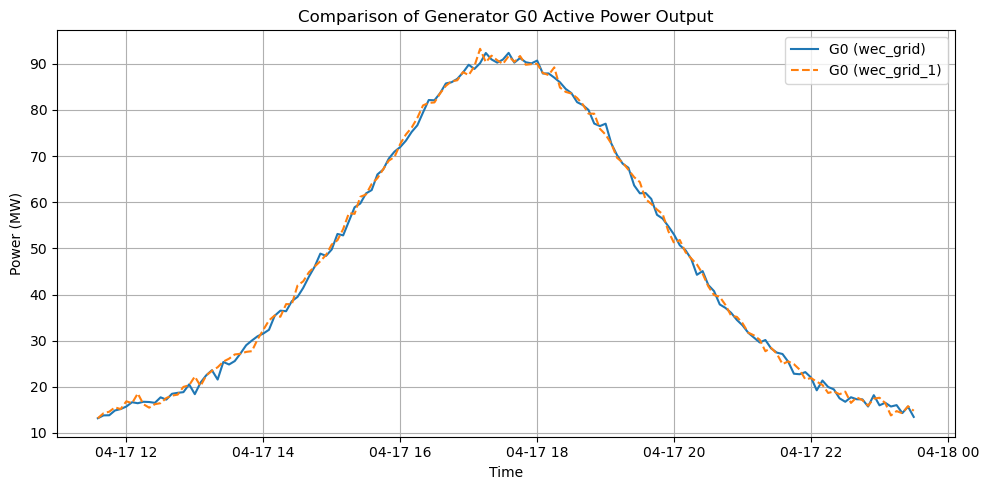

In [18]:
import matplotlib.pyplot as plt

# Extract the series
g0_series = wec_grid.pypsaObj.pypsa_object.generators_t.p['G0']
g0_series_1 = wec_grid_1.pypsaObj.pypsa_object.generators_t.p['G0']

# Plot both
plt.figure(figsize=(10, 5))
plt.plot(g0_series.index, g0_series.values, label='G0 (wec_grid)', color='tab:blue')
plt.plot(g0_series_1.index, g0_series_1.values, label='G0 (wec_grid_1)', color='tab:orange', linestyle='--')

# Labels, title, legend, grid
plt.title("Comparison of Generator G0 Active Power Output")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (144,) and (145,)

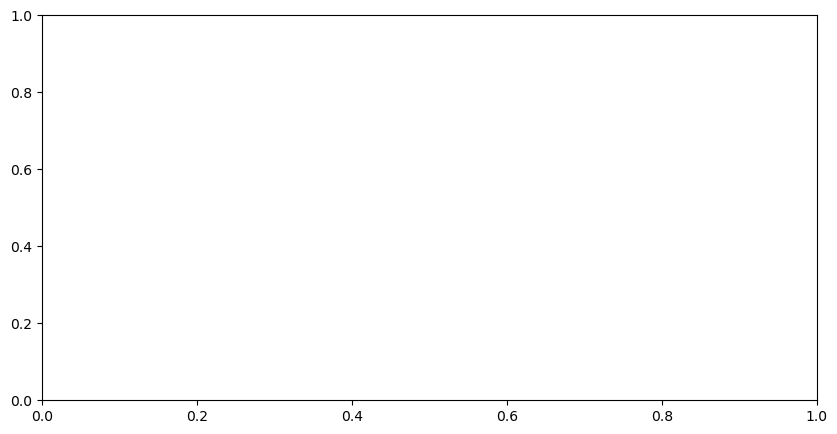

In [ ]:
# '''
# pyPSA comparison of bus 1 with and without the WEC integration
# '''
# # Extract the series
# bus_series = wec_grid.pypsaObj.pypsa_object.buses_t.p['1']
# bus_series_1 = wec_grid_1.pypsaObj.pypsa_object.buses_t.p['1']

# # Plot both
# plt.figure(figsize=(10, 5))
# plt.plot(bus_series.index, bus_series.values, label=' (wec_grid)', color='tab:blue')
# plt.plot(bus_series_1.index, bus_series_1.values, label='(wec_grid_1)', color='tab:orange', linestyle='--')

# # Labels, title, legend, grid
# plt.title("Comparison of Bus 1 Active Power")
# plt.xlabel("Time")
# plt.ylabel("Power (MW)")
# plt.grid(True)
# plt.legend()
# plt.tight_layout()
# plt.show()

'''
    PSS/E comparison of bus 1 with and without the WEC integration
'''
bus_id = 25
time = wec_grid.psseObj.history.keys() 
p = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

#p_1 = [wec_grid_1.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

import matplotlib.pyplot as plt

# Convert time to list in case it's not already indexable
time_list = list(time)
time_list = time_list[1:]

plt.figure(figsize=(10, 5))

# Plot both series
plt.plot(time_list, p, label="PSS®E (wec_grid)", color="tab:blue")
#plt.plot(time_list, p_1, label="PSS®E(wec_grid_1)", color="tab:orange", linestyle="--")

# Labeling
plt.title("PSS®E Active Power at Bus {}".format(bus_id))
plt.xlabel("Time")
plt.ylabel("Power")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
p = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]
p

NameError: name 'time_steps' is not defined

In [22]:
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
time_index

DatetimeIndex(['2025-04-17 11:35:06.588946', '2025-04-17 11:40:06.588946',
               '2025-04-17 11:45:06.588946', '2025-04-17 11:50:06.588946',
               '2025-04-17 11:55:06.588946', '2025-04-17 12:00:06.588946',
               '2025-04-17 12:05:06.588946', '2025-04-17 12:10:06.588946',
               '2025-04-17 12:15:06.588946', '2025-04-17 12:20:06.588946',
               ...
               '2025-04-17 22:45:06.588946', '2025-04-17 22:50:06.588946',
               '2025-04-17 22:55:06.588946', '2025-04-17 23:00:06.588946',
               '2025-04-17 23:05:06.588946', '2025-04-17 23:10:06.588946',
               '2025-04-17 23:15:06.588946', '2025-04-17 23:20:06.588946',
               '2025-04-17 23:25:06.588946', '2025-04-17 23:30:06.588946'],
              dtype='datetime64[ns]', name='snapshot', length=144, freq='5T')

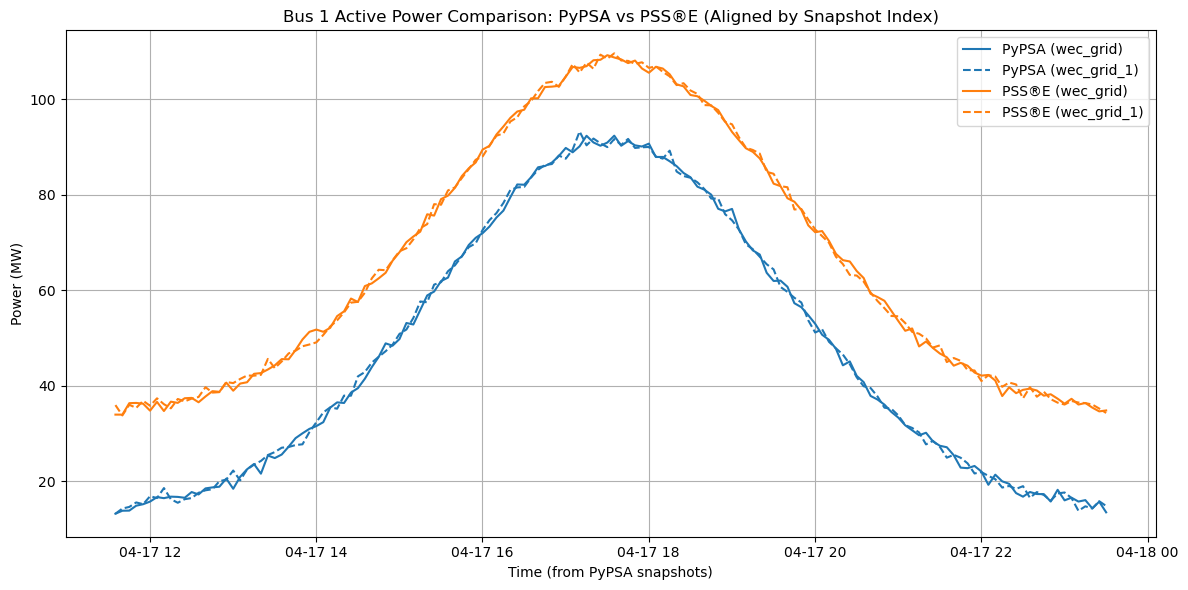

In [23]:
import matplotlib.pyplot as plt

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index

# PSS/E power data (already ordered, we just slice to match pypsa length)
n_points = len(time_index)
p_psse = p[:n_points]
p1_psse = p_1[:n_points]

# PyPSA power data
pypsa_p = wec_grid.pypsaObj.pypsa_object.buses_t.p['1'][:n_points]
pypsa_p1 = wec_grid_1.pypsaObj.pypsa_object.buses_t.p['1'][:n_points]

# Plot all four
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p, label='PyPSA (wec_grid)', color='tab:blue')
plt.plot(time_index, pypsa_p1, label='PyPSA (wec_grid_1)', color='tab:blue', linestyle='--')
plt.plot(time_index, p_psse, label='PSS®E (wec_grid)', color='tab:orange')
plt.plot(time_index, p1_psse, label='PSS®E (wec_grid_1)', color='tab:orange', linestyle='--')

# Beautify
plt.title("Bus 1 Active Power Comparison: PyPSA vs PSS®E (Aligned by Snapshot Index)")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

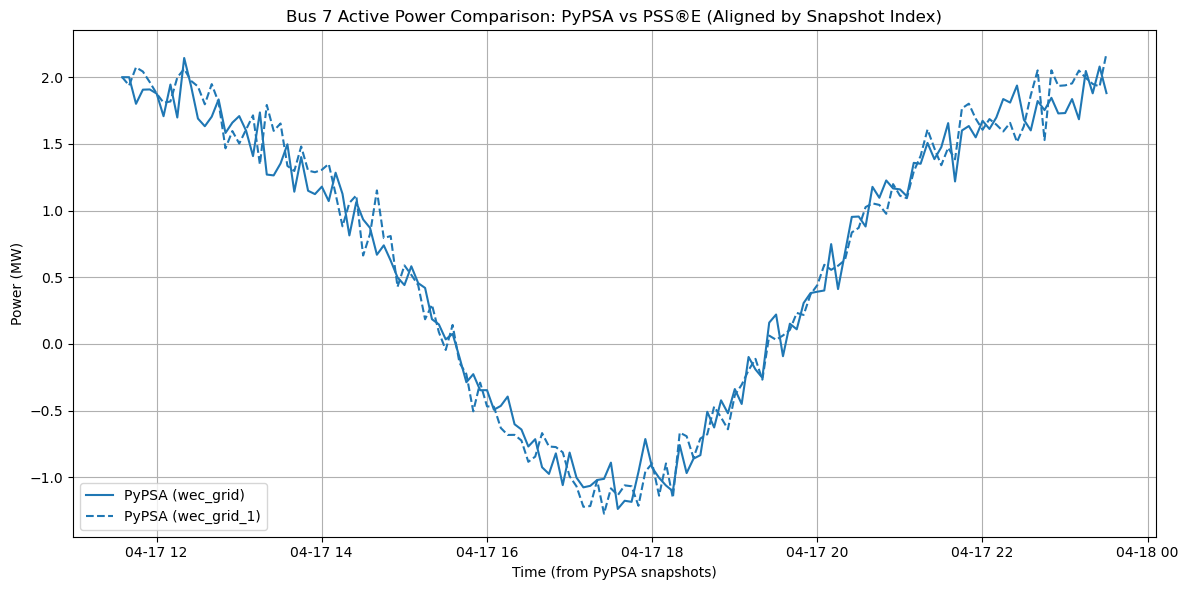

In [ ]:
import matplotlib.pyplot as plt

# Set the bus to compare
bus = '7'  # must be a string for PyPSA, integer will be converted for PSS/E

# Get aligned time index from PyPSA
time_index = wec_grid.pypsaObj.pypsa_object.buses_t.p.index
n_points = len(time_index)

# --- PyPSA ---
pypsa_p  = wec_grid.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]
pypsa_p1 = wec_grid_1.pypsaObj.pypsa_object.buses_t.p[bus][:n_points]

# --- PSS/E ---
bus_id = int(bus)  # PSS/E uses int IDs
time_steps = sorted(wec_grid.psseObj.history.keys())
p_psse  = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]
p1_psse = [wec_grid_1.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps[:n_points]]

# --- Plotting ---
plt.figure(figsize=(12, 6))

plt.plot(time_index, pypsa_p,  label='PyPSA (wec_grid)',     color='tab:blue')
plt.plot(time_index, pypsa_p1, label='PyPSA (wec_grid_1)',   color='tab:blue', linestyle='--')
plt.plot(time_index, p_psse,   label='PSS®E (wec_grid)',     color='tab:orange')
plt.plot(time_index, p1_psse,  label='PSS®E (wec_grid_1)',   color='tab:orange', linestyle='--')

# --- Decorations ---
plt.title(f"Bus {bus} Active Power Comparison: PyPSA vs PSS®E (Aligned by Snapshot Index)")
plt.xlabel("Time (from PyPSA snapshots)")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

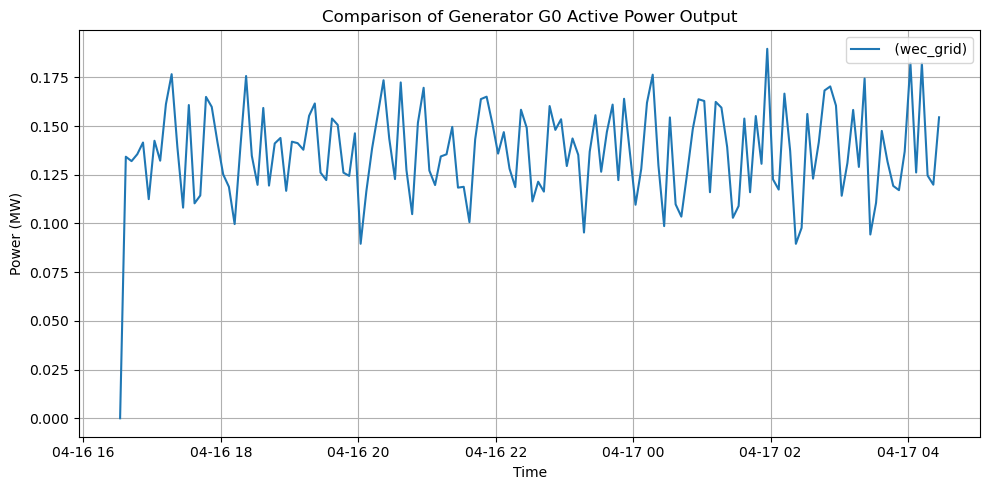

In [34]:
# Extract the series
bus_series = wec_grid.pypsaObj.pypsa_object.buses_t.p['25']


# Plot both
plt.figure(figsize=(10, 5))
plt.plot(bus_series.index, bus_series.values, label=' (wec_grid)', color='tab:blue')

# Labels, title, legend, grid
plt.title("Comparison of Generator G0 Active Power Output")
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
wec_grid.pypsaObj.pypsa_object.buses

Pd    Qd   Gs     Bs  area  v_mag_pu_set  v_ang_set  v_nom  zone  \
Bus                                                                        
1      0.0   0.0  0.0  120.0   1.0       1.00000     0.0000  138.0   1.0   
2     97.0  20.0  0.0    0.0   1.0       1.00000     0.0102  138.0   1.0   
3     90.0  19.0  0.0    0.0   1.0       0.86395    10.7472  138.0   1.0   
4     74.0  15.0  0.0    0.0   1.0       0.88721    -0.4167  138.0   1.0   
5     71.0  14.0  0.0    0.0   1.0       0.92693    -0.2237  138.0   1.0   
6     68.0  14.0  0.0  100.0   1.0       0.90837     0.3902  138.0   1.0   
7     62.0  13.0  0.0    0.0   1.0       1.00000    -0.5811  138.0   1.0   
8     85.0  18.0  0.0    0.0   1.0       0.80581    -0.8692  230.0   1.0   
9    175.0  36.0  0.0    0.0   1.0       0.83528     4.9829  138.0   1.0   
10   100.0  23.0  0.0    0.0   1.0       0.88216     3.7178  138.0   1.0   
11     0.0   0.0  0.0    0.0   1.0       0.83645    12.6275  230.0   1.0   
12     0.0   0.0  0.0    0.0   1.0       0.84016    11.7711  230.0   1.0   
13   130.0  27.0  0.0    0.0   1.0       1.00000    15.4352  230.0   1.0   
14    92.0  20.0  0.0    0.0   1.0       1.00000    18.7410  230.0   1.0   
15   158.0  32.0  0.0    0.0   1.0       1.00000    33.1896  230.0   1.0   
16   100.0  20.0  0.0    0.0   1.0       1.00000    27.0625  230.0   1.0   
17     0.0   0.0  0.0    0.0   1.0       0.89595    32.0375  230.0   1.0   
18   162.0  34.0  0.0    0.0   1.0       1.00000    33.8753  230.0   1.0   
19    90.0  18.0  0.0    0.0   1.0       0.85215    23.7833  230.0   1.0   
20    65.0  13.0  0.0    0.0   1.0       0.84969    22.3112  230.0   1.0   
21     0.0   0.0  0.0    0.0   1.0       1.00000    35.6336  230.0   1.0   
22     0.0   0.0  0.0    0.0   1.0       1.00000    37.4784  230.0   1.0   
23     0.0   0.0  0.0    0.0   1.0       1.00000    22.0594  230.0   1.0   
24     0.0   0.0  0.0    0.0   1.0       0.85521    24.7952  230.0   1.0   
25     NaN   NaN  NaN    NaN   NaN       1.00000        NaN  138.0   NaN   

     v_mag_pu_max  v_mag_pu_min control type    x    y carrier  unit  \
Bus                                                                    
1            1.10          0.90   Slack       0.0  0.0      AC  None   
2            1.10          0.90      PV       0.0  0.0      AC  None   
3            1.10          0.90      PQ       0.0  0.0      AC  None   
4            1.10          0.90      PQ       0.0  0.0      AC  None   
5            1.10          0.90      PQ       0.0  0.0      AC  None   
6            1.10          0.90      PQ       0.0  0.0      AC  None   
7            1.10          0.90      PV       0.0  0.0      AC  None   
8            1.10          0.90      PQ       0.0  0.0      AC  None   
9            1.10          0.90      PQ       0.0  0.0      AC  None   
10           1.10          0.90      PQ       0.0  0.0      AC  None   
11           1.10          0.90      PQ       0.0  0.0      AC  None   
12           1.10          0.90      PQ       0.0  0.0      AC  None   
13           1.10          0.90      PV       0.0  0.0      AC  None   
14           1.10          0.90      PV       0.0  0.0      AC  None   
15           1.10          0.90      PV       0.0  0.0      AC  None   
16           1.10          0.90      PV       0.0  0.0      AC  None   
17           1.10          0.90      PQ       0.0  0.0      AC  None   
18           1.10          0.90      PV       0.0  0.0      AC  None   
19           1.10          0.90      PQ       0.0  0.0      AC  None   
20           1.10          0.90      PQ       0.0  0.0      AC  None   
21           1.10          0.90      PV       0.0  0.0      AC  None   
22           1.10          0.90      PV       0.0  0.0      AC  None   
23           1.10          0.90      PV       0.0  0.0      AC  None   
24           1.10          0.90      PQ       0.0  0.0      AC  None   
25           1.05          0.95      PV       0.0  0.0      AC  None   

    sub_ne

In [20]:
wec_grid.wecObj_list[0].dataframe.pg

0      0.000000
1      0.016780
2      0.016497
3      0.016940
4      0.017691
         ...   
139    0.015768
140    0.022782
141    0.015574
142    0.014986
143    0.019310
Name: pg, Length: 144, dtype: float64

<AxesSubplot:xlabel='snapshot'>

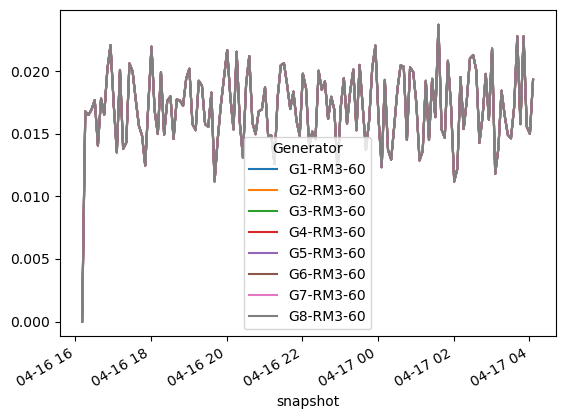

In [21]:
wec_grid.pypsaObj.pypsa_object.generators_t.p.iloc[:, -8:].plot()

In [48]:
len(p)

144

In [49]:
len(p_1)

144

In [59]:
time = wec_grid.psseObj.history.keys()
time_list = list(time)
time_list[1:]

[0.0,
 450.0,
 750.0,
 1050.0,
 1350.0,
 1650.0,
 1950.0,
 2250.0,
 2550.0,
 2850.0,
 3150.0,
 3450.0,
 3750.0,
 4050.0,
 4350.0,
 4650.0,
 4950.0,
 5250.0,
 5550.0,
 5850.0,
 6150.0,
 6450.0,
 6750.0,
 7050.0,
 7350.0,
 7650.0,
 7950.0,
 8250.0,
 8550.0,
 8850.0,
 9150.0,
 9450.0,
 9750.0,
 10050.0,
 10350.0,
 10650.0,
 10950.0,
 11250.0,
 11550.0,
 11850.0,
 12150.0,
 12450.0,
 12750.0,
 13050.0,
 13350.0,
 13650.0,
 13950.0,
 14250.0,
 14550.0,
 14850.0,
 15150.0,
 15450.0,
 15750.0,
 16050.0,
 16350.0,
 16650.0,
 16950.0,
 17250.0,
 17550.0,
 17850.0,
 18150.0,
 18450.0,
 18750.0,
 19050.0,
 19350.0,
 19650.0,
 19950.0,
 20250.0,
 20550.0,
 20850.0,
 21150.0,
 21450.0,
 21750.0,
 22050.0,
 22350.0,
 22650.0,
 22950.0,
 23250.0,
 23550.0,
 23850.0,
 24150.0,
 24450.0,
 24750.0,
 25050.0,
 25350.0,
 25650.0,
 25950.0,
 26250.0,
 26550.0,
 26850.0,
 27150.0,
 27450.0,
 27750.0,
 28050.0,
 28350.0,
 28650.0,
 28950.0,
 29250.0,
 29550.0,
 29850.0,
 30150.0,
 30450.0,
 30750.0,
 31050.0

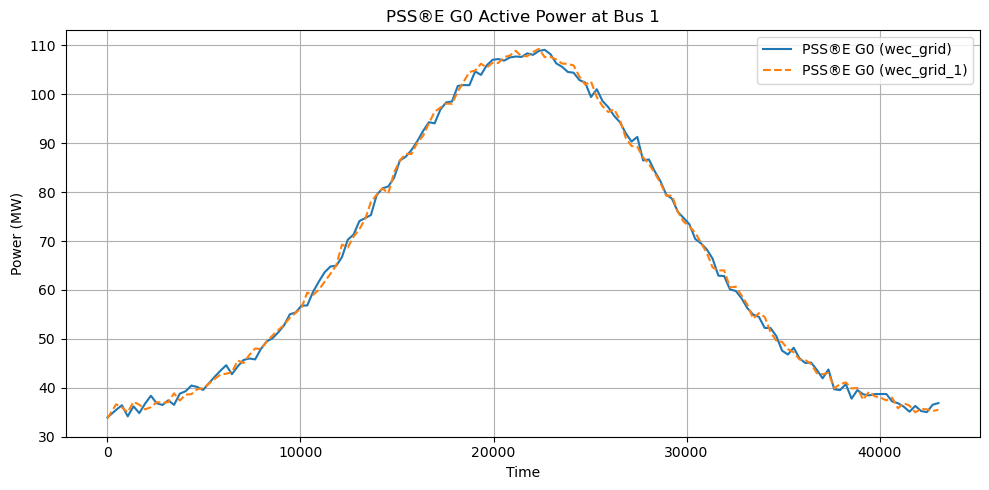

In [60]:
bus_id = 1
time = wec_grid.psseObj.history.keys() 
p = [wec_grid.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

p_1 = [wec_grid_1.psseObj.history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

import matplotlib.pyplot as plt

# Convert time to list in case it's not already indexable
time_list = list(time)
time_list = time_list[1:]

plt.figure(figsize=(10, 5))

# Plot both series
plt.plot(time_list, p, label="PSS®E G0 (wec_grid)", color="tab:blue")
plt.plot(time_list, p_1, label="PSS®E G0 (wec_grid_1)", color="tab:orange", linestyle="--")

# Labeling
plt.title("PSS®E G0 Active Power at Bus {}".format(bus_id))
plt.xlabel("Time")
plt.ylabel("Power (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# post processing 

In [10]:
import pandas as pd

# Extract time and load data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create DataFrame
df = pd.DataFrame({"time": time_steps, "load": bus_7_load})

# Save to CSV (for LaTeX)
df.to_csv("load_curve_data.csv", index=False)


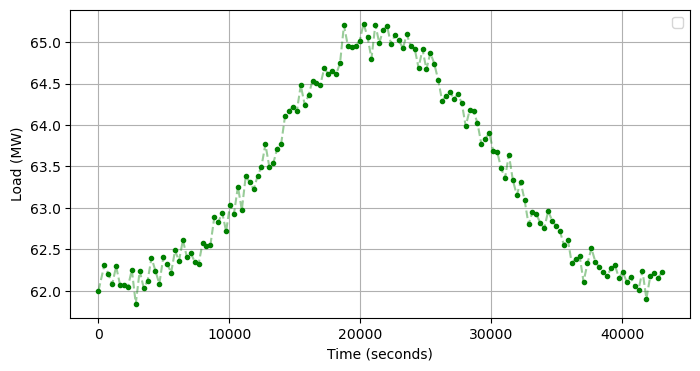

In [11]:
import matplotlib.pyplot as plt

# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot
plt.figure(figsize=(8, 4))
plt.plot(time_steps, bus_7_load, 'o', color='green', markersize=3)  # Red dots at data points
plt.plot(time_steps, bus_7_load, '--', color='green', alpha=0.4)  # Blue dashed lines in between

# Labels and title
plt.xlabel("Time (seconds)")
plt.ylabel("Load (MW)")
# plt.title("Load Curve for Bus 7")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

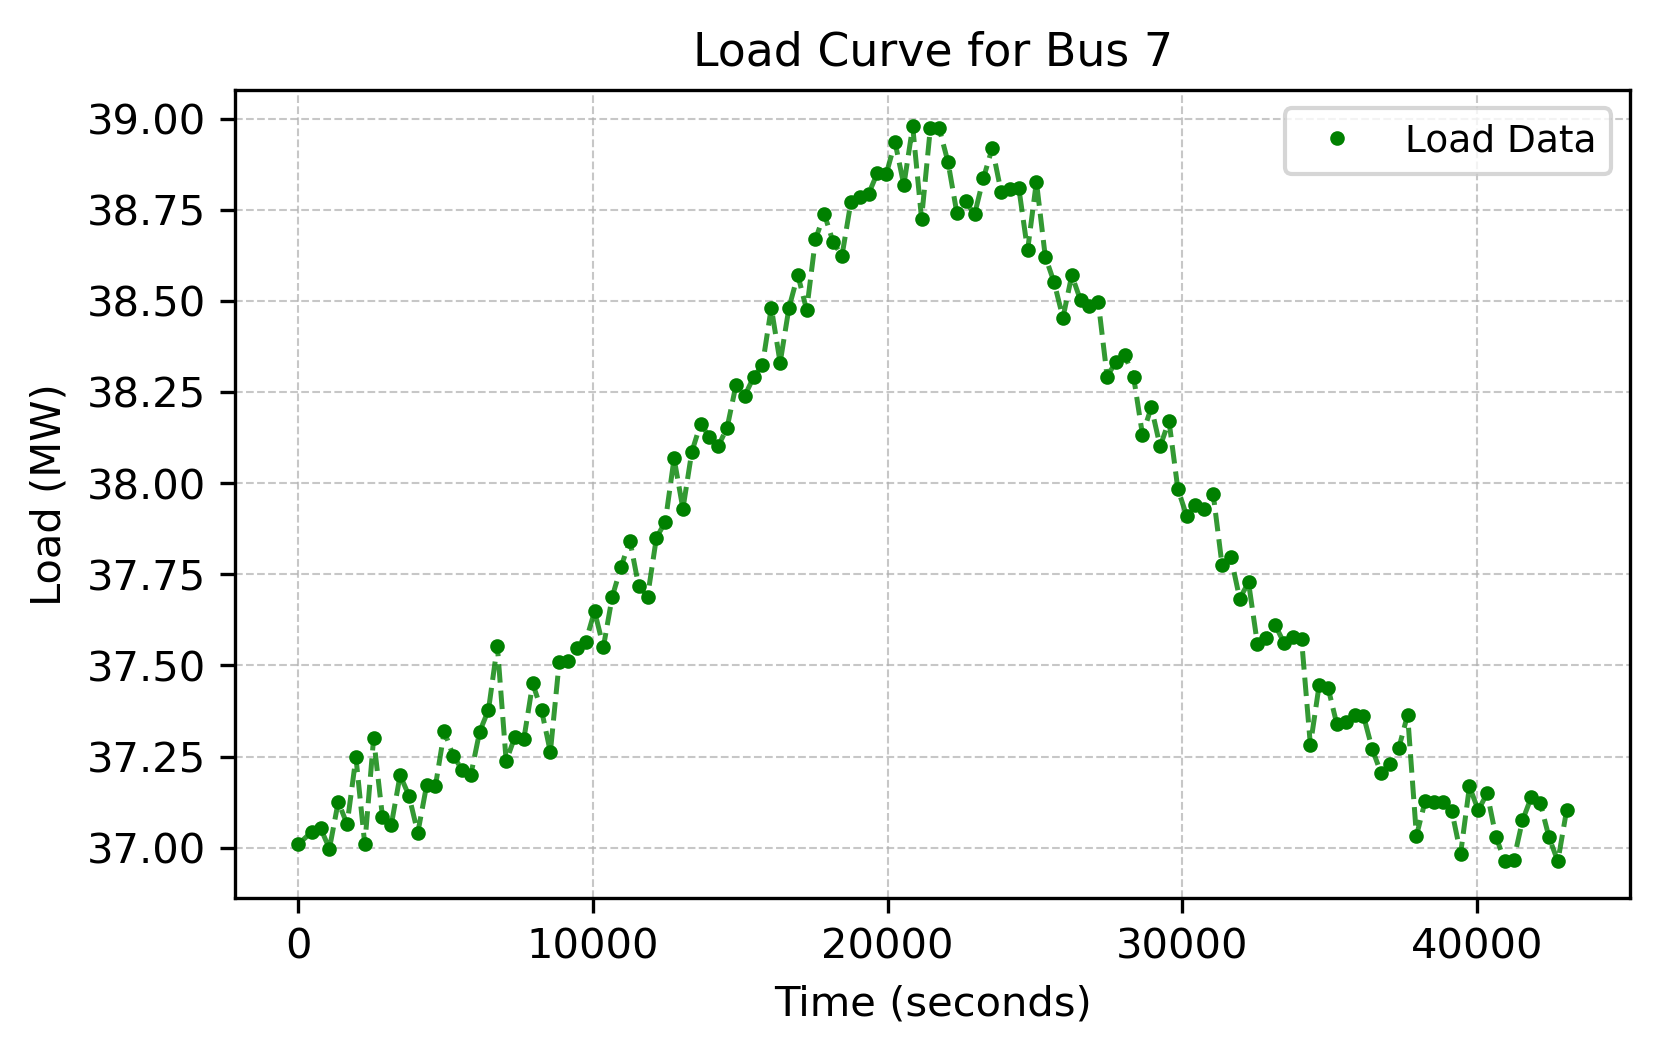

In [ ]:
import matplotlib.pyplot as plt

# Extract time steps and load profile data
time_steps = wec_grid.psseObj.load_profiles.index.to_list()
bus_7_load = wec_grid.psseObj.load_profiles["BUS 7"]

# Create the plot with proper scaling
fig, ax = plt.subplots(figsize=(6, 3.5), dpi=300)  # Scales well in papers

# Plot with high-quality markers and lines
ax.plot(time_steps, bus_7_load, 'o', color='green', markersize=3, markeredgewidth=0.5, label="Load Value")
ax.plot(time_steps, bus_7_load, '--', color='green', linewidth=1.2, alpha=0.8)

# Labels and title
ax.set_xlabel("Time (seconds)", fontsize=10)
ax.set_ylabel("Load (MW)", fontsize=10)
#ax.set_title("Load Curve for Bus 7", fontsize=11)
ax.legend(fontsize=9)
ax.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Save as a high-quality PDF
plt.savefig("load_curve_bus7.pdf", format="pdf", bbox_inches="tight")  # Save for paper

# Save as PNG (optional)
plt.savefig("load_curve_bus7.png", format="png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 1

pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P Gen"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P Gen"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pgen_no_wec, label="No WEC - P Gen (MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P Gen (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P Gen (MW)")
plt.title(f"Bus {bus_id} Active Power (P Gen) Over Time")
plt.legend()
plt.grid()
plt.show()

In [12]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0)


time: 0.0 - error code: 0
time: 450.0 - error code: 0
time: 750.0 - error code: 0
time: 1050.0 - error code: 0
time: 1350.0 - error code: 0
time: 1650.0 - error code: 0
time: 1950.0 - error code: 0
time: 2250.0 - error code: 0
time: 2550.0 - error code: 0
time: 2850.0 - error code: 0
time: 3150.0 - error code: 0
time: 3450.0 - error code: 0
time: 3750.0 - error code: 0
time: 4050.0 - error code: 0
time: 4350.0 - error code: 0
time: 4650.0 - error code: 0
time: 4950.0 - error code: 0
time: 5250.0 - error code: 0
time: 5550.0 - error code: 0
time: 5850.0 - error code: 0
time: 6150.0 - error code: 0
time: 6450.0 - error code: 0
time: 6750.0 - error code: 0
time: 7050.0 - error code: 0
time: 7350.0 - error code: 0
time: 7650.0 - error code: 0
time: 7950.0 - error code: 0
time: 8250.0 - error code: 0
time: 8550.0 - error code: 0
time: 8850.0 - error code: 0
time: 9150.0 - error code: 0
time: 9450.0 - error code: 0
time: 9750.0 - error code: 0
time: 10050.0 - error code: 0
time: 10350.0 - er

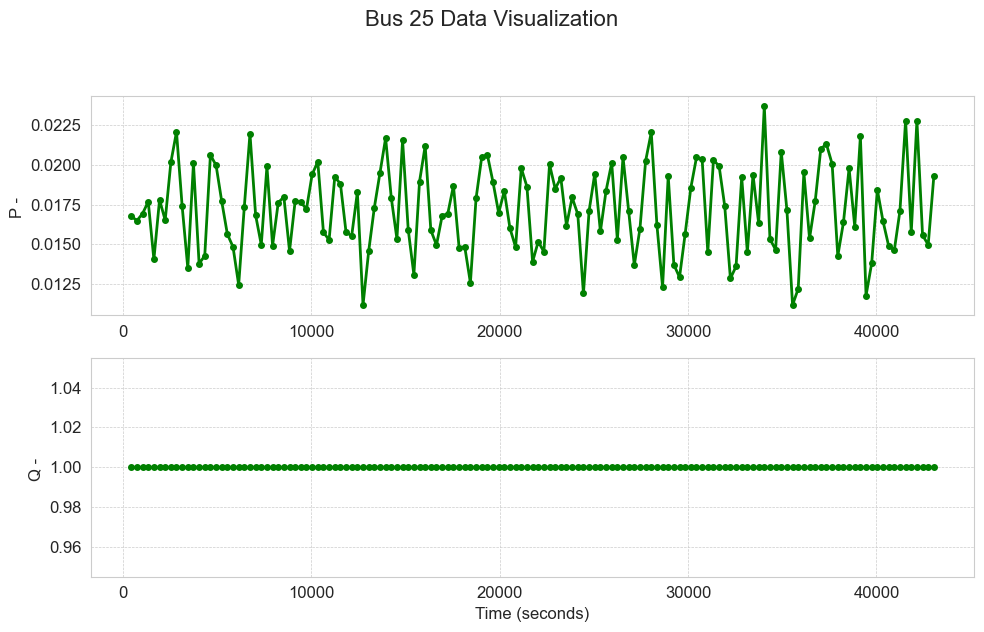

In [8]:
wec_grid.psseObj.plot_bus(bus_num=25, time=[450.0, 43050.0])

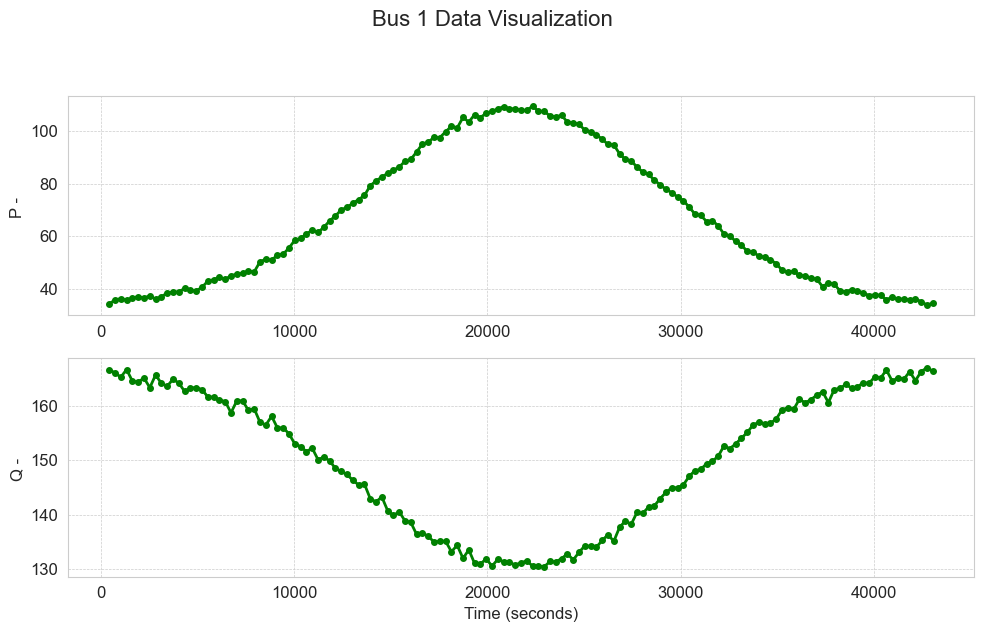

In [9]:
wec_grid.psseObj.plot_bus(bus_num=1, time=[450.0, 43050.0])

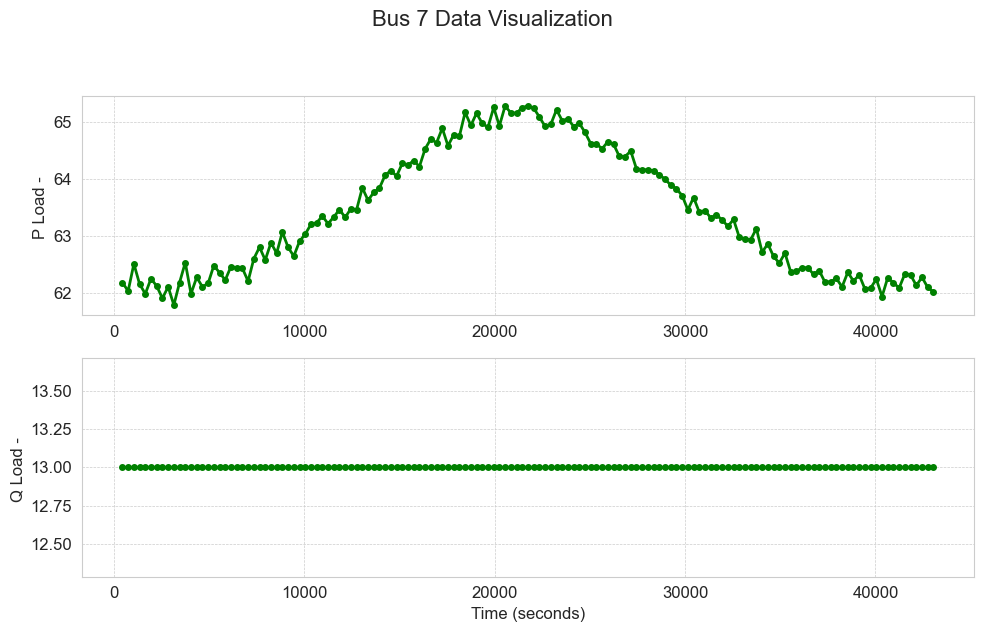

In [10]:
wec_grid.psseObj.plot_bus(bus_num=7, time=[450, 43050.0], arg_1='P Load', arg_2='Q Load')

In [11]:
# save run data
wec_grid.psseObj.load_profiles.to_csv("./softwareX_output/load_profiles.csv")

import pickle

with open("./softwareX_output/psse_history_wec.pkl", "wb") as f:
    pickle.dump(wec_grid.psseObj.history, f)

In [12]:
# Regular run (No WEC) to compare

# save these exact load profiles for later
load_profiles = wec_grid.psseObj.load_profiles
load_profiles

BUS 1      BUS 2      BUS 3      BUS 4      BUS 5      BUS 6  \
0.0        0.0  97.000000  90.000000  74.000000  71.000000  68.000000   
450.0      0.0  96.817012  90.003756  73.982669  70.893019  68.056099   
750.0      0.0  97.344848  90.267243  74.006663  71.301846  67.834915   
1050.0     0.0  96.787995  90.162198  73.987324  70.861843  68.309047   
1350.0     0.0  97.428453  90.312522  74.119199  71.145299  68.303903   
...        ...        ...        ...        ...        ...        ...   
41850.0    0.0  97.097611  90.281298  74.215196  71.257667  68.199649   
42150.0    0.0  97.021947  90.113813  73.952533  71.110999  68.024300   
42450.0    0.0  96.879460  90.038654  74.154338  71.283226  68.091034   
42750.0    0.0  97.008730  89.742579  74.057189  71.033896  67.869297   
43050.0    0.0  97.036376  90.219194  74.014408  71.249133  68.150289   

             BUS 7      BUS 8       BUS 9      BUS 10  ...      BUS 16  \
0.0      62.000000  85.000000  175.000000  100.000000  ...  100.000000   
450.0    62.178062  85.068389  174.987777  100.426899  ...   99.749136   
750.0    62.031927  85.134583  175.228012  100.209559  ...  100.239409   
1050.0   62.507587  85.203015  175.394481   99.879969  ...   99.979738   
1350.0   62.154431  85.066473  175.186103   99.845326  ...   99.815826   
...            ...        ...         ...         ...  ...         ...   
41850.0  62.311720  85.085552  174.924923  100.287705  ...  100.039812   
42150.0  62.129572  85.074151  175.087967  100.196145  ...  100.506816   
42450.0  62.272535  85.082158  175.109612  100.091263  ...   99.984568   
42750.0  62.094087  84.702723  175.120806  100.288030  ...   99.909695   
43050.0  62.014369  85.126766  174.711783   99.916578  ...  100.433308   

         BUS 17      BUS 18     BUS 19     BUS 20  BUS 21  BUS 22  BUS 23  \
0.0         0.0  162.000000  90.000000  65.000000     0.0     0.0     0.0   
450.0       0.0  162.177368  90.045204  65.315851     0.0     0.0     0.0   
750.0       0.0  161.715838  89.860767  65.101749     0.0     0.0     0.0   
1050.0      0.0  162.188242  89.837831  65.178628     0.0     0.0     0.0   
1350.0      0.0  161.962867  89.891512  65.079006     0.0     0.0     0.0   
...         ...         ...        ...        ...     ...     ...     ...   
41850.0     0.0  162.181611  90.062847  65.248738     0.0     0.0     0.0   
42150.0     0.0  162.554505  89.791101  65.156795     0.0     0.0     0.0   
42450.0     0.0  162.429898  89.967564  65.189224     0.0     0.0     0.0   
42750.0     0.0  162.115006  89.885637  65.063457     0.0     0.0     0.0   
43050.0     0.0  162.126127  90.058055  65.160304     0.0     0.0     0.0   

         BUS 24  BUS 25  
0.0         0.0     0.0  
450.0       0.0     0.0  
750.0       0.0     0.0  
1050.0      0.0     0.0  
1350.0      0.0     0.0  
...         ...     ...  
41850.0     0.0     0.0  
42150.0     0.0     0.0  
42450.0     0.0     0.0  
42750.0     0.0     0.0  
43050.0     0.0     0.0  

[144 rows x 25 columns]

In [13]:
wec_grid = WecGrid(case="../WecGrid/models/grid_models/IEEE_24_bus.RAW")
wec_grid.initialize_psse("fnsl")
wec_grid.psseObj.dataframe


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 24 records for Bus data
 Starting processing of Load data records
 Finished processing of 16 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 0 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 11 records for Generator data
 Starting processing of Branch data records
 Finished processing of 32 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 24 records for 6 Transformer data
 Starting processing of Area data records
 Finished processing of 1 records for Area data
 Starting processing of T

BUS_ID     Bus   BASE        PU     ANGLE      MISMATCH  Type       P Gen  \
0        1   BUS 1  138.0  1.000000  0.000000  1.192093e-05     3   35.930069   
1        2   BUS 2  138.0  0.997822  0.000181  0.000000e+00     2   67.000000   
2        3   BUS 3  138.0  0.863703  0.187725  1.192093e-05     1         NaN   
3        4   BUS 4  138.0  0.887014 -0.007247  6.664002e-06     1         NaN   
4        5   BUS 5  138.0  0.927217 -0.004004  0.000000e+00     1         NaN   
5        6   BUS 6  138.0  0.907952  0.006838  6.365779e-06     1         NaN   
6        7   BUS 7  138.0  0.796234 -0.010124  0.000000e+00     2   64.000000   
7        8   BUS 8  230.0  0.805368 -0.015157  1.343172e-06     1         NaN   
8        9   BUS 9  138.0  0.834940  0.087076  6.365779e-06     1         NaN   
9       10  BUS 10  138.0  0.881702  0.064990  2.980232e-06     1         NaN   
10      11  BUS 11  230.0  0.836073  0.220619  0.000000e+00     1         NaN   
11      12  BUS 12  230.0  0.839763  0.205660  2.980232e-06     1         NaN   
12      13  BUS 13  230.0  0.836927  0.269663  0.000000e+00     2  200.000000   
13      14  BUS 14  230.0  0.836423  0.327386  1.192093e-05     2    0.000000   
14      15  BUS 15  230.0  0.885209  0.579676  2.980232e-06     2  274.000000   
15      16  BUS 16  230.0  0.862146  0.472709  1.812804e-05     2  245.000000   
16      17  BUS 17  230.0  0.895736  0.559572  5.960464e-06     1         NaN   
17      18  BUS 18  230.0  0.901057  0.591654  0.000000e+00     2  144.000000   
18      19  BUS 19  230.0  0.851835  0.415460  7.450581e-07     1         NaN   
19      20  BUS 20  230.0  0.849352  0.389755  6.006850e-06     1         NaN   
20      21  BUS 21  230.0  0.911253  0.622349  2.402740e-05     2  294.000000   
21      22  BUS 22  230.0  1.000000  0.654534  1.192093e-05     2  150.000000   
22      23  BUS 23  230.0  0.849713  0.385360  7.450581e-07     2  200.000000   
23      24  BUS 24  230.0  0.854969  0.433070  0.000000e+00     1         NaN   

         Q Gen  P Load     Q Load           P           Q        ΔP  \
0   180.488586     NaN        NaN   35.930069  180.488586  0.000000   
1     0.000000    97.0  20.000000  -30.000000  -20.000000  0.000000   
2          NaN    90.0  19.000000  -90.000000  -19.000000 -0.000012   
3          NaN    74.0  15.000001  -74.000000  -15.000001  0.000003   
4          NaN    71.0  14.000000  -71.000000  -14.000000  0.000000   
5          NaN    68.0  14.000000  -68.000000  -14.000000 -0.000002   
6     0.000000    62.0  13.000000    2.000000  -13.000000  0.000000   
7          NaN    85.0  18.000000  -85.000000  -18.000000 -0.000001   
8          NaN   175.0  36.000000 -175.000000  -36.000000 -0.000006   
9          NaN   100.0  23.000000 -100.000000  -23.000000  0.000003   
10         NaN     NaN        NaN         NaN         NaN  0.000000   
11         NaN     NaN        NaN         NaN         NaN  0.000000   
12    0.000000   130.0  27.000002   70.000000  -27.000002  0.000000   
13    0.000000    92.0  20.000000  -92.000000  -20.000000 -0.000012   
14    0.000000   158.0  32.000000  116.000000  -32.000000  0.000000   
15    0.000000   100.0  20.000000  145.000000  -20.000000 -0.000018   
16         NaN     NaN        NaN         NaN         NaN  0.000000   
17    0.000000   162.0  34.000000  -18.000000  -34.000000  0.000000   
18         NaN    90.0  18.000000  -90.000000  -18.000000  0.000000   
19         NaN    65.0  13.000000  -65.000000  -13.000000  0.000006   
20    0.000000     NaN        NaN  294.000000    0.000000  0.000024   
21  199.455856     NaN        NaN  150.000000  199.455856  0.000000   
22    0.000000     NaN        NaN  200.000000    0.000000  0.000000   
23         NaN     NaN        NaN         NaN         NaN  0.000000   

              ΔQ       M_Angle     M_Mag  
0  -1.192093e-05  1.192093e-05 -1.570796  
1   0.000000e+00  0.000000e+00  0.000000  
2   0.000000e+00  1.192093e-05  3.141593  
3  -5.960464e-06  6.664002e-06

In [14]:
wec_grid.psseObj.load_profiles = load_profiles

In [15]:
import sqlite3
import pandas as pd

# Define database path
DB_PATH = "../WecGrid/database_handler/WEC-GRID.db"  # Ensure correct relative path

# Define WEC ID
ID = 11  

# Connect to the database
conn = sqlite3.connect(DB_PATH)

# Query to select only the 'time' column
data_query = f"SELECT time FROM WEC_output_{ID}"

# Execute the query and load into a DataFrame
time_dataframe = pd.read_sql_query(data_query, conn)

# Convert time column to list
time_data = time_dataframe['time'].tolist()

# Close the database connection
conn.close()

In [16]:
wec_grid.psseObj.ac_injection(start=0, end=43050.0, time=time_data)


 No power flow data changed for load "1" at bus 2 [2           138.00]

 No power flow data changed for load "1" at bus 3 [3           138.00]

 No power flow data changed for load "1" at bus 4 [4           138.00]

 No power flow data changed for load "1" at bus 5 [5           138.00]

 No power flow data changed for load "1" at bus 6 [6           138.00]

 No power flow data changed for load "1" at bus 7 [7           138.00]

 No power flow data changed for load "1" at bus 8 [8           230.00]

 No power flow data changed for load "1" at bus 9 [9           138.00]

 No power flow data changed for load "1" at bus 10 [10          138.00]

 No power flow data changed for load "1" at bus 13 [13          230.00]

 No power flow data changed for load "1" at bus 14 [14          230.00]

 No power flow data changed for load "1" at bus 15 [15          230.00]

 No power flow data changed for load "1" at bus 16 [16          230.00]

 No power flow data changed for load "1" at bus 18 [18    

time: 3150.0 - error code: 0

 Power flow data changed for load "1" at bus 2 [2           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    97.3468         97.6428      PL

 Power flow data changed for load "1" at bus 3 [3           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    90.0413         90.3301      PL

 Power flow data changed for load "1" at bus 4 [4           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    74.2634         74.1664      PL

 Power flow data changed for load "1" at bus 5 [5           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    71.1711         71.2882      PL

 Power flow data changed for load "1" at bus 6 [6           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    68.2031         68.1075      PL

 Power flow data changed for load "1" at bus 7 [7           138.00]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
    61.7859         62.1796      PL

 Power flow data changed for load "1" at bus 8 [8           230.00]:
 X--ORI

In [17]:
# save run data

with open("./softwareX_output/psse_history_no_wec.pkl", "wb") as f:
    pickle.dump(wec_grid.psseObj.history, f)

In [17]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

# Load history
with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)


In [27]:
no_wec_history[-1].columns

Index(['BUS_ID', 'Bus', 'BASE', 'PU', 'ANGLE', 'MISMATCH', 'Type', 'P Gen',
       'Q Gen', 'P Load', 'Q Load', 'P', 'Q', 'ΔP', 'ΔQ', 'M_Angle', 'M_Mag'],
      dtype='object')

In [20]:
wec_history

{-1:     BUS_ID     Bus   BASE        PU     ANGLE  MISMATCH  Type       P Gen  \
 0        1   BUS 1  138.0  1.000000  0.000000  0.000003     3   33.938225   
 1        2   BUS 2  138.0  0.997914  0.000150  0.000027     2   67.000000   
 2        3   BUS 3  138.0  0.869158  0.184816  0.000223     1         NaN   
 3        4   BUS 4  138.0  0.891616 -0.007560  0.000095     1         NaN   
 4        5   BUS 5  138.0  0.931030 -0.004400  0.000069     1         NaN   
 5        6   BUS 6  138.0  0.914745  0.006218  0.000218     1         NaN   
 6        7   BUS 7  138.0  0.819692 -0.013867  0.000588     2   64.000000   
 7        8   BUS 8  230.0  0.822576 -0.016730  0.001430     1         NaN   
 8        9   BUS 9  138.0  0.843033  0.085111  0.000498     1         NaN   
 9       10  BUS 10  138.0  0.889281  0.063249  0.000292     1         NaN   
 10      11  BUS 11  230.0  0.843570  0.216455  0.000067     1         NaN   
 11      12  BUS 12  230.0  0.847512  0.201690  0.000021    

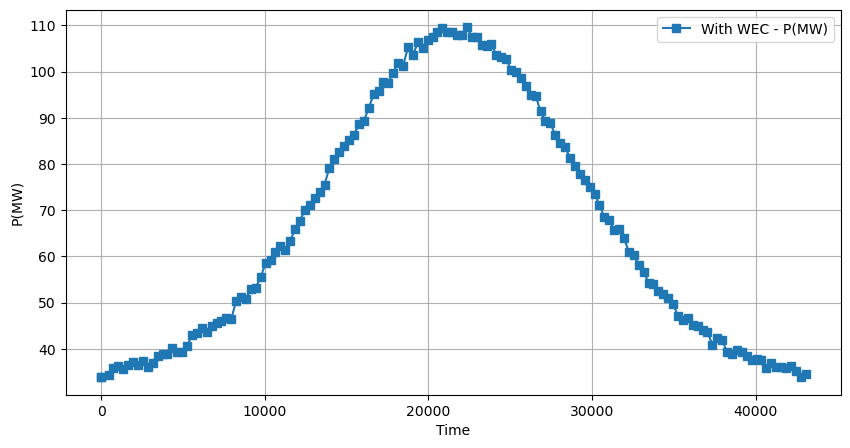

In [6]:
# review bus 1 
# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 1

# pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
#plt.plot(time_steps, pgen_no_wec, label="No WEC - P(MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P(MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P(MW)")
#plt.title(f"Bus {bus_id} Active Power Over Time")
plt.legend()
plt.grid()
plt.show()

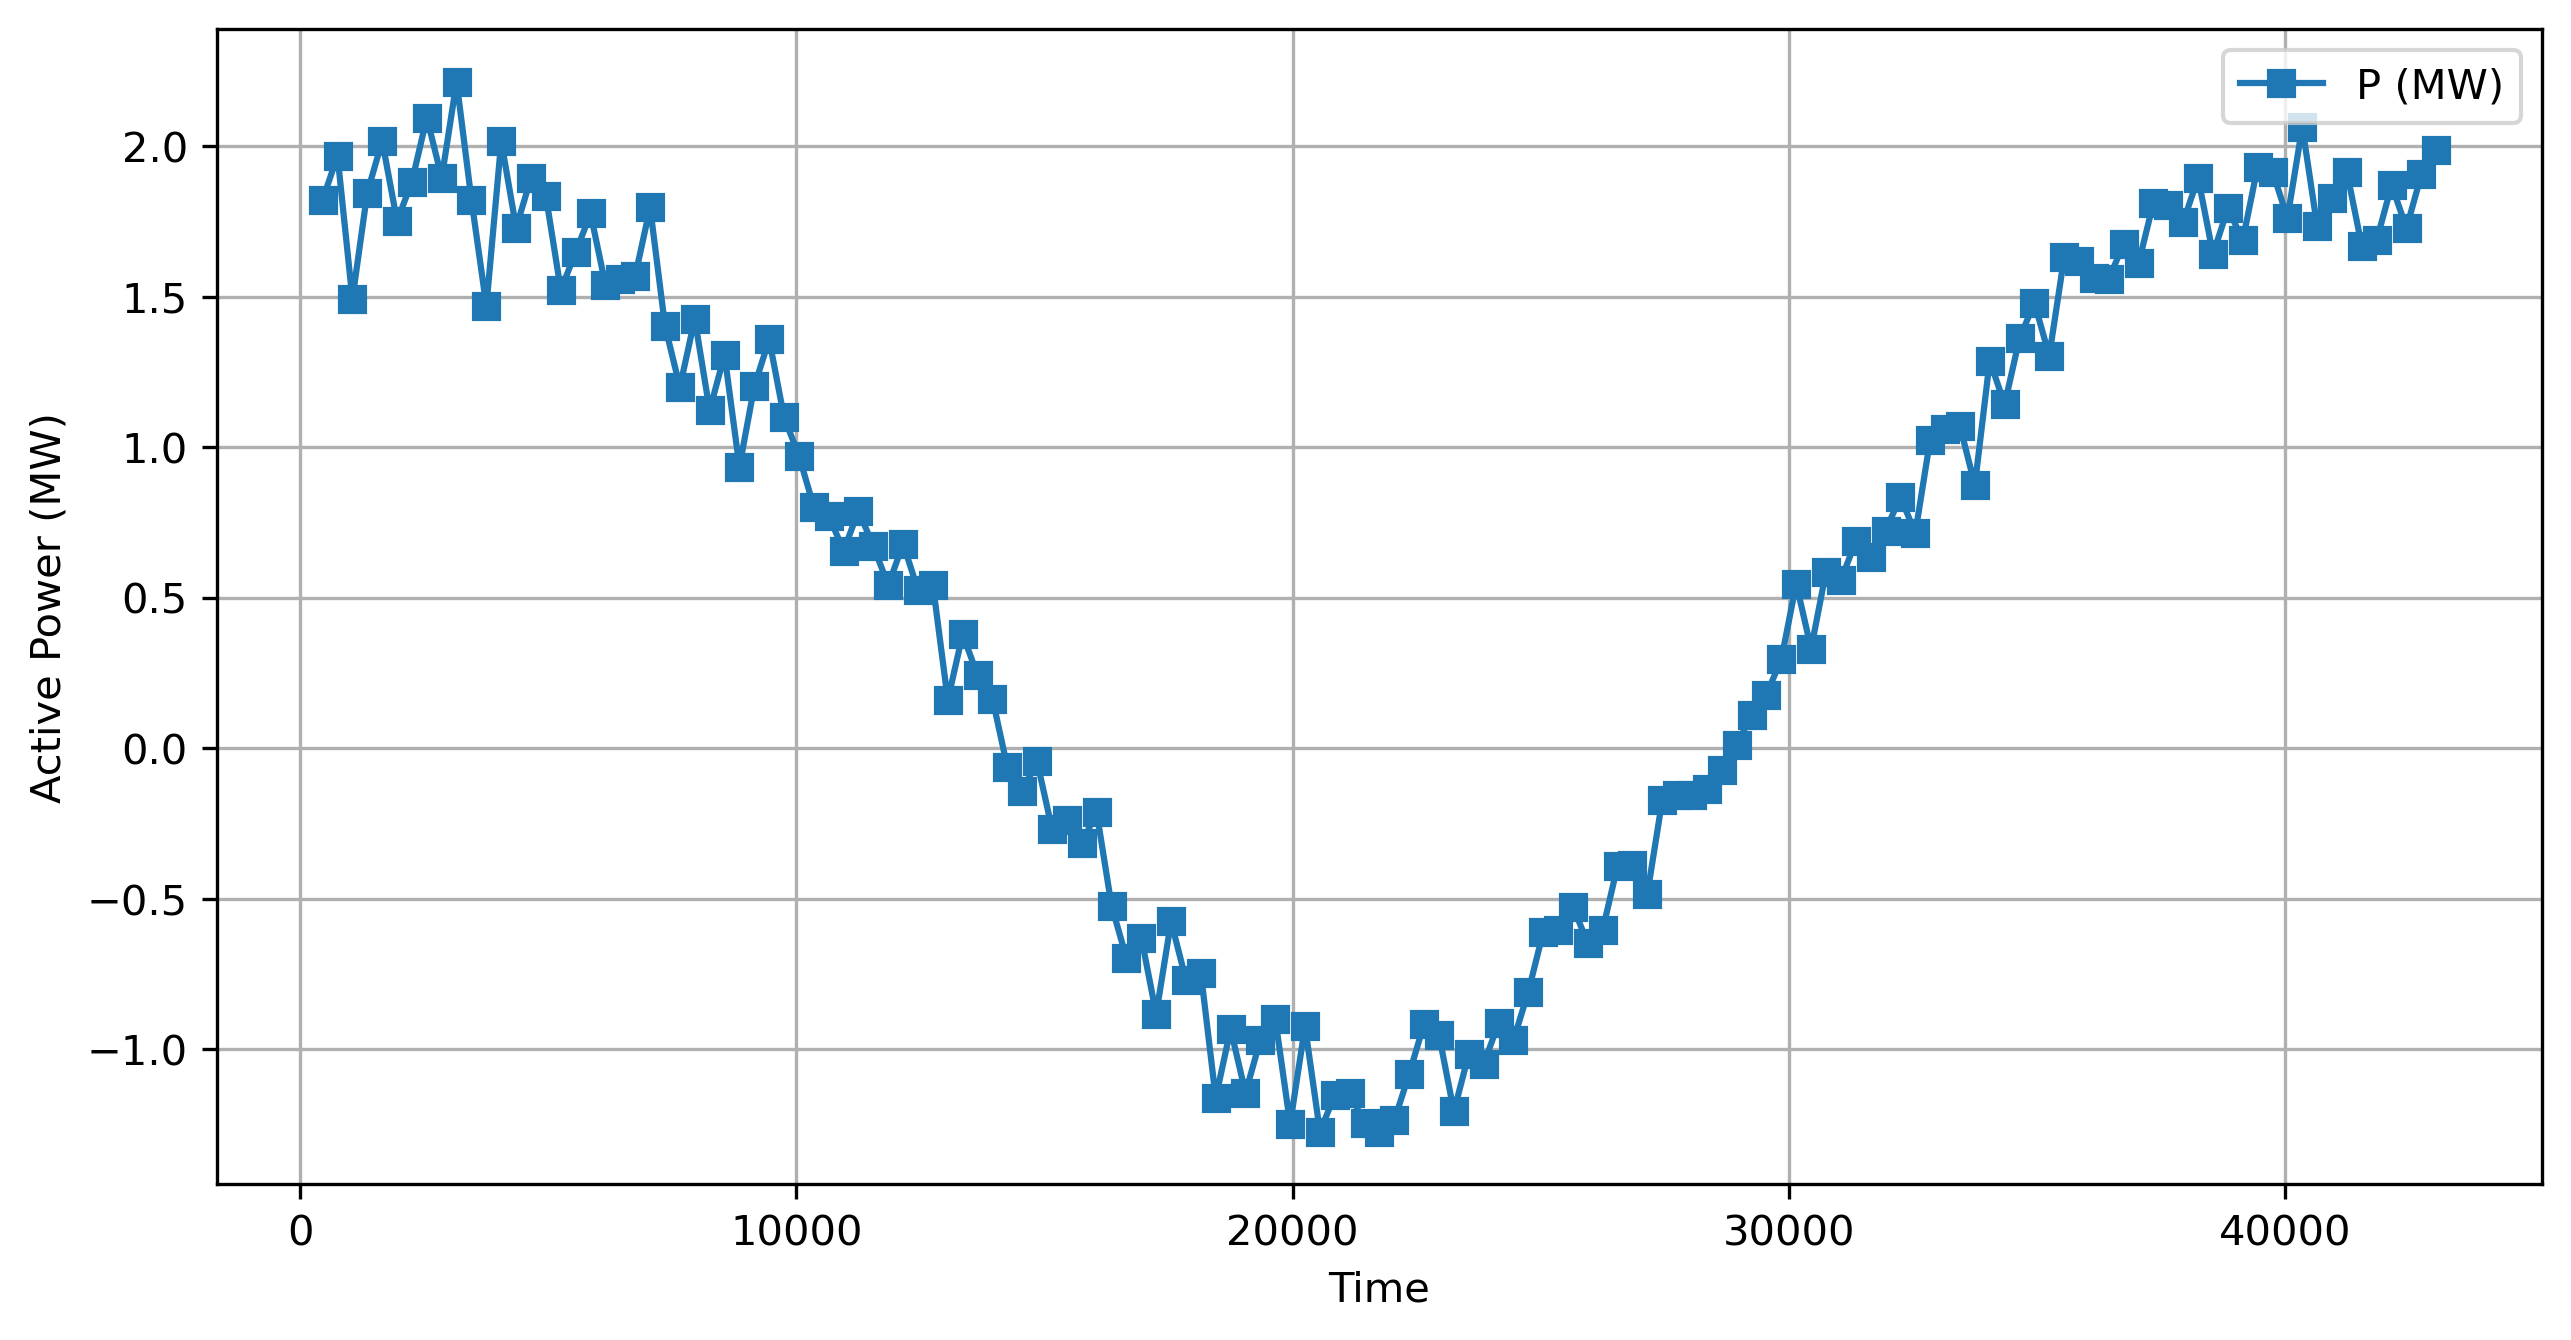

In [13]:
import matplotlib.pyplot as plt

# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 7
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P"] for t in time_steps]

pgen_wec = pgen_wec[2:]
time_steps = time_steps[2:]  # Also slice time_steps to match

# Create plot
plt.figure(figsize=(10, 5), dpi=300)  # Increase DPI for better resolution
plt.plot(time_steps, pgen_wec, label="P (MW)", linestyle="-", marker="s")

# Labels and formatting
plt.xlabel("Time")
plt.ylabel("Active Power (MW)")
plt.legend()
plt.grid()

# Save as high-res PNG and vector PDF
plt.savefig("bus_7_pgen.png", dpi=300, bbox_inches="tight")  # High-res raster
#plt.savefig("bus_1_pgen.pdf", bbox_inches="tight")  # High-quality vector

plt.show()

In [7]:
import pandas as pd
import numpy as np  # Import NumPay for NaN handling

# Extract time and load data
time_steps = list(no_wec_history.keys())

bus_id = 25  # Define the bus ID
parameter = "P Gen"  # Ensure correct capitalization

values_a = []  # Initialize empty lists
values_b = []

# Handle missing data with NaN instead of None
try:
    values_a = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
except Exception as e:
    print(f"Data not available for 'No WEC' - {e}")

try:
    values_b = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
except Exception as e:
    print(f"Data not available for 'With WEC' - {e}")

# Ensure both lists have the same length (fill with NaN if missing)
if not values_a:
    values_a = [np.nan] * len(time_steps)
if not values_b:
    values_b = [np.nan] * len(time_steps)

# Create a DataFrame
df = pd.DataFrame({
    "Time Step": time_steps,
    f"{parameter} (No WEC)": values_a,
    f"{parameter} (With WEC)": values_b
})

# Format parameter for file naming (replace spaces with underscores)
parameter = parameter.replace(" ", "_")

# Save to CSV
csv_filename = f"bus{bus_id}_{parameter}.csv"
#df.to_csv(csv_filename, index=False)
df.to_csv(csv_filename, index=False, na_rep="NaN")
print(f"CSV file saved as: {csv_filename}")

Data not available for 'No WEC' - 25
CSV file saved as: bus25_P_Gen.csv


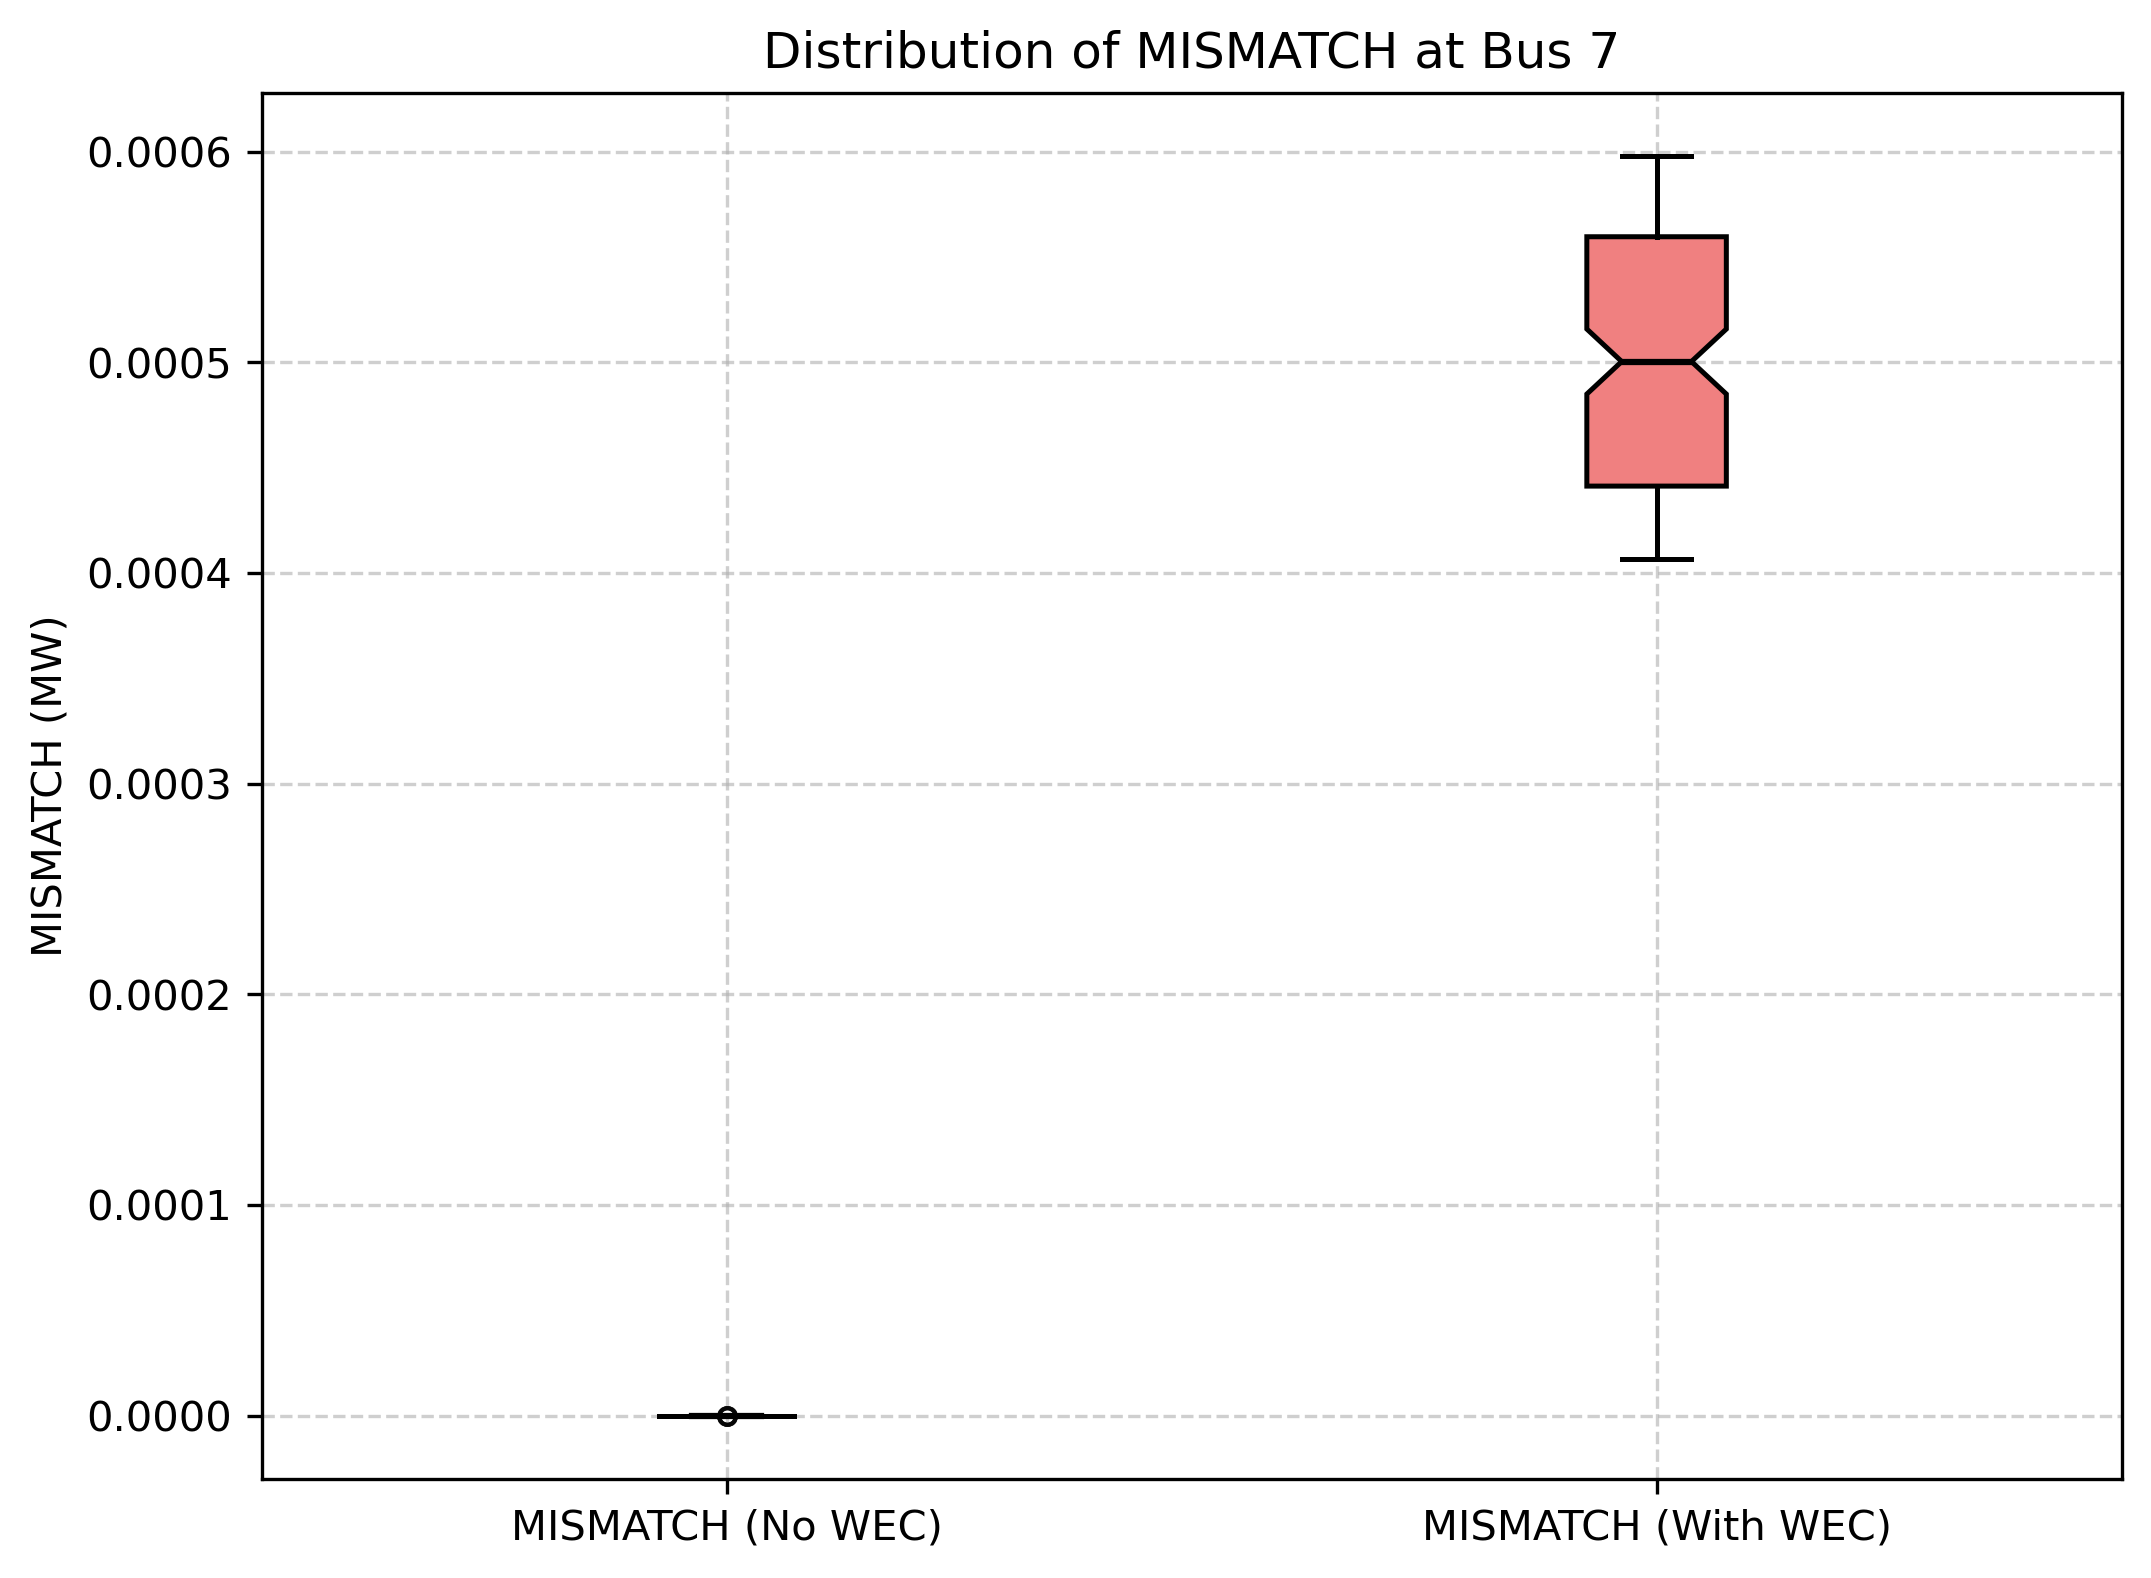

In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history from pickle files
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)

# Define bus ID and parameter
bus_id = 7
parameter = "MISMATCH"

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract mismatch data for the bus
no_wec_values = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
wec_values = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]

# Create DataFrame
df = pd.DataFrame({
    f"{parameter} (No WEC)": no_wec_values,
    f"{parameter} (With WEC)": wec_values
})

# High-res box plot
plt.figure(figsize=(8, 6), dpi=300)
box = plt.boxplot(
    [df[f"{parameter} (No WEC)"], df[f"{parameter} (With WEC)"]],
    labels=[f"{parameter} (No WEC)", f"{parameter} (With WEC)"],
    patch_artist=True,
    notch=True,  # Add notch to show confidence interval for median
    medianprops=dict(color="black", linewidth=1.5),
    whiskerprops=dict(color="black", linewidth=1.2),
    capprops=dict(color="black", linewidth=1.2),
    flierprops=dict(marker='o', color="red", markersize=4, alpha=0.7),  # Outliers
    boxprops=dict(linewidth=1.2)
)

# Custom colors for boxes
colors = ["lightblue", "lightcoral"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)

# Labels and formatting
plt.ylabel(f"{parameter} (MW)")
plt.title(f"Distribution of {parameter} at Bus {bus_id}")
plt.grid(True, linestyle="--", alpha=0.6)

# Save high-res outputs
plt.savefig("bus_7_mismatch_boxplot.png", dpi=300, bbox_inches="tight")  # High-res raster
plt.savefig("bus_7_mismatch_boxplot.pdf", bbox_inches="tight")  # Vector format for LaTeX

plt.show()

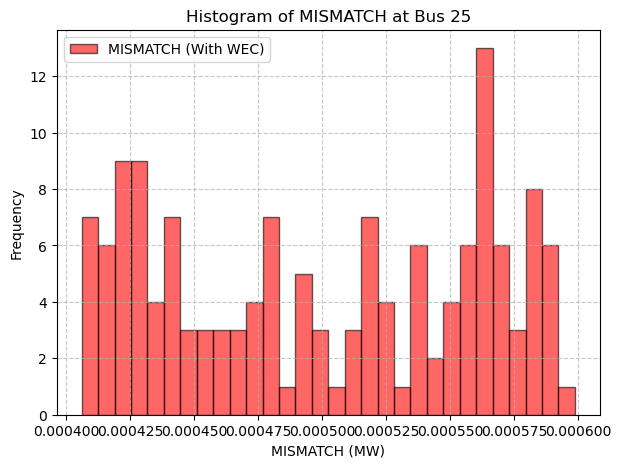

In [25]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

# Load history from pickle files
with open("./softwareX_output/psse_history_no_wec.pkl", "rb") as f:
    no_wec_history = pickle.load(f)

with open("./softwareX_output/psse_history_wec.pkl", "rb") as f:
    wec_history = pickle.load(f)

# Define bus ID and parameter
bus_id = 25
parameter = "MISMATCH"

# Extract time step#s
time_steps = list(no_wec_history.keys())

# Extract mismatch data for the bus
#no_wec_values = [no_wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]
wec_values = [wec_history[t].set_index("BUS_ID").at[bus_id, parameter] for t in time_steps]

# Create Histogram
plt.figure(figsize=(7, 5))
#plt.hist(no_wec_values, bins=30, alpha=0.6, color='blue', label=f"{parameter} (No WEC)", edgecolor='black')
plt.hist(wec_values, bins=30, alpha=0.6, color='red', label=f"{parameter} (With WEC)", edgecolor='black')

# Labels and title
plt.xlabel(f"{parameter} (MW)")
plt.ylabel("Frequency")
plt.title(f"Histogram of {parameter} at Bus {bus_id}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()

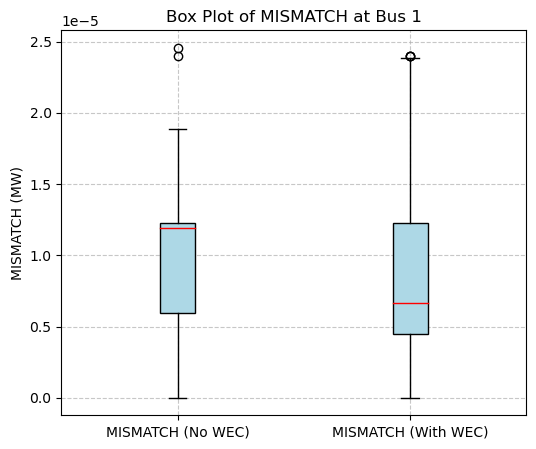

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
bus_id = 1# Define the bus ID
parameter = "MISMATCH"
csv_filename = f"bus{bus_id}_{parameter}.csv"

# Read the CSV file
df = pd.read_csv(csv_filename)

# Extract data columns
no_wec = df[f"{parameter} (No WEC)"]
with_wec = df[f"{parameter} (With WEC)"]

# Create box plot
plt.figure(figsize=(6, 5))
plt.boxplot([no_wec, with_wec], labels=[f"{parameter} (No WEC)", f"{parameter} (With WEC)"],
            patch_artist=True, boxprops=dict(facecolor="lightblue"),
            medianprops=dict(color="red"), whiskerprops=dict(color="black"),
            capprops=dict(color="black"))

# Labels and title
plt.ylabel(f"{parameter} (MW)")
plt.title(f"Box Plot of {parameter} at Bus {bus_id}")

# Show plot
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

In [ ]:
a

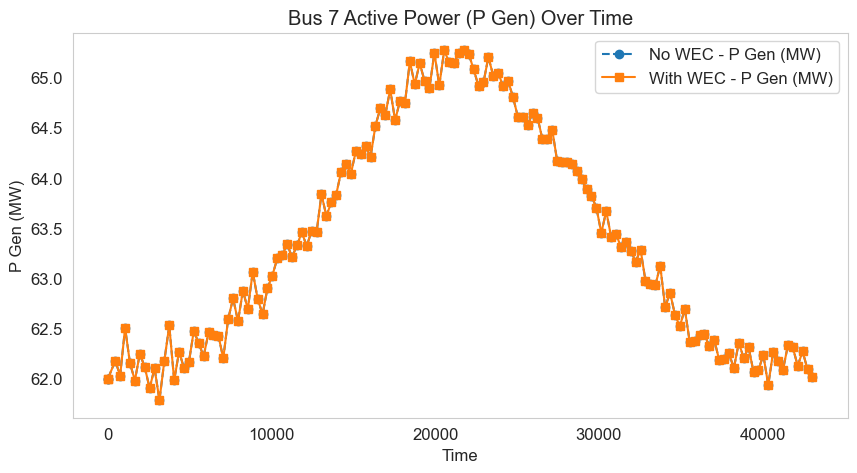

In [22]:
# review bus 7 
# Extract time steps (assuming both histories have the same keys)
time_steps = list(no_wec_history.keys())

# Extract P Gen (Active Power) for Bus 1 over time
bus_id = 7

pgen_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "P Load"] for t in time_steps]
pgen_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "P Load"] for t in time_steps]

# Plot Active Power (P Gen)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pgen_no_wec, label="No WEC - P Gen (MW)", linestyle="--", marker="o")
plt.plot(time_steps, pgen_wec, label="With WEC - P Gen (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("P Gen (MW)")
plt.title(f"Bus {bus_id} Active Power (P Gen) Over Time")
plt.legend()
plt.grid()
plt.show()

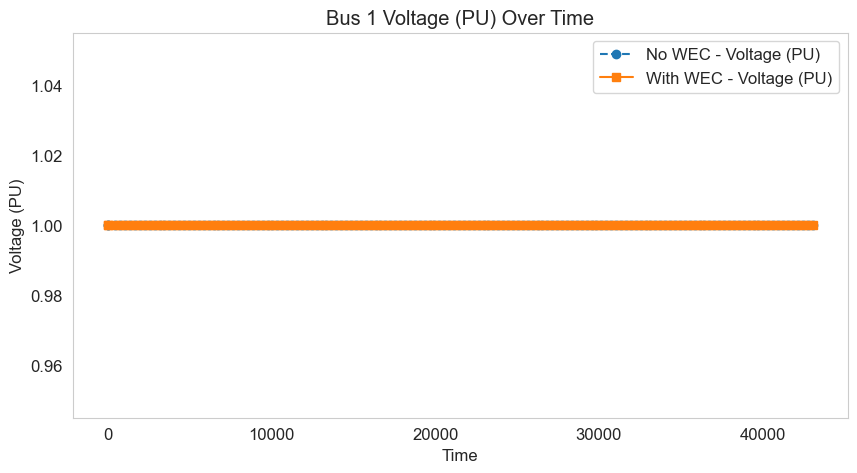

In [23]:

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract PU and ΔP (Power Mismatch) for Bus 1 over time
bus_id = 1

pu_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "PU"] for t in time_steps]
pu_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "PU"] for t in time_steps]

# Plot Voltage (PU)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, pu_no_wec, label="No WEC - Voltage (PU)", linestyle="--", marker="o")
plt.plot(time_steps, pu_wec, label="With WEC - Voltage (PU)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("Voltage (PU)")
plt.title(f"Bus {bus_id} Voltage (PU) Over Time")
plt.legend()
plt.grid()
plt.show()


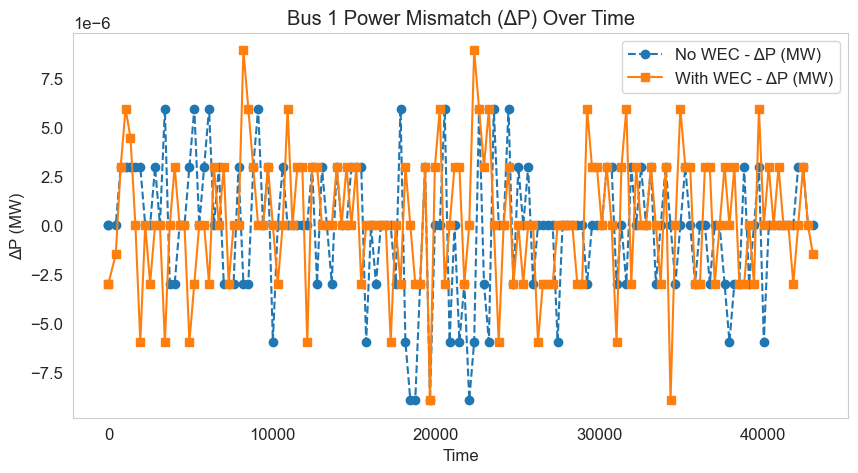

In [24]:

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract PU and ΔP (Power Mismatch) for Bus 1 over time
bus_id = 1

delta_p_no_wec = [no_wec_history[t].set_index("BUS_ID").at[bus_id, "ΔP"] for t in time_steps]
delta_p_wec = [wec_history[t].set_index("BUS_ID").at[bus_id, "ΔP"] for t in time_steps]

# Plot Power Mismatch (ΔP)
plt.figure(figsize=(10, 5))
plt.plot(time_steps, delta_p_no_wec, label="No WEC - ΔP (MW)", linestyle="--", marker="o")
plt.plot(time_steps, delta_p_wec, label="With WEC - ΔP (MW)", linestyle="-", marker="s")
plt.xlabel("Time")
plt.ylabel("ΔP (MW)")
plt.title(f"Bus {bus_id} Power Mismatch (ΔP) Over Time")
plt.legend()
plt.grid()
plt.show()

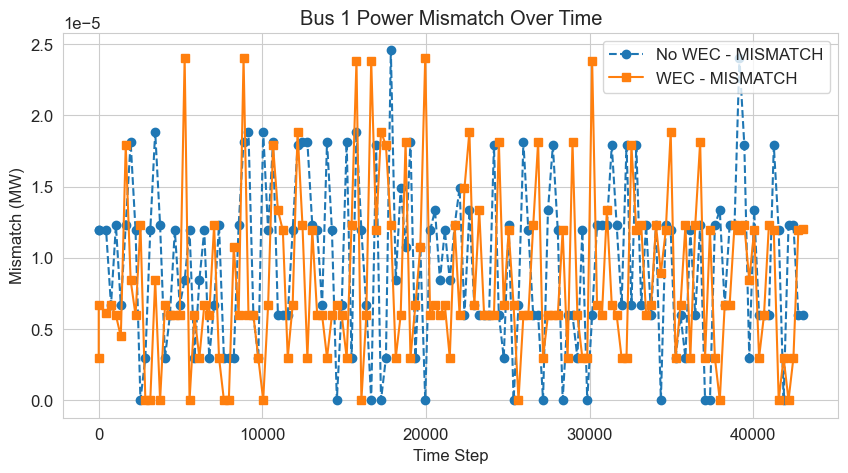

In [26]:
# Extract time steps (keys of history dictionary)
times = list(no_wec_history.keys())  # Assuming history is a dictionary with time as keys

# Extract mismatch values for Bus 1 over time
mismatch_no_wec = [no_wec_history[t].loc[no_wec_history[t]["Bus"] == "BUS 1", "MISMATCH"].values[0] for t in times]
mismatch_wec = [wec_history[t].loc[wec_history[t]["Bus"] == "BUS 1", "MISMATCH"].values[0] for t in times]

# Plot mismatch over time
plt.figure(figsize=(10, 5))
plt.plot(times, mismatch_no_wec, label="No WEC - MISMATCH", linestyle="--", marker="o")
plt.plot(times, mismatch_wec, label="WEC - MISMATCH", linestyle="-", marker="s")

plt.xlabel("Time Step")
plt.ylabel("Mismatch (MW)")
plt.title("Bus 1 Power Mismatch Over Time")
plt.legend()
plt.grid(True)
plt.show()

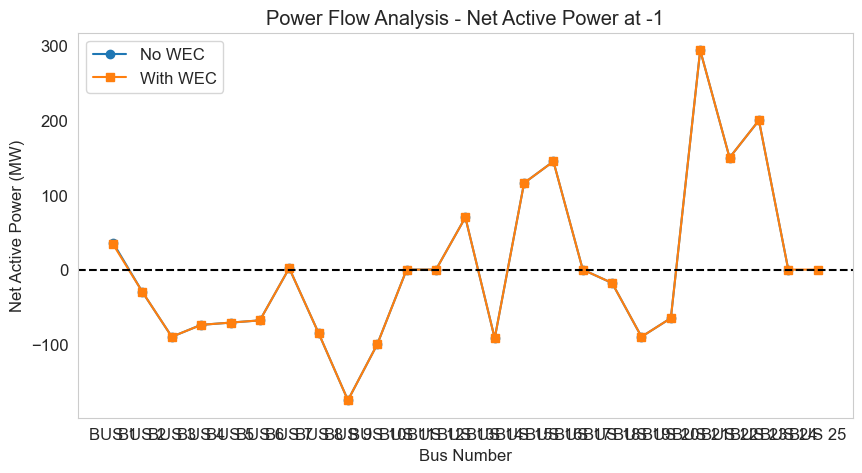

In [28]:

# Select a time step (e.g., first time step)
time_step = list(no_wec_history.keys())[0]  # Get first available timestamp
df_no_wec = no_wec_history[time_step]  # Extract DataFrame for no-WEC case
df_wec = wec_history[time_step]  # Extract DataFrame for WEC case

# Ensure numerical columns have no NaN values
df_no_wec.fillna(0, inplace=True)
df_wec.fillna(0, inplace=True)

# Compute Net Power Injection
df_no_wec["P_net"] = df_no_wec["P Gen"] - df_no_wec["P Load"]
df_wec["P_net"] = df_wec["P Gen"] - df_wec["P Load"]

# Plot Comparison of Net Active Power (P)
plt.figure(figsize=(10, 5))
plt.plot(df_no_wec["Bus"], df_no_wec["P_net"], label="No WEC", marker="o")
plt.plot(df_wec["Bus"], df_wec["P_net"], label="With WEC", marker="s")
plt.axhline(0, color="k", linestyle="--")
plt.xlabel("Bus Number")
plt.ylabel("Net Active Power (MW)")
plt.title(f"Power Flow Analysis - Net Active Power at {time_step}")
plt.legend()
plt.grid()
plt.show()

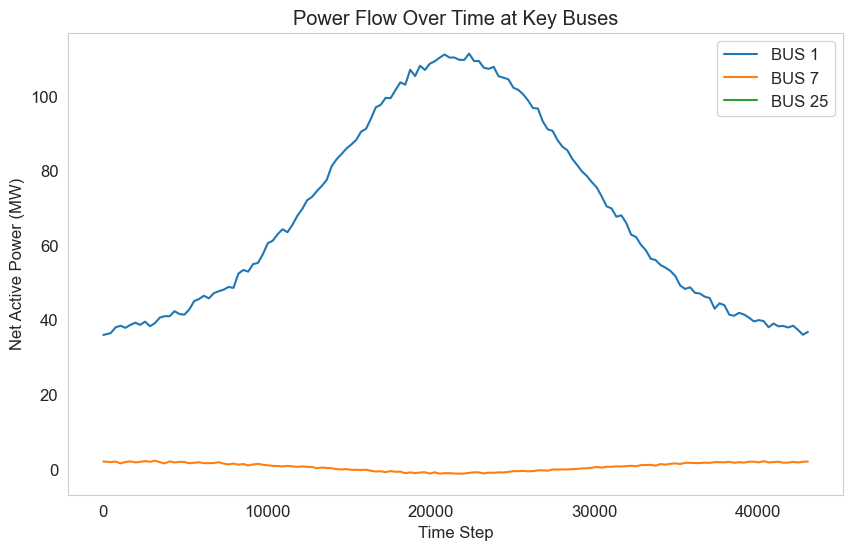

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Convert history dict to a DataFrame for time-series analysis
time_series_data = []

for t, df in no_wec_history.items():
    df["Time"] = t  # Add time column
    df["P_net"] = df["P Gen"].fillna(0) - df["P Load"].fillna(0)
    time_series_data.append(df[["Time", "Bus", "P_net"]])

# Combine all time steps
df_time_series = pd.concat(time_series_data)

# Pivot for heatmap (Time vs Bus)
heatmap_data = df_time_series.pivot(index="Time", columns="Bus", values="P_net")

# Sort buses numerically instead of lexicographically
heatmap_data = heatmap_data[sorted(heatmap_data.columns, key=lambda x: int(x.split()[-1]))]

# # Replot
# plt.figure(figsize=(12, 6))
# sns.heatmap(heatmap_data, cmap="coolwarm", center=0, annot=False)
# plt.xlabel("Bus Number (Sorted)")
# plt.ylabel("Time Step")
# plt.title("Net Active Power (P) Over Time for Each Bus (Sorted)")
# plt.show()

key_buses = ["BUS 1", "BUS 7", "BUS 25"]  # Pick key buses to analyze
df_selected = df_time_series[df_time_series["Bus"].isin(key_buses)]

# Line plot for key buses
plt.figure(figsize=(10, 6))
for bus in key_buses:
    df_bus = df_selected[df_selected["Bus"] == bus]
    plt.plot(df_bus["Time"], df_bus["P_net"], label=f"{bus}")

plt.xlabel("Time Step")
plt.ylabel("Net Active Power (MW)")
plt.title("Power Flow Over Time at Key Buses")
plt.legend()
plt.grid()
plt.show()

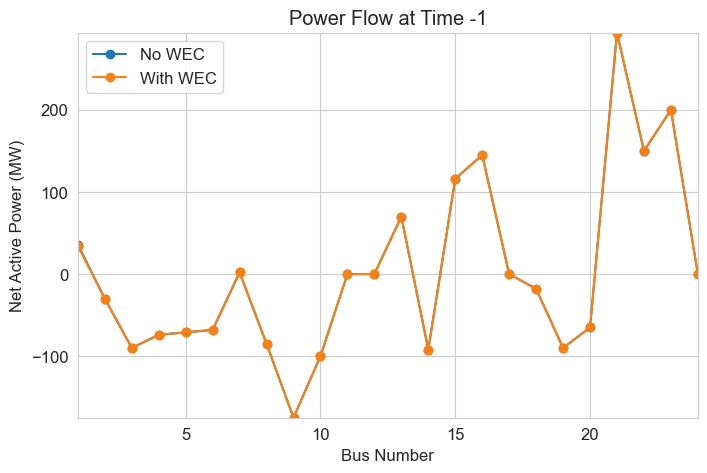

In [37]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd

fig, ax = plt.subplots(figsize=(8, 5))
lines = []

# Initialize plot
for label in ["No WEC", "With WEC"]:
    line, = ax.plot([], [], marker="o", linestyle="-", label=label)
    lines.append(line)

ax.set_xlabel("Bus Number")
ax.set_ylabel("Net Active Power (MW)")
ax.set_title("Power Flow Evolution Over Time")
ax.legend()

# Animation function
def update(frame):
    time_step = list(no_wec_history.keys())[frame]
    
    df_no_wec = no_wec_history[time_step].copy()
    df_wec = wec_history[time_step].copy()

    df_no_wec["P_net"] = df_no_wec.get("P Gen", pd.Series(0)) - df_no_wec.get("P Load", pd.Series(0))
    df_wec["P_net"] = df_wec.get("P Gen", pd.Series(0)) - df_wec.get("P Load", pd.Series(0))

    # Convert bus numbers if necessary
    df_no_wec["Bus"] = df_no_wec["Bus"].str.extract(r'(\d+)').astype(float)
    df_wec["Bus"] = df_wec["Bus"].str.extract(r'(\d+)').astype(float)

    df_no_wec.sort_values("Bus", inplace=True)
    df_wec.sort_values("Bus", inplace=True)

    lines[0].set_data(df_no_wec["Bus"], df_no_wec["P_net"])
    lines[1].set_data(df_wec["Bus"], df_wec["P_net"])

    ax.set_xlim(df_no_wec["Bus"].min(), df_no_wec["Bus"].max())
    ax.set_ylim(min(df_no_wec["P_net"].min(), df_wec["P_net"].min()),
                max(df_no_wec["P_net"].max(), df_wec["P_net"].max()))

    ax.set_title(f"Power Flow at Time {time_step}")
    return lines

# Store animation in a persistent variable
ani = animation.FuncAnimation(fig, update, frames=len(no_wec_history), interval=500, blit=False)

# Keep reference to avoid garbage collection


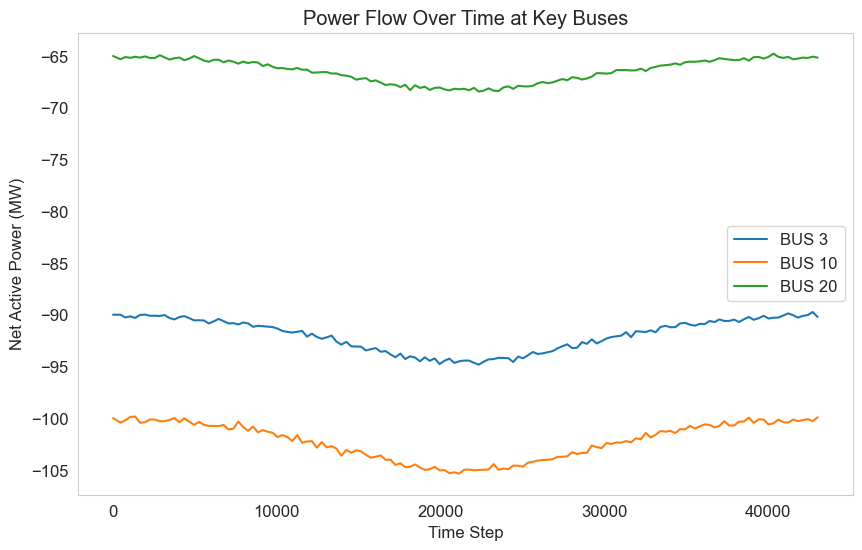

In [31]:
selected_buses = ["BUS 3", "BUS 10", "BUS 20"]  # Pick key buses
df_selected = df_time_series[df_time_series["Bus"].isin(selected_buses)]

# Plot each bus separately
plt.figure(figsize=(10, 6))
for bus in selected_buses:
    df_bus = df_selected[df_selected["Bus"] == bus]
    plt.plot(df_bus["Time"], df_bus["P_net"], label=f"{bus}")

plt.xlabel("Time Step")
plt.ylabel("Net Active Power (MW)")
plt.title("Power Flow Over Time at Key Buses")
plt.legend()
plt.grid()
plt.show()

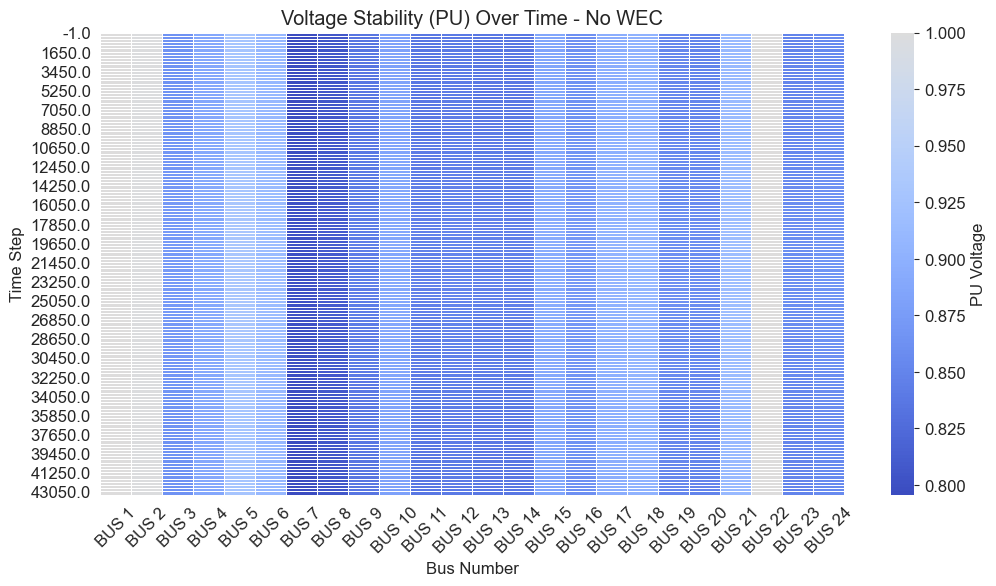

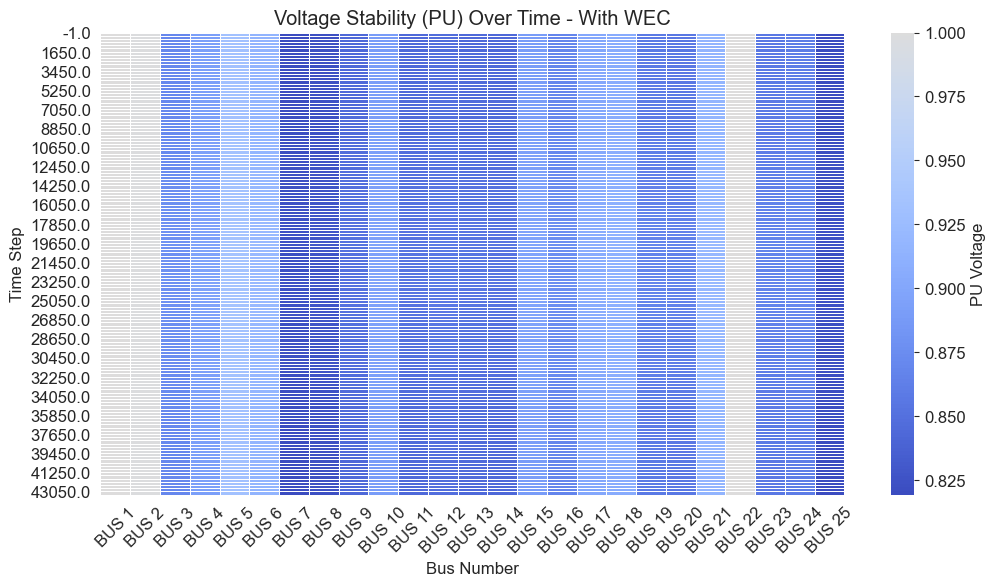

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the time-history dictionary to a DataFrame format
def extract_pu_data(history):
    pu_data = {time: df.set_index("Bus")["PU"] for time, df in history.items()}
    return pd.DataFrame(pu_data).T  # Time as rows, Buses as columns

# Extract PU values for No WEC and With WEC cases
pu_no_wec = extract_pu_data(no_wec_history)
pu_wec = extract_pu_data(wec_history)

# Plot heatmap for No WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(pu_no_wec, cmap="coolwarm", center=1.0, linewidths=0.5, cbar_kws={'label': 'PU Voltage'})
plt.title("Voltage Stability (PU) Over Time - No WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for With WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(pu_wec, cmap="coolwarm", center=1.0, linewidths=0.5, cbar_kws={'label': 'PU Voltage'})
plt.title("Voltage Stability (PU) Over Time - With WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

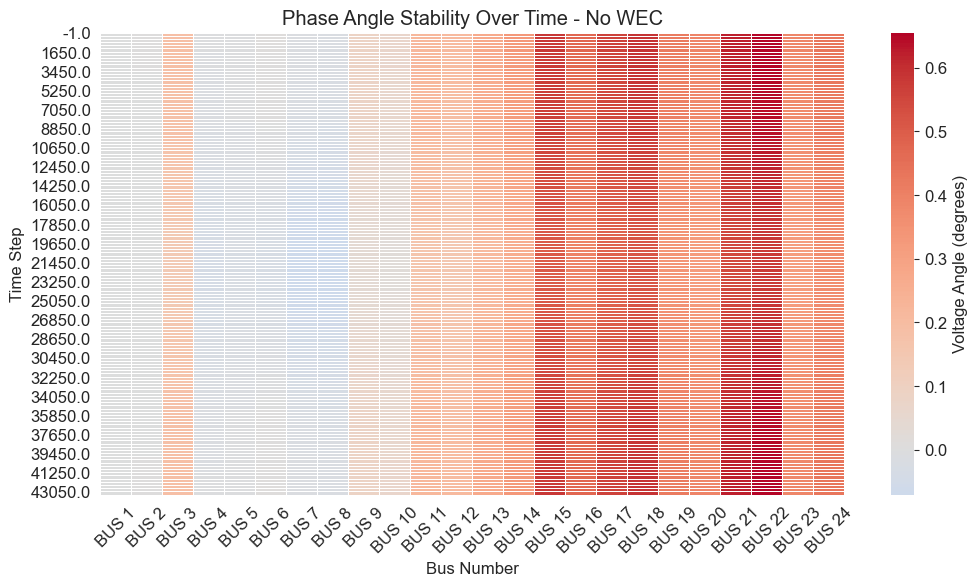

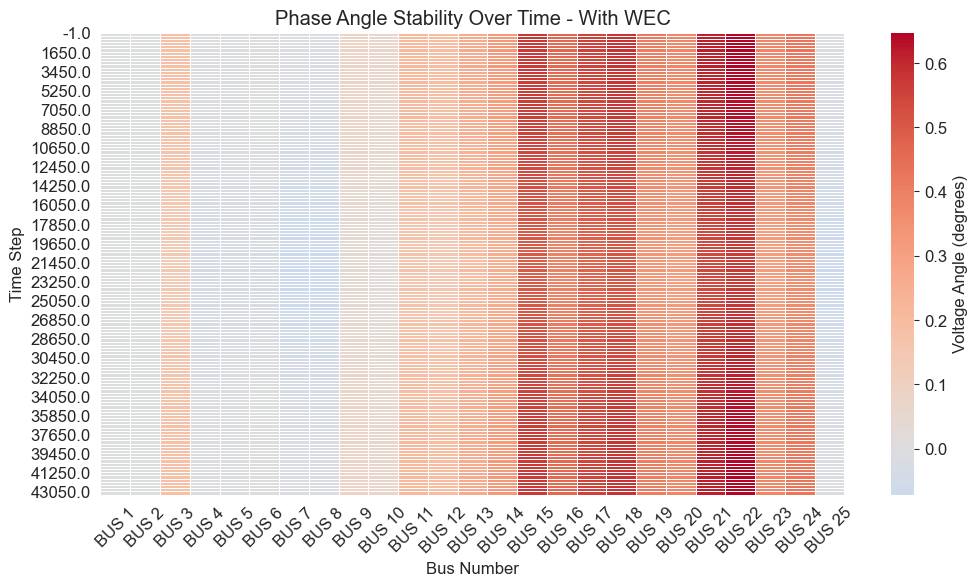

In [39]:
# Extract Voltage Angle (ANGLE) data from history
def extract_angle_data(history):
    angle_data = {time: df.set_index("Bus")["ANGLE"] for time, df in history.items()}
    return pd.DataFrame(angle_data).T  # Time as rows, Buses as columns

# Extract for both cases
angle_no_wec = extract_angle_data(no_wec_history)
angle_wec = extract_angle_data(wec_history)

# Plot heatmap for No WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(angle_no_wec, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Voltage Angle (degrees)'})
plt.title("Phase Angle Stability Over Time - No WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

# Plot heatmap for With WEC case
plt.figure(figsize=(12, 6))
sns.heatmap(angle_wec, cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Voltage Angle (degrees)'})
plt.title("Phase Angle Stability Over Time - With WEC")
plt.xlabel("Bus Number")
plt.ylabel("Time Step")
plt.xticks(rotation=45)
plt.show()

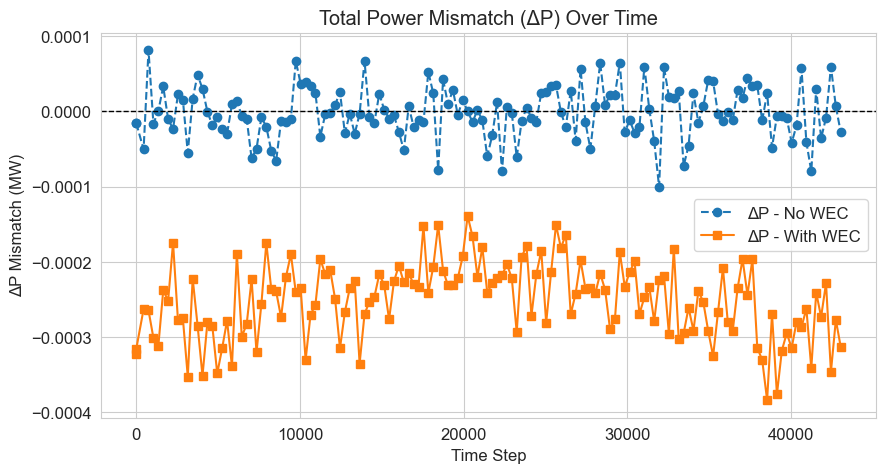

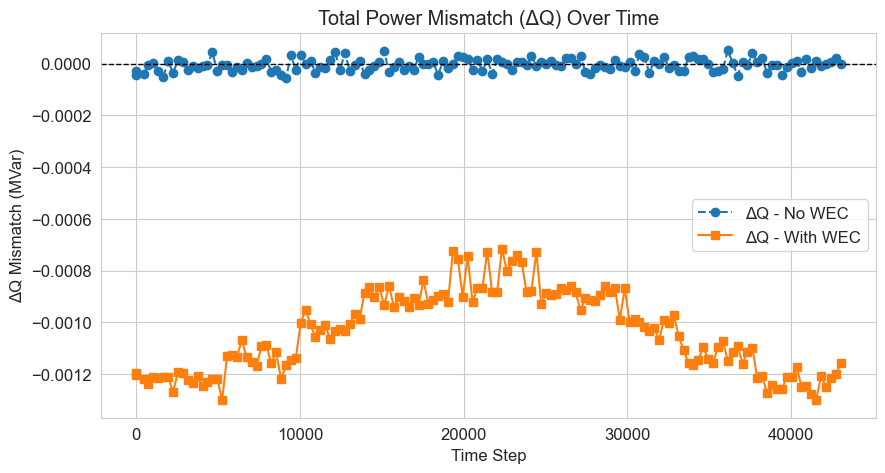

In [40]:
# Extract ΔP and ΔQ mismatch data over time
def extract_mismatch_data(history, column):
    mismatch_data = {time: df.set_index("Bus")[column].sum() for time, df in history.items()}
    return pd.Series(mismatch_data)

# Extract for both cases
dp_no_wec = extract_mismatch_data(no_wec_history, "ΔP")
dq_no_wec = extract_mismatch_data(no_wec_history, "ΔQ")
dp_wec = extract_mismatch_data(wec_history, "ΔP")
dq_wec = extract_mismatch_data(wec_history, "ΔQ")

# Plot ΔP and ΔQ mismatch over time
plt.figure(figsize=(10, 5))
plt.plot(dp_no_wec.index, dp_no_wec.values, label="ΔP - No WEC", linestyle="--", marker="o")
plt.plot(dp_wec.index, dp_wec.values, label="ΔP - With WEC", linestyle="-", marker="s")
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.xlabel("Time Step")
plt.ylabel("ΔP Mismatch (MW)")
plt.title("Total Power Mismatch (ΔP) Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(dq_no_wec.index, dq_no_wec.values, label="ΔQ - No WEC", linestyle="--", marker="o")
plt.plot(dq_wec.index, dq_wec.values, label="ΔQ - With WEC", linestyle="-", marker="s")
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.xlabel("Time Step")
plt.ylabel("ΔQ Mismatch (MVar)")
plt.title("Total Power Mismatch (ΔQ) Over Time")
plt.legend()
plt.show()

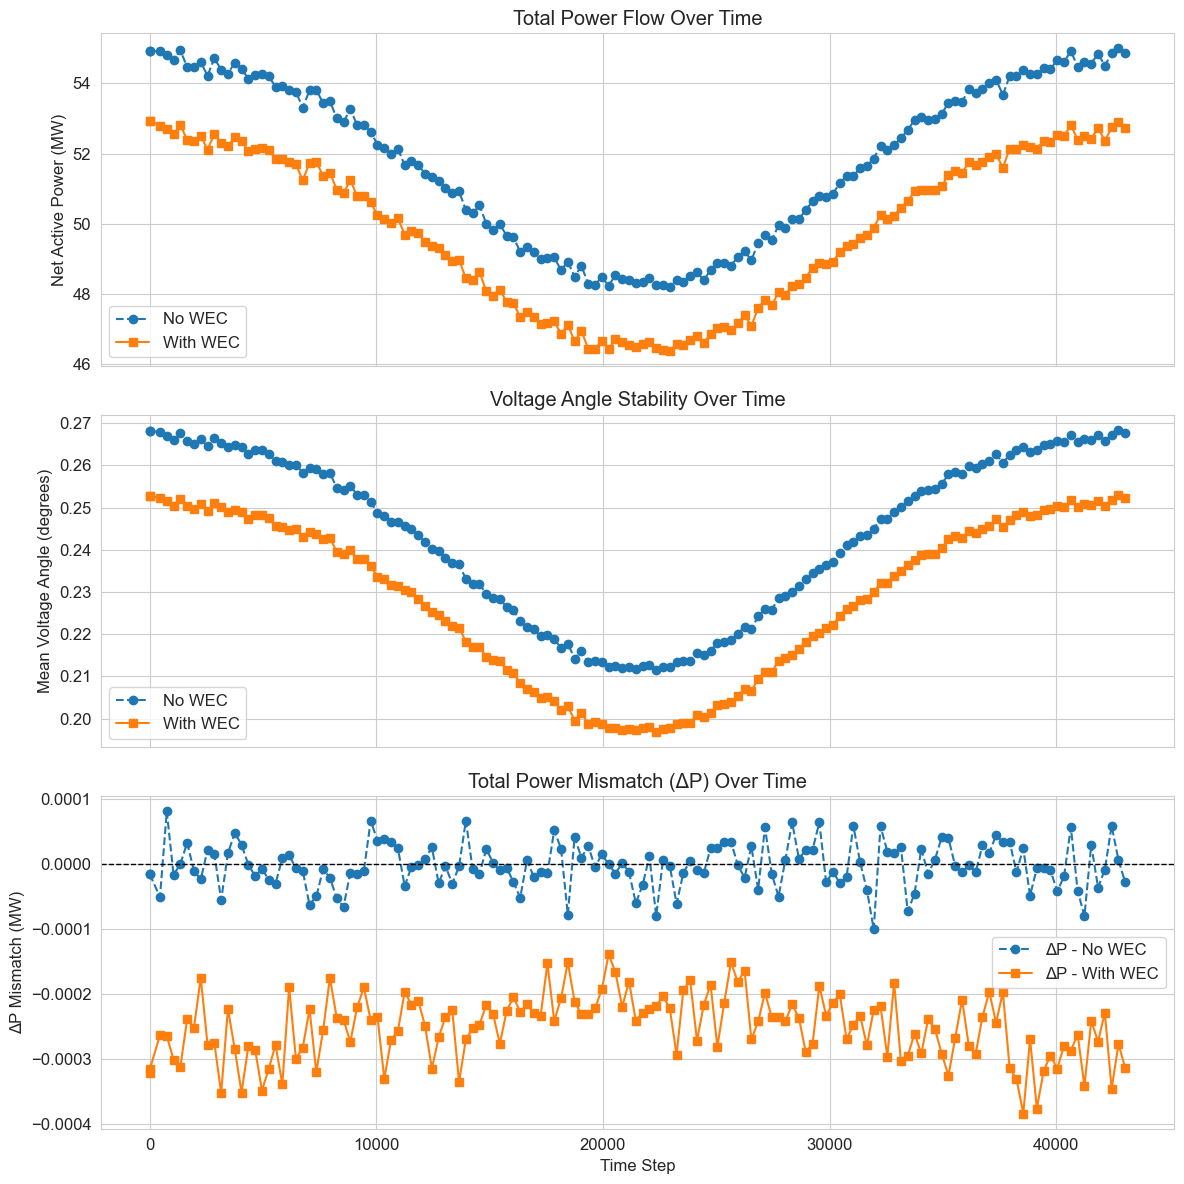

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract P_net for No WEC & WEC
p_net_no_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in no_wec_history.values()]
p_net_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in wec_history.values()]

# Extract Voltage Angle
angle_no_wec = [df["ANGLE"].mean() for df in no_wec_history.values()]
angle_wec = [df["ANGLE"].mean() for df in wec_history.values()]

# Extract Power Mismatch ΔP
dp_no_wec = [df["ΔP"].sum() for df in no_wec_history.values()]
dp_wec = [df["ΔP"].sum() for df in wec_history.values()]

# 📌 1️⃣ Net Active Power Over Time
axes[0].plot(time_steps, [p.sum() for p in p_net_no_wec], label="No WEC", linestyle="--", marker="o")
axes[0].plot(time_steps, [p.sum() for p in p_net_wec], label="With WEC", linestyle="-", marker="s")
axes[0].set_ylabel("Net Active Power (MW)")
axes[0].set_title("Total Power Flow Over Time")
axes[0].legend()
axes[0].grid(True)

# 📌 2️⃣ Voltage Angle Stability Over Time
axes[1].plot(time_steps, angle_no_wec, label="No WEC", linestyle="--", marker="o")
axes[1].plot(time_steps, angle_wec, label="With WEC", linestyle="-", marker="s")
axes[1].set_ylabel("Mean Voltage Angle (degrees)")
axes[1].set_title("Voltage Angle Stability Over Time")
axes[1].legend()
axes[1].grid(True)

# 📌 3️⃣ Power Mismatch ΔP Over Time
axes[2].plot(time_steps, dp_no_wec, label="ΔP - No WEC", linestyle="--", marker="o")
axes[2].plot(time_steps, dp_wec, label="ΔP - With WEC", linestyle="-", marker="s")
axes[2].axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
axes[2].set_ylabel("ΔP Mismatch (MW)")
axes[2].set_title("Total Power Mismatch (ΔP) Over Time")
axes[2].legend()
axes[2].grid(True)

# Set x-axis label for all
axes[-1].set_xlabel("Time Step")

plt.tight_layout()
plt.show()

In [19]:
import matplotlib.pyplot as plt

# Set high DPI for better resolution
plt.rcParams["figure.dpi"] = 300

# Extract time steps
time_steps = list(no_wec_history.keys())

# Extract Data for No WEC & WEC
p_net_no_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in no_wec_history.values()]
p_net_wec = [df["P Gen"].fillna(0) - df["P Load"].fillna(0) for df in wec_history.values()]

angle_no_wec = [df["ANGLE"].mean() for df in no_wec_history.values()]
angle_wec = [df["ANGLE"].mean() for df in wec_history.values()]

dp_no_wec = [df["MISMATCH"].sum() for df in no_wec_history.values()]
dp_wec = [df["MISMATCH"].sum() for df in wec_history.values()]

voltage_mag_no_wec = [df["PU"].mean() for df in no_wec_history.values()]
voltage_mag_wec = [df["PU"].mean() for df in wec_history.values()]

# Common plot settings
plot_kwargs_no_wec = {"linestyle": "--", "marker": "o", "markersize": 4, "linewidth": 1}
plot_kwargs_wec = {"linestyle": "-", "marker": "s", "markersize": 4, "linewidth": 1.2}

# 📌 1️⃣ Net Active Power Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, [p.sum() for p in p_net_no_wec], label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, [p.sum() for p in p_net_wec], label="With WEC", **plot_kwargs_wec)
plt.ylabel("Net Active Power (MW)")
plt.legend()
plt.grid(True)
plt.savefig("net_active_power.png", dpi=300, bbox_inches="tight")
plt.savefig("net_active_power.pdf", bbox_inches="tight")
plt.close()

# 📌 2️⃣ Voltage Angle Stability Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, angle_no_wec, label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, angle_wec, label="With WEC", **plot_kwargs_wec)
plt.ylabel("Mean Voltage Angle (°)")
plt.legend()
plt.grid(True)
plt.savefig("voltage_angle.png", dpi=300, bbox_inches="tight")
plt.savefig("voltage_angle.pdf", bbox_inches="tight")
plt.close()

# 📌 3️⃣ Power Mismatch ΔP Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, dp_no_wec, label="ΔP - No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, dp_wec, label="ΔP - With WEC", **plot_kwargs_wec)
plt.axhline(0, color="black", linestyle="dashed", linewidth=1)  # Reference line at zero
plt.ylabel("Mismatch (MW)")
plt.legend()
plt.grid(True)
plt.savefig("power_mismatch.png", dpi=300, bbox_inches="tight")
plt.savefig("power_mismatch.pdf", bbox_inches="tight")
plt.close()

# 📌 4️⃣ Voltage Magnitude Over Time
plt.figure(figsize=(10, 5))
plt.plot(time_steps, voltage_mag_no_wec, label="No WEC", **plot_kwargs_no_wec)
plt.plot(time_steps, voltage_mag_wec, label="With WEC", **plot_kwargs_wec)
plt.ylabel("Mean Voltage Magnitude (p.u.)")
plt.legend()
plt.grid(True)
plt.savefig("voltage_magnitude.png", dpi=300, bbox_inches="tight")
plt.savefig("voltage_magnitude.pdf", bbox_inches="tight")
plt.close()